# Correlations:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from scipy import linalg
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/data/vaso_lock.xlsx')
df.head()

,Rows,Prickles,Type,Length,OD,ID,WT,DOD,Max_Force
0,1,4,0,14.35,3.17,2.65,0.89,3.5,0.70
1,1,15,0,15.68,5.89,4.90,0.96,5.5,0.70
2,1,3,0,13.11,3.30,2.34,0.74,3.5,0.80
3,1,3,0,15.93,2.87,2.67,0.89,3.5,0.81
4,1,4,0,16.72,4.07,2.75,0.88,3.5,0.99


In [3]:
df = df.drop("Type", axis = 1)
df

,Rows,Prickles,Length,OD,ID,WT,DOD,Max_Force
0,1,4,14.35,3.17,2.65,0.89,3.5,0.70
1,1,15,15.68,5.89,4.90,0.96,5.5,0.70
2,1,3,13.11,3.30,2.34,0.74,3.5,0.80
3,1,3,15.93,2.87,2.67,0.89,3.5,0.81
4,1,4,16.72,4.07,2.75,0.88,3.5,0.99
...,...,...,...,...,...,...,...,...
182,3,4,15.00,4.14,3.00,0.89,4.0,7.21
183,3,4,16.07,4.85,3.64,0.51,4.5,7.70
184,3,4,15.56,5.24,4.58,0.68,6.0,7.94
185,3,4,15.49,3.96,3.06,0.82,4.5,8.38


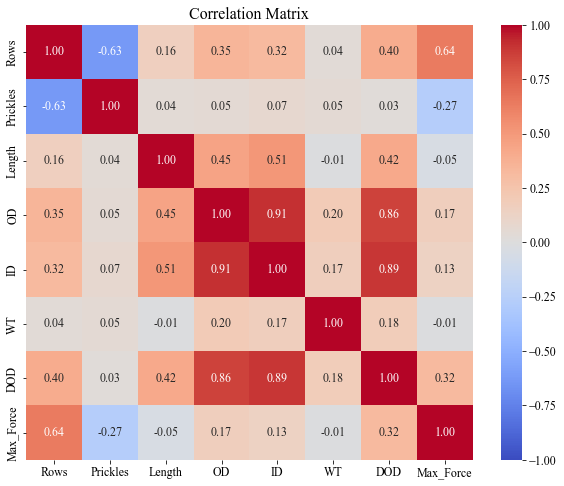

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the correlation matrix 'corrl'
# You can replace this with your actual correlation matrix
corrl = df[["Rows", "Prickles", "Length", "OD", "ID", "WT", "DOD", "Max_Force"]].corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Set the font family directly for both rcParams and text
plt.rcParams['font.family'] = 'times new roman'
font = {'weight': 'normal', 'size': 12}
plt.rc('font', **font)

# Create a heatmap with a background gradient and correlation values in the cells
heatmap = sns.heatmap(corrl, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

# Add labels and title
plt.title("Correlation Matrix", fontsize=16)

# Save the figure as a PNG file
heatmap.get_figure().savefig("correlation_matrix.png", bbox_inches="tight")

# Show the plot (optional)
plt.show()


In [5]:
df.columns

Index(['Rows', 'Prickles', 'Length', 'OD', 'ID', 'WT', 'DOD', 'Max_Force'], dtype='object')

## Feature Importance:

In [6]:
# Split the dataset into train and validation sets.
data_train, data_test = train_test_split(df, test_size = 0.25, random_state = 1234)
data_train.shape, data_test.shape

((140, 8), (47, 8))

Feature 0: Rows - Importance: 0.4034883818192079
Feature 2: Length - Importance: 0.1424876851422127
Feature 3: OD - Importance: 0.1182794281951466
Feature 5: WT - Importance: 0.10998061904855976
Feature 1: Prickles - Importance: 0.08315053422883216
Feature 4: ID - Importance: 0.08311969064475808
Feature 6: DOD - Importance: 0.059493660921282714


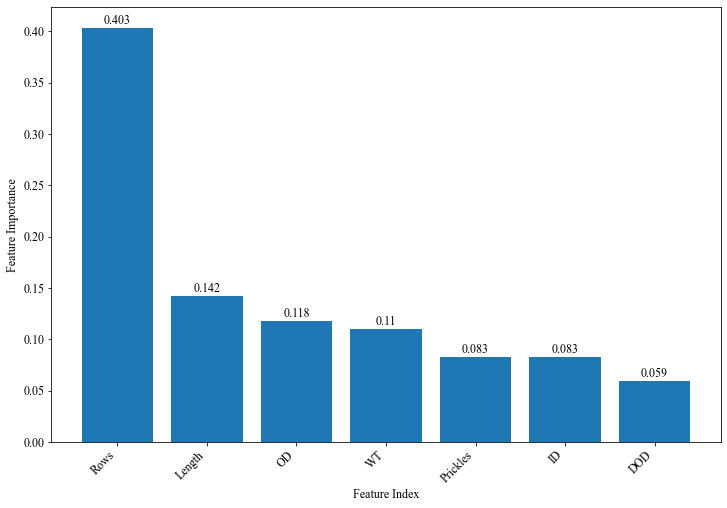

In [7]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming df contains your dataset, and you've already split it into training and testing sets
# data_train, data_test = train_test_split(df, test_size=0.25, random_state=1234)

# Separate features (X) and target variable (y) for both training and testing sets
X_train = data_train.drop('Max_Force', axis=1)
y_train = data_train['Max_Force']

X_test = data_test.drop('Max_Force', axis=1)
y_test = data_test['Max_Force']

# Create a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get the indices of features sorted by importance
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

# Print feature importances
for i in range(len(feature_importances)):
    print(f"Feature {indices[i]}: {X_train.columns[indices[i]]} - Importance: {feature_importances[indices[i]]}")

# Plot feature importances with feature names and values
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')

# Add feature names to x-axis ticks
plt.xticks(range(len(feature_importances)), X_train.columns[indices], rotation=45, ha='right')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 3), ha='center', va='bottom')

plt.show()


# Clustering:

## K-Mean:

In [2]:
import pandas as pd
df05 = pd.read_csv("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/vasso_feature_space.csv")
print(df05)

     Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  \
0     16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07   
1     13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82   
2     14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89   
3     16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88   
4     16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06   
..      ...   ...   ...   ...       ...       ...       ...       ...   
182   18.08  5.85  4.88  0.95      1.15      1.56      1.78      2.12   
183   21.05  6.12  5.67  0.91      0.42      0.85      1.29      1.51   
184   16.55  6.10  4.85  0.85      1.43      1.79      2.04      2.39   
185   17.13  5.75  4.95  0.90      1.32      1.64      1.86      2.26   
186   15.56  5.24  4.58  0.68      1.57      1.80      2.06      2.36   

     Feature5  Feature6  ...  Feature159  Feature160  Feature161  Feature162  \
0        3.46      4.25  ...       10.20   

In [3]:
df05.head()

,Length,OD,ID,WT,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43


In [4]:
df05.dropna(subset = ["ID","OD"], inplace=True)   # Drop NA from Length and ID columns
df05

,Length,OD,ID,WT,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,18.08,5.85,4.88,0.95,1.15,1.56,1.78,2.12,2.43,2.99,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,9.93
183,21.05,6.12,5.67,0.91,0.42,0.85,1.29,1.51,1.64,1.71,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,7.78
184,16.55,6.10,4.85,0.85,1.43,1.79,2.04,2.39,2.53,3.21,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,10.77
185,17.13,5.75,4.95,0.90,1.32,1.64,1.86,2.26,2.42,3.04,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,10.44


In [5]:
df05 = df05.drop(["WT", "Length"], axis=1)
df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43


In [6]:
# Checking for missing values
df05.isna().sum()

OD            0
ID            0
Feature1      0
Feature2      0
Feature3      0
             ..
Feature164    0
Feature165    0
Feature166    0
Feature167    0
Feature168    0
Length: 170, dtype: int64

In [7]:
df05.iloc[:, 2:170]

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,2.44,3.15,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,3.46,4.12,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,3.39,3.92,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,2.35,3.03,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,2.56,2.90,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,1.75,1.99,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,9.93
183,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,0.99,1.39,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,7.78
184,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,1.94,2.35,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,10.77
185,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,1.93,2.16,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,10.44


In [8]:
from sklearn.cluster import KMeans

# Used n_cluster=2 based on elbow plot below that shows the optimal number of the clusters is 2.
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df05.iloc[:, 2:170])     # There are [[]] because there is another columnin the table that we don't need, Type.
y_predicted 

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1,
       2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1,
       0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
df05['cluster']=y_predicted
df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168,cluster
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62,1
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43,2
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77,2
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32,1
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43,1


In [10]:
km.cluster_centers_

array([[ 1.30074074,  1.64851852,  1.93740741,  2.25851852,  2.56037037,
         3.00185185,  1.20259259,  1.56703704,  1.88925926,  2.18592593,
         2.49481481,  2.89444444,  1.57777778,  1.9037037 ,  2.13888889,
         2.31925926,  2.55703704,  2.98148148,  1.84037037,  2.06777778,
         2.2862963 ,  2.42259259,  2.63888889,  3.11333333,  1.96592593,
         2.26703704,  2.50074074,  2.56592593,  2.72777778,  3.31111111,
         2.19666667,  2.54444444,  2.73407407,  2.70925926,  2.84592593,
         3.63296296,  2.44296296,  2.77740741,  2.92925926,  2.94111111,
         3.07185185,  3.81185185,  1.20555556,  1.52037037,  1.95111111,
         2.41962963,  2.97925926,  3.49333333,  1.43333333,  1.72481481,
         2.05777778,  2.52185185,  3.11148148,  3.70851852,  1.82296296,
         2.10259259,  2.35185185,  2.68814815,  3.30666667,  4.01111111,
         2.11814815,  2.42074074,  2.55222222,  2.85148148,  3.51037037,
         4.45703704,  2.42518519,  2.68814815,  2.7

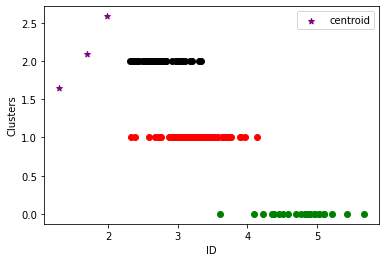

In [11]:
df9 = df05[df05.cluster==0]        # Create a column including all cluster = 0 and name it df9
df10 = df05[df05.cluster==1]
df3 = df05[df05.cluster==2]
plt.scatter(df9["ID"],df9["cluster"],color='green')
plt.scatter(df10["ID"], df10["cluster"],color='red')
plt.scatter(df3["ID"], df3['cluster'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('ID')
plt.ylabel('Clusters')
plt.legend()

## Labeling the clusters:

In [1]:
import pandas as pd
import os 
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager as fm

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df05 = pd.read_csv("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/Phong_Work/vasso_feature_space.csv")
print(df05)

     Length    OD    ID    WT  Feature1  Feature2  Feature3  Feature4  \
0     16.02  4.00  3.24  0.86      1.61      1.83      2.51      3.07   
1     13.44  3.46  2.66  0.82      2.40      2.96      3.42      3.82   
2     14.63  3.86  2.61  0.83      2.13      2.58      3.40      3.89   
3     16.08  4.02  3.38  0.92      1.59      1.79      2.47      2.88   
4     16.03  4.70  3.50  1.00      1.65      1.98      2.39      3.06   
..      ...   ...   ...   ...       ...       ...       ...       ...   
182   18.08  5.85  4.88  0.95      1.15      1.56      1.78      2.12   
183   21.05  6.12  5.67  0.91      0.42      0.85      1.29      1.51   
184   16.55  6.10  4.85  0.85      1.43      1.79      2.04      2.39   
185   17.13  5.75  4.95  0.90      1.32      1.64      1.86      2.26   
186   15.56  5.24  4.58  0.68      1.57      1.80      2.06      2.36   

     Feature5  Feature6  ...  Feature159  Feature160  Feature161  Feature162  \
0        3.46      4.25  ...       10.20   

In [3]:
df05.head()

,Length,OD,ID,WT,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43


In [4]:
df05.dropna(subset = ["ID","OD"], inplace=True)   # Drop NA from Length and ID columns
df05

,Length,OD,ID,WT,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,18.08,5.85,4.88,0.95,1.15,1.56,1.78,2.12,2.43,2.99,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,9.93
183,21.05,6.12,5.67,0.91,0.42,0.85,1.29,1.51,1.64,1.71,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,7.78
184,16.55,6.10,4.85,0.85,1.43,1.79,2.04,2.39,2.53,3.21,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,10.77
185,17.13,5.75,4.95,0.90,1.32,1.64,1.86,2.26,2.42,3.04,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,10.44


In [5]:
df05 = df05.drop(["WT", "Length"], axis=1)
df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,13.62
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,15.43
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,14.77
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,13.32
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,12.43


In [6]:
# Checking for missing values
df05.isna().sum()

OD            0
ID            0
Feature1      0
Feature2      0
Feature3      0
             ..
Feature164    0
Feature165    0
Feature166    0
Feature167    0
Feature168    0
Length: 170, dtype: int64

### 3 clusters:

In [7]:
scaler03 = MinMaxScaler()

scaler03.fit(df05.iloc[:, 0:169])
df05.iloc[:, 0:169] = scaler03.transform(df05.iloc[:, 0:169])

df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0.294271,0.274627,0.572115,0.406639,0.420690,0.422764,0.381551,0.422629,0.624535,0.503448,...,0.650526,0.648765,0.644031,0.641989,0.648107,0.662434,0.655315,0.653602,0.645022,13.62
1,0.153646,0.101493,0.951923,0.875519,0.734483,0.626016,0.651992,0.710483,0.758364,0.817241,...,0.834737,0.838883,0.842278,0.846409,0.837416,0.851852,0.842105,0.833686,0.834416,15.43
2,0.257813,0.086567,0.822115,0.717842,0.727586,0.644986,0.580713,0.653910,0.776952,0.706897,...,0.760000,0.763695,0.768894,0.771271,0.760579,0.766138,0.769866,0.759534,0.760823,14.77
3,0.299479,0.316418,0.562500,0.390041,0.406897,0.371274,0.350105,0.364393,0.624535,0.503448,...,0.618947,0.615467,0.611172,0.605525,0.612472,0.630688,0.623323,0.620763,0.611472,13.32
4,0.476563,0.352239,0.591346,0.468880,0.379310,0.420054,0.373166,0.372712,0.583643,0.493103,...,0.524211,0.517723,0.515882,0.551381,0.476615,0.531217,0.530444,0.516949,0.510823,12.43


In [8]:
df05.iloc[:, 169]

0      13.62
1      15.43
2      14.77
3      13.32
4      12.43
       ...  
182     9.93
183     7.78
184    10.77
185    10.44
186    12.28
Name: Feature168, Length: 187, dtype: float64

In [9]:
km3 = KMeans(n_clusters=3)
y_predicted3 = km3.fit_predict(df05.iloc[:, 2:169])
y_predicted3

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
df05['cluster']=y_predicted3
df05.head()

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168,cluster
0,0.294271,0.274627,0.572115,0.406639,0.420690,0.422764,0.381551,0.422629,0.624535,0.503448,...,0.648765,0.644031,0.641989,0.648107,0.662434,0.655315,0.653602,0.645022,13.62,0
1,0.153646,0.101493,0.951923,0.875519,0.734483,0.626016,0.651992,0.710483,0.758364,0.817241,...,0.838883,0.842278,0.846409,0.837416,0.851852,0.842105,0.833686,0.834416,15.43,2
2,0.257813,0.086567,0.822115,0.717842,0.727586,0.644986,0.580713,0.653910,0.776952,0.706897,...,0.763695,0.768894,0.771271,0.760579,0.766138,0.769866,0.759534,0.760823,14.77,2
3,0.299479,0.316418,0.562500,0.390041,0.406897,0.371274,0.350105,0.364393,0.624535,0.503448,...,0.615467,0.611172,0.605525,0.612472,0.630688,0.623323,0.620763,0.611472,13.32,0
4,0.476563,0.352239,0.591346,0.468880,0.379310,0.420054,0.373166,0.372712,0.583643,0.493103,...,0.517723,0.515882,0.551381,0.476615,0.531217,0.530444,0.516949,0.510823,12.43,0


In [11]:
km3.cluster_centers_

array([[0.61597938, 0.52217992, 0.46665482, 0.44863521, 0.4246904 ,
        0.44010841, 0.63894531, 0.54831141, 0.42308   , 0.38155415,
        0.37627966, 0.42674077, 0.53622717, 0.42119781, 0.37091988,
        0.31559694, 0.3545386 , 0.45731395, 0.38598083, 0.30854436,
        0.2617984 , 0.34096324, 0.44967379, 0.5246154 , 0.30815556,
        0.27344696, 0.25461876, 0.3564433 , 0.53348125, 0.65704883,
        0.34711842, 0.3112569 , 0.31061602, 0.40565628, 0.50624151,
        0.56685937, 0.41113905, 0.39645506, 0.40665027, 0.50907735,
        0.56844525, 0.56079669, 0.53580938, 0.46962728, 0.41839319,
        0.38417588, 0.42972859, 0.48613517, 0.41701541, 0.37164948,
        0.38801173, 0.43482699, 0.51382381, 0.53595611, 0.41990817,
        0.3339753 , 0.40111654, 0.46515124, 0.55462726, 0.6246125 ,
        0.35327428, 0.3189192 , 0.4319126 , 0.57919716, 0.64321327,
        0.66574907, 0.36498127, 0.36777906, 0.43076168, 0.51743699,
        0.64474938, 0.74065117, 0.42103176, 0.44

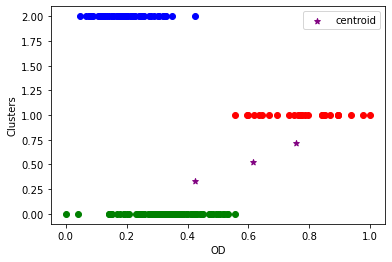

In [12]:
df9 = df05[df05.cluster==0]
df10 = df05[df05.cluster==1]
df11 = df05[df05.cluster==2]
# df3 = df[df.cluster==2]
plt.scatter(df9["OD"],df9["cluster"],color='green')
plt.scatter(df10["OD"], df10["cluster"],color='red')
plt.scatter(df11["OD"], df11["cluster"],color='blue')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('OD')
plt.ylabel('Clusters')
plt.legend()

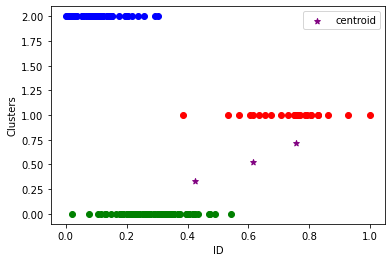

In [13]:
plt.scatter(df9["ID"],df9["cluster"],color='green')
plt.scatter(df10["ID"], df10["cluster"],color='red')
plt.scatter(df11["ID"], df11["cluster"],color='blue')
# plt.scatter(df3.Length,df3['OD'],color='black')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('ID')
plt.ylabel('Clusters')
plt.legend()

In [14]:
df05_cluster_col3 = df05.drop(df05.iloc[:, 0:170], axis=1)
df05_cluster_col3

,cluster
0,0
1,2
2,2
3,0
4,0
...,...
182,1
183,1
184,1
185,1


### Un-normalizing for 3 clusters:

In [15]:
df05

,OD,ID,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168,cluster
0,0.294271,0.274627,0.572115,0.406639,0.420690,0.422764,0.381551,0.422629,0.624535,0.503448,...,0.648765,0.644031,0.641989,0.648107,0.662434,0.655315,0.653602,0.645022,13.62,0
1,0.153646,0.101493,0.951923,0.875519,0.734483,0.626016,0.651992,0.710483,0.758364,0.817241,...,0.838883,0.842278,0.846409,0.837416,0.851852,0.842105,0.833686,0.834416,15.43,2
2,0.257813,0.086567,0.822115,0.717842,0.727586,0.644986,0.580713,0.653910,0.776952,0.706897,...,0.763695,0.768894,0.771271,0.760579,0.766138,0.769866,0.759534,0.760823,14.77,2
3,0.299479,0.316418,0.562500,0.390041,0.406897,0.371274,0.350105,0.364393,0.624535,0.503448,...,0.615467,0.611172,0.605525,0.612472,0.630688,0.623323,0.620763,0.611472,13.32,0
4,0.476563,0.352239,0.591346,0.468880,0.379310,0.420054,0.373166,0.372712,0.583643,0.493103,...,0.517723,0.515882,0.551381,0.476615,0.531217,0.530444,0.516949,0.510823,12.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.776042,0.764179,0.350962,0.294606,0.168966,0.165312,0.165618,0.212978,0.271375,0.272414,...,0.196563,0.239869,0.306077,0.121381,0.162963,0.198142,0.190678,0.211039,9.93,1
183,0.846354,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.78,1
184,0.841146,0.755224,0.485577,0.390041,0.258621,0.238482,0.186583,0.249584,0.368030,0.355172,...,0.321160,0.353779,0.392265,0.151448,0.184127,0.223942,0.230932,0.269481,10.77,1
185,0.750000,0.785075,0.432692,0.327801,0.196552,0.203252,0.163522,0.221298,0.364312,0.362069,...,0.282492,0.324206,0.395580,0.165924,0.223280,0.254902,0.252119,0.269481,10.44,1


****If you want the chuck below to work, you have to comment out all chuncks in "Increasing Number of Clusters" section.

In [16]:
unscaled3 = scaler03.inverse_transform(df05.iloc[:, 0:169])
unscaled3

array([[ 4.  ,  3.24,  1.61, ..., 11.27, 12.11, 12.84],
       [ 3.46,  2.66,  2.4 , ..., 13.08, 13.81, 14.59],
       [ 3.86,  2.61,  2.13, ..., 12.38, 13.11, 13.91],
       ...,
       [ 6.1 ,  4.85,  1.43, ...,  7.09,  8.12,  9.37],
       [ 5.75,  4.95,  1.32, ...,  7.39,  8.32,  9.37],
       [ 5.24,  4.58,  1.57, ...,  9.07, 10.16, 11.13]])

In [17]:
unscaled3.shape

(187, 169)

In [18]:
df05_denormalized = pd. DataFrame(unscaled3) 
df05_denormalized

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,9.39,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.22,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,10.46,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.09,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,8.17,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,4.98,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,3.66,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,5.18,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,5.41,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37


In [19]:
df05_denormalized_clusters3 = pd.concat([df05_denormalized, df05_cluster_col3], axis=1, join='inner')
display(df05_denormalized_clusters3)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,cluster
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,0
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,2
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,2
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,0
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,1
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,1
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,1
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,1


In [20]:
# Specify the name of the excel file
file_name = 'denormalized_and_clusters3.xlsx'
  
# saving the excelsheet
df05_denormalized_clusters3.to_excel(file_name)
print('Table successfully exported into Excel File')

Table successfully exported into Excel File


In [21]:
df12 = df05_denormalized_clusters3
df12

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,cluster
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,0
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,2
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,2
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,0
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,1
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,1
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,1
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,1


In [22]:
df12.rename(columns = {0: 'OD', 1: 'ID'}, inplace = True)
df12

,OD,ID,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,cluster
0,4.00,3.24,1.61,1.83,2.51,3.07,3.46,4.25,1.94,2.06,...,10.20,10.98,11.78,12.63,9.82,10.54,11.27,12.11,12.84,0
1,3.46,2.66,2.40,2.96,3.42,3.82,4.75,5.98,2.30,2.97,...,11.95,12.75,13.59,14.48,11.52,12.33,13.08,13.81,14.59,2
2,3.86,2.61,2.13,2.58,3.40,3.89,4.41,5.64,2.35,2.65,...,11.24,12.05,12.92,13.80,10.83,11.52,12.38,13.11,13.91,2
3,4.02,3.38,1.59,1.79,2.47,2.88,3.31,3.90,1.94,2.06,...,9.90,10.67,11.48,12.30,9.50,10.24,10.96,11.80,12.53,0
4,4.70,3.50,1.65,1.98,2.39,3.06,3.42,3.95,1.83,2.03,...,9.00,9.76,10.61,11.81,8.28,9.30,10.06,10.82,11.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.85,4.88,1.15,1.56,1.78,2.12,2.43,2.99,0.99,1.39,...,5.86,6.77,8.09,9.59,5.09,5.82,6.84,7.74,8.83,1
183,6.12,5.67,0.42,0.85,1.29,1.51,1.64,1.71,0.26,0.60,...,4.02,4.94,5.90,6.82,4.00,4.28,4.92,5.94,6.88,1
184,6.10,4.85,1.43,1.79,2.04,2.39,2.53,3.21,1.25,1.63,...,6.08,7.93,9.13,10.37,5.36,6.02,7.09,8.12,9.37,1
185,5.75,4.95,1.32,1.64,1.86,2.26,2.42,3.04,1.24,1.65,...,6.40,7.57,8.86,10.40,5.49,6.39,7.39,8.32,9.37,1


In [23]:
# # Specify the file path where you want to save the Excel file
# excel_file_path = '/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/annotationed_data_arranged_3clusters_ID.xlsx'

# # Save the DataFrame to an Excel file
# df12.to_excel(excel_file_path, index=False)

# print(f"DataFrame saved to Excel file: {excel_file_path}")

### 3 clusters (0, 1, 2) Labels:

In [24]:
import pandas as pd
import os 
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

#### Cluster 0:

In [25]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/ID/3 clusters/annotationed_data_arranged_All_ID_3clusters_0.xlsx")
print(df)

    Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...   6.19  \
0    13.44  3.46  2.66  0.82  2.40  2.96  3.42  3.82  4.75  5.98  ...  12.08   
1    14.63  3.86  2.61  0.83  2.13  2.58  3.40  3.89  4.41  5.64  ...  11.41   
2    14.05  3.59  2.71  0.79  2.05  2.76  3.32  3.74  4.59  5.83  ...  11.83   
3    15.57  3.69  2.72  0.39  1.76  2.59  3.51  4.82  5.73  7.08  ...  12.53   
4    14.47  3.92  3.01  0.72  1.82  2.45  3.05  3.50  4.44  5.52  ...  11.43   
..     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
58   14.98  3.31  2.35  0.83  2.25  2.83  3.36  3.79  4.61  5.67  ...  11.94   
59   14.52  3.30  2.44  0.85  2.20  3.05  3.38  3.69  4.46  5.66  ...  11.96   
60   14.51  4.50  2.67  0.98  2.29  2.64  2.88  3.95  4.91  6.26  ...  11.44   
61   14.89  3.54  2.79  0.92  1.78  2.33  3.10  3.47  3.84  4.81  ...  11.16   
62   15.18  3.69  2.83  0.91  1.76  2.40  3.10  3.46  3.82  4.72  ...  10.95   

     6.20   6.21   6.22   6.23   6.24  

In [26]:
df

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,12.08,13.06,14.20,15.05,15.84,15.51,14.25,14.48,15.43,0
1,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.41,12.39,13.61,14.54,15.31,14.71,13.51,13.80,14.77,0
2,14.05,3.59,2.71,0.79,2.05,2.76,3.32,3.74,4.59,5.83,...,11.83,12.82,13.95,14.84,15.63,14.83,13.80,14.21,15.19,0
3,15.57,3.69,2.72,0.39,1.76,2.59,3.51,4.82,5.73,7.08,...,12.53,13.50,15.07,15.59,13.99,13.55,13.91,14.86,15.84,0
4,14.47,3.92,3.01,0.72,1.82,2.45,3.05,3.50,4.44,5.52,...,11.43,12.39,13.30,14.04,14.74,14.42,13.45,13.78,14.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,14.98,3.31,2.35,0.83,2.25,2.83,3.36,3.79,4.61,5.67,...,11.94,12.93,14.22,15.21,14.80,13.47,13.48,14.32,15.31,0
59,14.52,3.30,2.44,0.85,2.20,3.05,3.38,3.69,4.46,5.66,...,11.96,12.94,14.16,15.15,15.46,14.05,13.62,14.33,15.32,0
60,14.51,4.50,2.67,0.98,2.29,2.64,2.88,3.95,4.91,6.26,...,11.44,11.42,12.32,13.02,13.73,14.53,14.78,13.60,13.80,0
61,14.89,3.54,2.79,0.92,1.78,2.33,3.10,3.47,3.84,4.81,...,11.16,12.14,13.07,14.06,15.02,13.97,13.01,13.54,14.52,0


<AxesSubplot:>

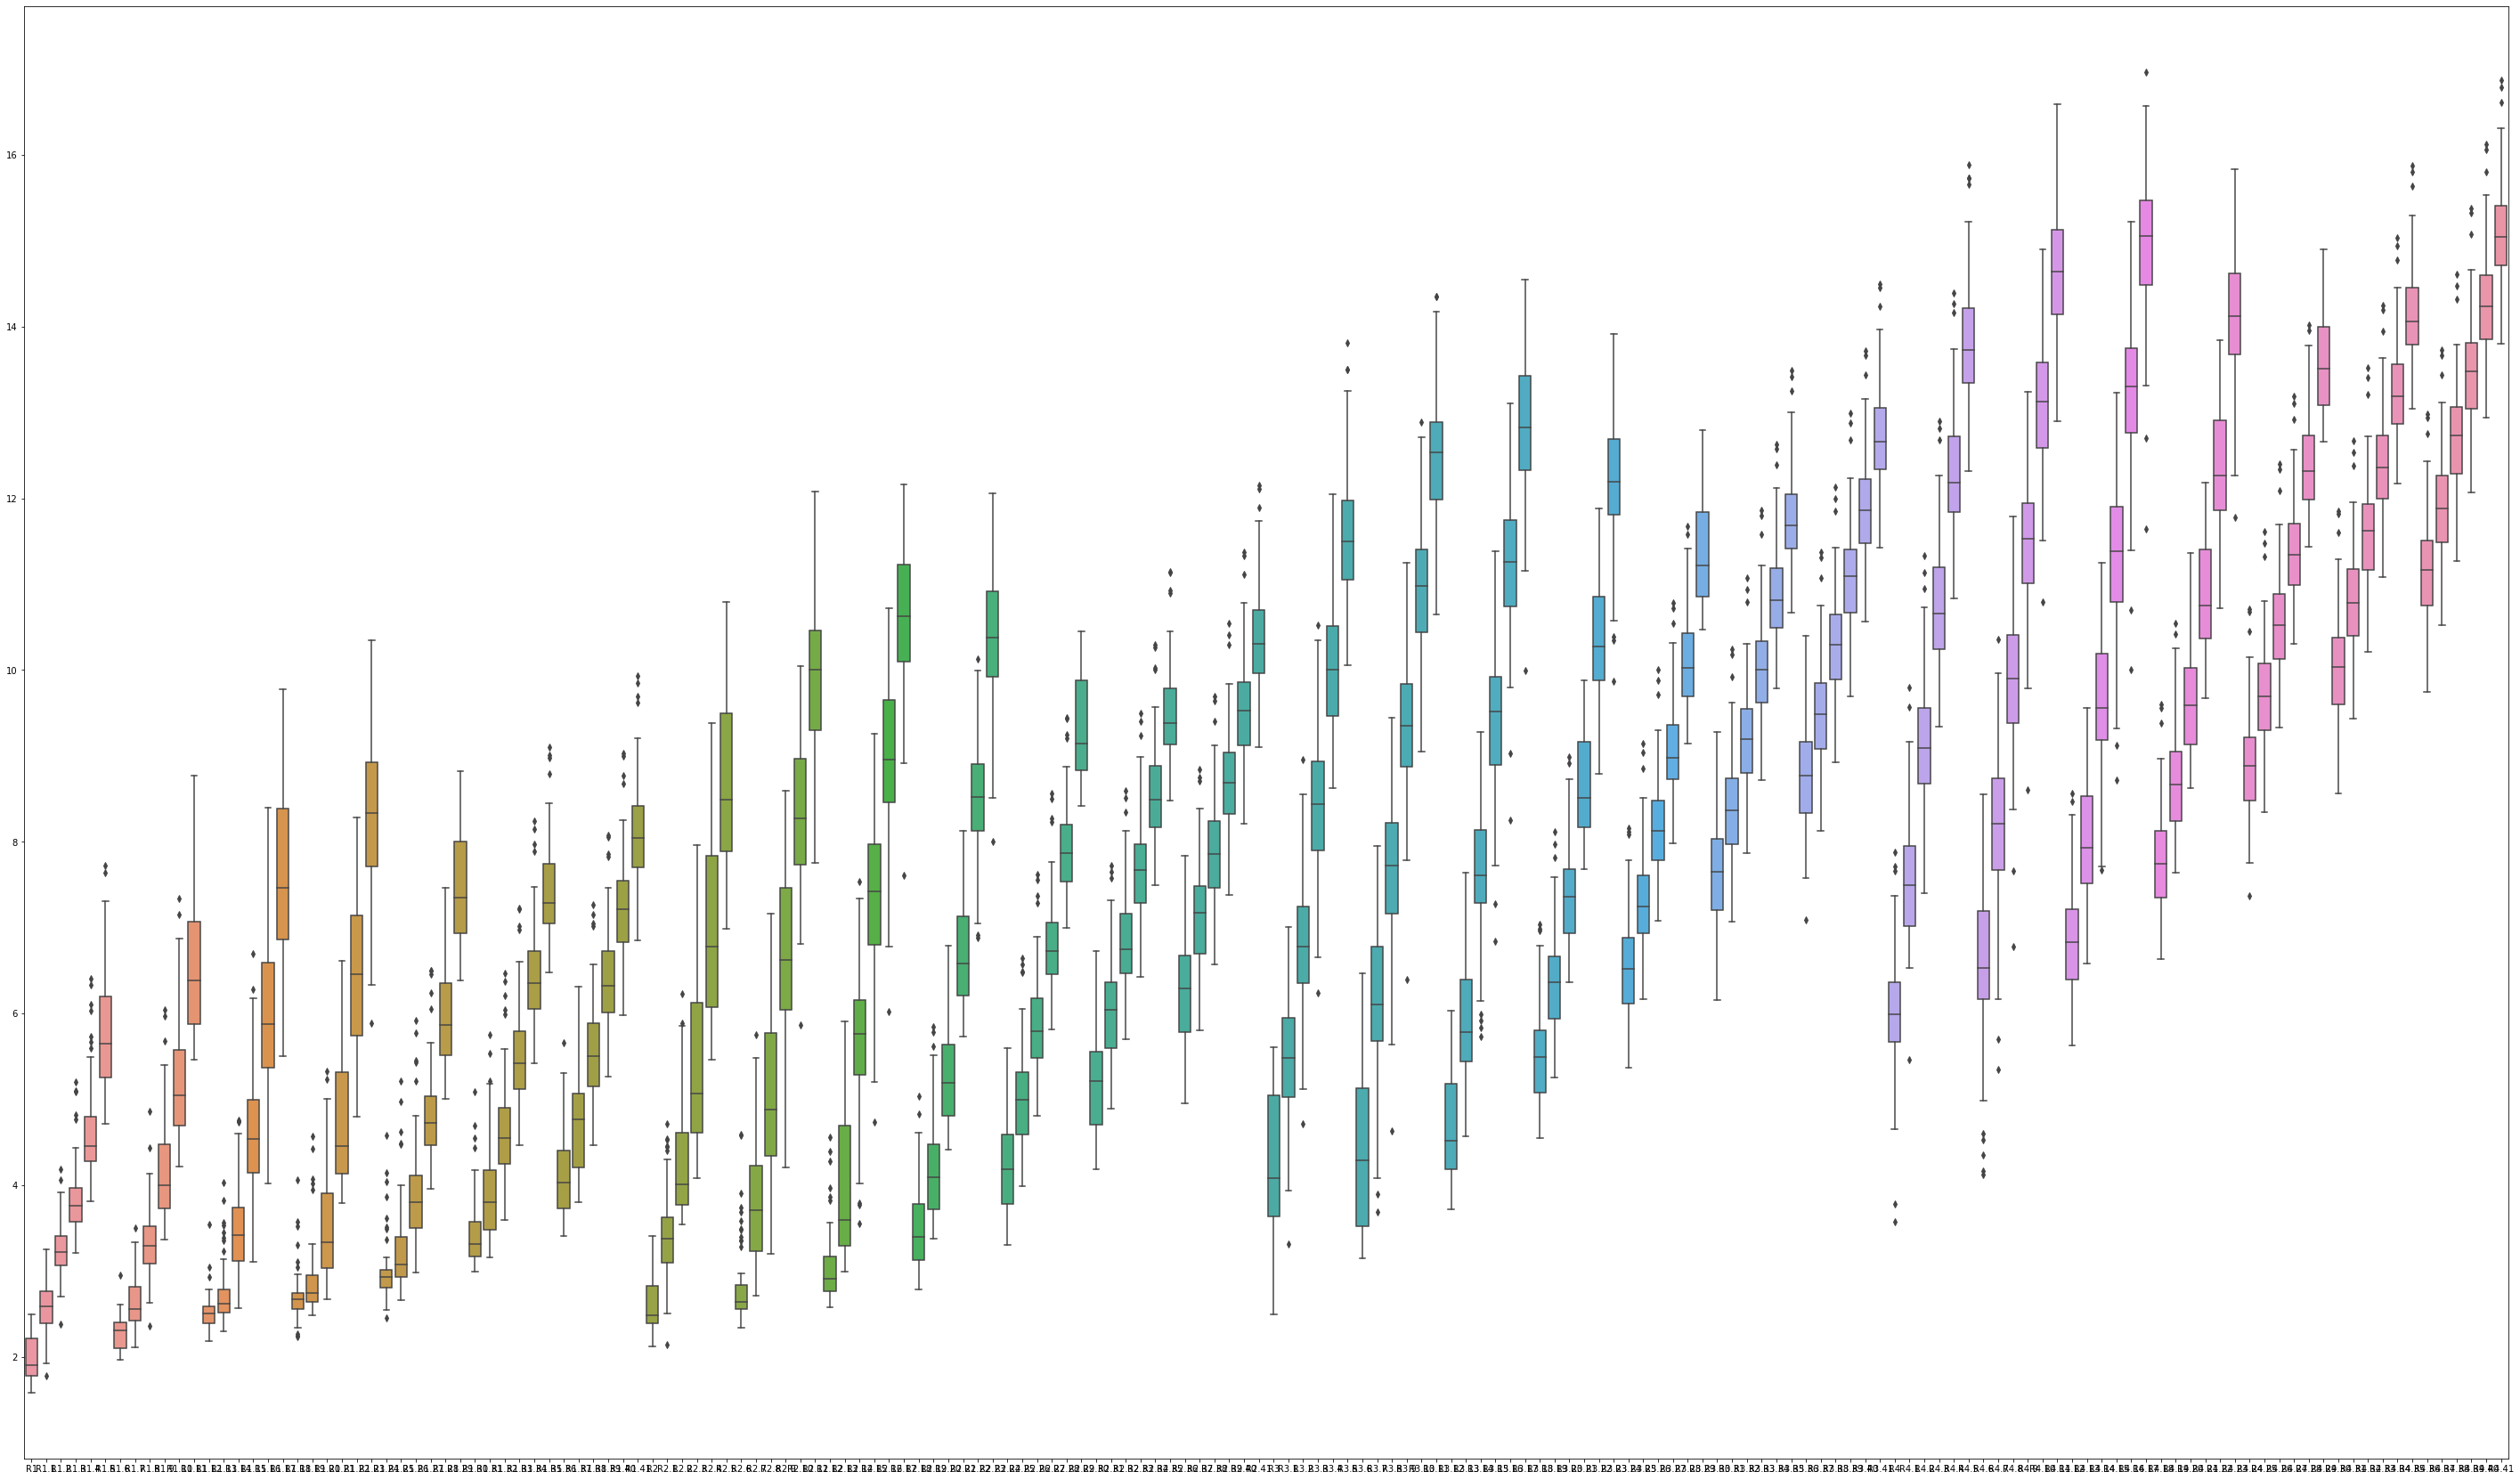

In [27]:
plt.figure(figsize=(50, 30))
sns.boxplot( data=df.iloc[:, 4:172])
# add stripplot
# ax = sns.stripplot(data=df[df, color="orange", jitter=0.2, size=2.5)
# # add title
# plt.title("Boxplot with jitter", loc="left")

##### Annotated features:

In [28]:
import pandas as pd
df1 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/ID/3 clusters/annotationed_data_arranged_All_ID_3clusters_0.xlsx")
print(df1)

    Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...   6.19  \
0    13.44  3.46  2.66  0.82  2.40  2.96  3.42  3.82  4.75  5.98  ...  12.08   
1    14.63  3.86  2.61  0.83  2.13  2.58  3.40  3.89  4.41  5.64  ...  11.41   
2    14.05  3.59  2.71  0.79  2.05  2.76  3.32  3.74  4.59  5.83  ...  11.83   
3    15.57  3.69  2.72  0.39  1.76  2.59  3.51  4.82  5.73  7.08  ...  12.53   
4    14.47  3.92  3.01  0.72  1.82  2.45  3.05  3.50  4.44  5.52  ...  11.43   
..     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
58   14.98  3.31  2.35  0.83  2.25  2.83  3.36  3.79  4.61  5.67  ...  11.94   
59   14.52  3.30  2.44  0.85  2.20  3.05  3.38  3.69  4.46  5.66  ...  11.96   
60   14.51  4.50  2.67  0.98  2.29  2.64  2.88  3.95  4.91  6.26  ...  11.44   
61   14.89  3.54  2.79  0.92  1.78  2.33  3.10  3.47  3.84  4.81  ...  11.16   
62   15.18  3.69  2.83  0.91  1.76  2.40  3.10  3.46  3.82  4.72  ...  10.95   

     6.20   6.21   6.22   6.23   6.24  

In [29]:
df1.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,12.08,13.06,14.20,15.05,15.84,15.51,14.25,14.48,15.43,0
1,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.41,12.39,13.61,14.54,15.31,14.71,13.51,13.80,14.77,0
2,14.05,3.59,2.71,0.79,2.05,2.76,3.32,3.74,4.59,5.83,...,11.83,12.82,13.95,14.84,15.63,14.83,13.80,14.21,15.19,0
3,15.57,3.69,2.72,0.39,1.76,2.59,3.51,4.82,5.73,7.08,...,12.53,13.50,15.07,15.59,13.99,13.55,13.91,14.86,15.84,0
4,14.47,3.92,3.01,0.72,1.82,2.45,3.05,3.50,4.44,5.52,...,11.43,12.39,13.30,14.04,14.74,14.42,13.45,13.78,14.77,0


In [30]:
# split the data into inputs and outputs
R = df1.iloc[:, 4:172].values
P = df1.iloc[:, 172:340].values
DOD = df1.iloc[:, 340:508].values

In [31]:
R1 = df1.iloc[:, 4:46].values
R2 = df1.iloc[:, 46:88].values
R3 = df1.iloc[:, 88:130].values
R4 = df1.iloc[:, 130:172].values

In [32]:
R

array([[ 2.4 ,  2.96,  3.42, ..., 13.81, 14.59, 15.43],
       [ 2.13,  2.58,  3.4 , ..., 13.11, 13.91, 14.77],
       [ 2.05,  2.76,  3.32, ..., 13.58, 14.34, 15.19],
       ...,
       [ 2.29,  2.64,  2.88, ..., 12.07, 12.94, 13.8 ],
       [ 1.78,  2.33,  3.1 , ..., 12.96, 13.69, 14.52],
       [ 1.76,  2.4 ,  3.1 , ..., 12.74, 13.48, 14.31]])

In [33]:
P

array([[ 2.4 ,  2.96,  3.42, ..., 13.81, 14.59, 15.43],
       [ 2.13,  2.58,  3.4 , ..., 13.11, 13.91, 14.77],
       [ 2.05,  2.76,  3.32, ..., 13.58, 14.34, 15.19],
       ...,
       [ 2.29,  2.64,  2.88, ..., 12.07, 12.94, 13.8 ],
       [ 1.78,  2.33,  3.1 , ..., 12.96, 13.69, 14.52],
       [ 1.76,  2.4 ,  3.1 , ..., 12.74, 13.48, 14.31]])

In [34]:
DOD

array([[ 2.4 ,  2.3 ,  2.41, ..., 14.25, 14.48, 15.43],
       [ 2.13,  2.35,  2.59, ..., 13.51, 13.8 , 14.77],
       [ 2.05,  2.31,  2.45, ..., 13.8 , 14.21, 15.19],
       ...,
       [ 2.29,  2.4 ,  2.51, ..., 14.78, 13.6 , 13.8 ],
       [ 1.78,  2.09,  2.41, ..., 13.01, 13.54, 14.52],
       [ 1.76,  2.05,  2.3 , ..., 12.8 , 13.32, 14.31]])

In [35]:
df1['avg_R1'] = df1.iloc[:, 4:46].values.mean(axis=1)
df1['avg_R2'] = df1.iloc[:, 46:88].values.mean(axis=1)
df1['avg_R3'] = df1.iloc[:, 88:130].values.mean(axis=1)
df1['avg_R4'] = df1.iloc[:, 130:172].values.mean(axis=1)

In [36]:
df1['avg_P2'] = df1.iloc[:, 172:196].values.mean(axis=1)
df1['avg_P4'] = df1.iloc[:, 196:220].values.mean(axis=1)
df1['avg_P6'] = df1.iloc[:, 220:244].values.mean(axis=1)
df1['avg_P8'] = df1.iloc[:, 244:268].values.mean(axis=1)
df1['avg_P10'] = df1.iloc[:, 268:292].values.mean(axis=1)
df1['avg_P12'] = df1.iloc[:, 292:316].values.mean(axis=1)
df1['avg_P14'] = df1.iloc[:, 316:340].values.mean(axis=1)

In [37]:
df1['avg_DOD3.5'] = df1.iloc[:, 340:368].values.mean(axis=1)
df1['avg_DOD4'] = df1.iloc[:, 368:396].values.mean(axis=1)
df1['avg_DOD4.5'] = df1.iloc[:, 396:424].values.mean(axis=1)
df1['avg_DOD5'] = df1.iloc[:, 424:452].values.mean(axis=1)
df1['avg_DOD5.5'] = df1.iloc[:, 452:480].values.mean(axis=1)
df1['avg_DOD6'] = df1.iloc[:, 480:508].values.mean(axis=1)


In [38]:
df1

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
1,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
2,14.05,3.59,2.71,0.79,2.05,2.76,3.32,3.74,4.59,5.83,...,7.845000,7.842917,8.616250,9.635417,5.379286,6.246429,7.292143,8.488929,9.797857,11.185000
3,15.57,3.69,2.72,0.39,1.76,2.59,3.51,4.82,5.73,7.08,...,7.887083,8.546250,9.373333,10.310833,5.668929,6.631429,7.703929,8.844286,10.065000,11.363214
4,14.47,3.92,3.01,0.72,1.82,2.45,3.05,3.50,4.44,5.52,...,7.367500,7.446667,8.166667,9.148750,4.833571,5.719286,6.767500,7.920357,9.199643,10.564286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,14.98,3.31,2.35,0.83,2.25,2.83,3.36,3.79,4.61,5.67,...,7.359167,7.843750,8.747500,9.777500,5.300000,6.140000,7.162143,8.335357,9.640357,11.046071
59,14.52,3.30,2.44,0.85,2.20,3.05,3.38,3.69,4.46,5.66,...,7.597500,7.868333,8.757083,9.788333,5.445000,6.283571,7.306071,8.472500,9.790357,11.200714
60,14.51,4.50,2.67,0.98,2.29,2.64,2.88,3.95,4.91,6.26,...,7.479583,7.635000,7.614583,8.265833,4.663214,5.486429,6.442143,7.682857,8.926429,10.336071
61,14.89,3.54,2.79,0.92,1.78,2.33,3.10,3.47,3.84,4.81,...,7.161250,7.221667,8.001667,9.021250,4.948929,5.658571,6.642143,7.746071,9.007143,10.403929


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


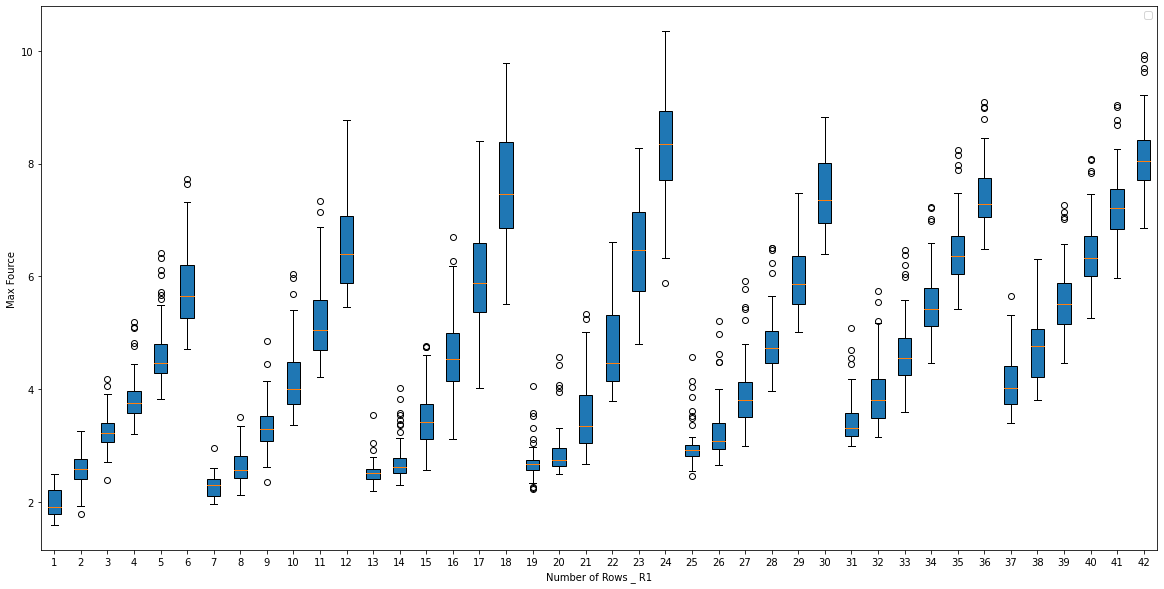

In [39]:
plt.figure(figsize=(20, 10))

plt.boxplot(R1,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows _ R1')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


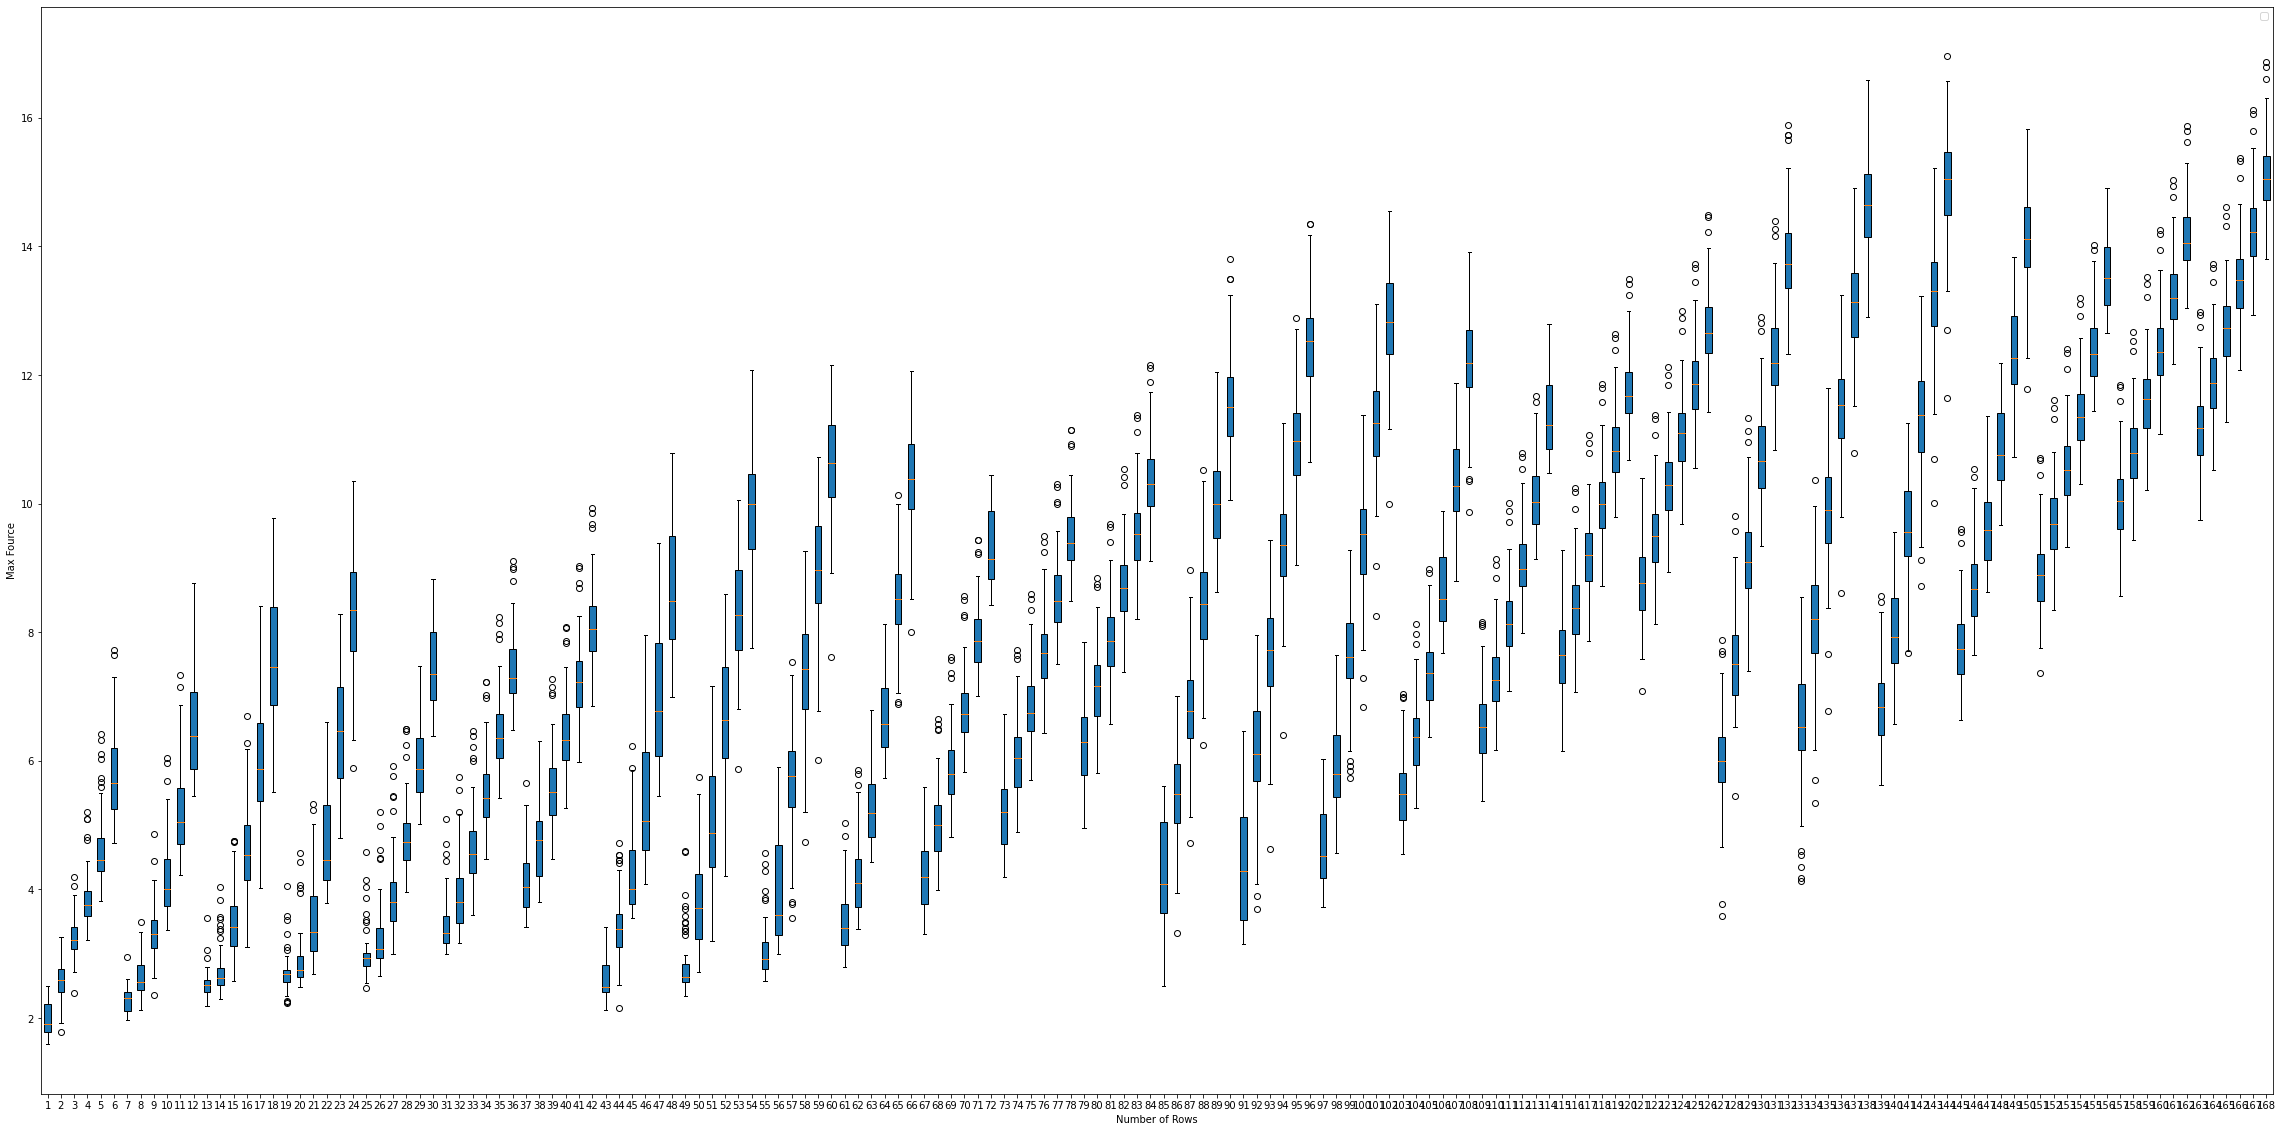

In [40]:
plt.figure(figsize=(40, 20))

plt.boxplot(R,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


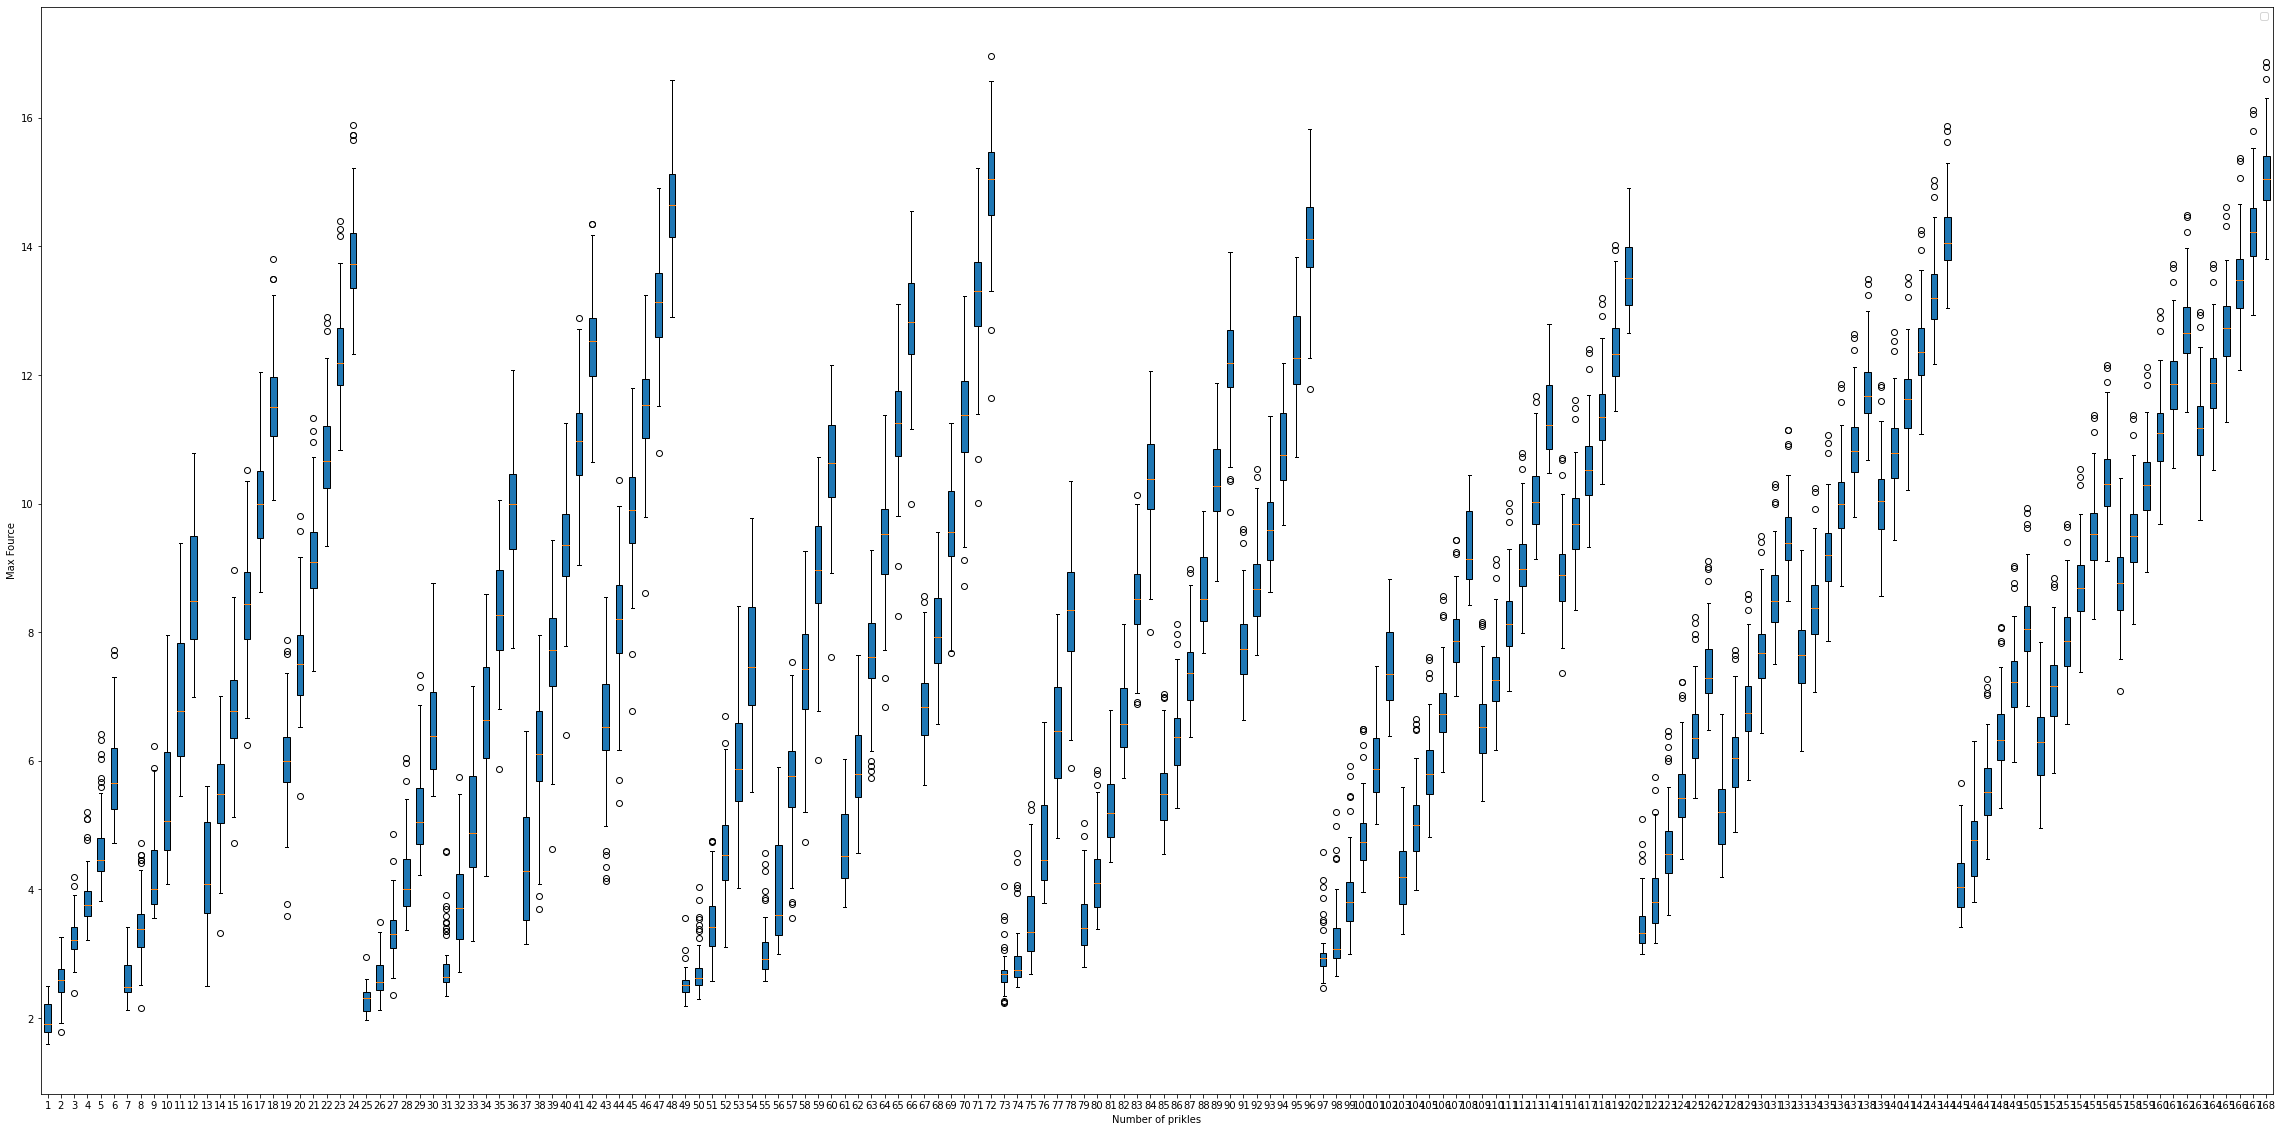

In [41]:
plt.figure(figsize=(40, 20))

plt.boxplot(P,vert=True,patch_artist=True);   
plt.xlabel('Number of prikles')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


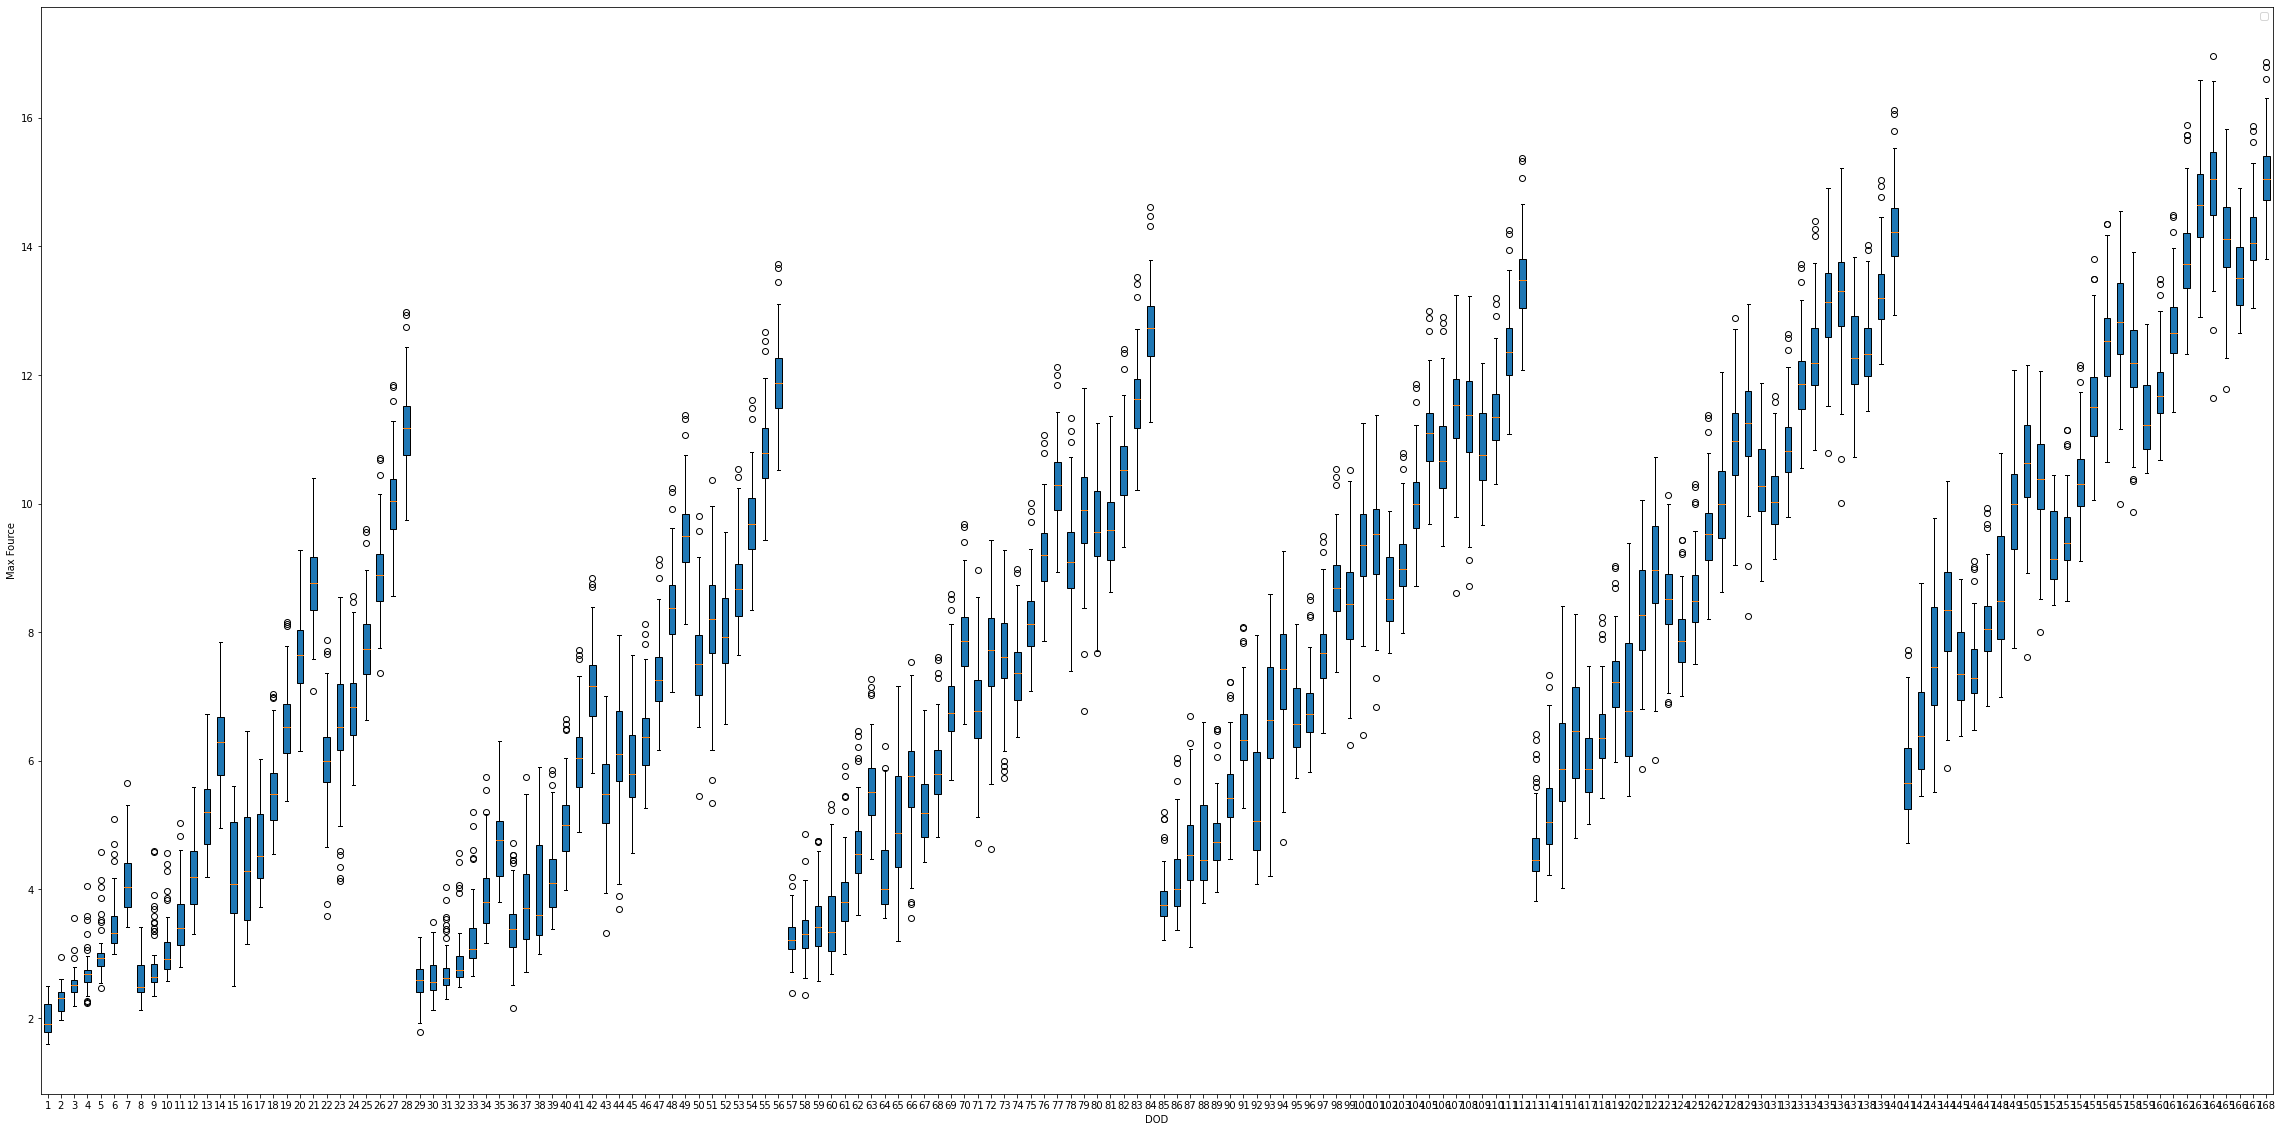

In [42]:
plt.figure(figsize=(40, 20))

plt.boxplot(DOD,vert=True,patch_artist=True);   
plt.xlabel('DOD')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

In [43]:
df1_avg = df1.drop(df1.iloc[:, 4:508], axis=1)
df1_avg.head()

,Length,OD,ID,WT,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,13.44,3.46,2.66,0.82,0,5.037619,7.247143,9.504048,11.788810,7.198333,...,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
1,14.63,3.86,2.61,0.83,0,4.629048,6.626667,8.842619,11.071429,6.699583,...,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
2,14.05,3.59,2.71,0.79,0,4.745714,6.873333,9.183571,11.457143,6.878333,...,7.845000,7.842917,8.616250,9.635417,5.379286,6.246429,7.292143,8.488929,9.797857,11.185000
3,15.57,3.69,2.72,0.39,0,5.540952,7.108095,9.322381,11.546429,7.198750,...,7.887083,8.546250,9.373333,10.310833,5.668929,6.631429,7.703929,8.844286,10.065000,11.363214
4,14.47,3.92,3.01,0.72,0,4.319762,6.205714,8.558333,10.919286,6.244167,...,7.367500,7.446667,8.166667,9.148750,4.833571,5.719286,6.767500,7.920357,9.199643,10.564286


In [44]:
df1_just_avg = df1.drop(df1.iloc[:, 3:508], axis=1)
df1_just_avg = df1_just_avg.drop(df1.iloc[:, 0:1], axis=1)

df1_just_avg.head()

,OD,ID,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,avg_P4,avg_P6,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,3.46,2.66,0,5.037619,7.247143,9.504048,11.788810,7.198333,7.926250,8.426250,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
1,3.86,2.61,0,4.629048,6.626667,8.842619,11.071429,6.699583,7.412500,7.843750,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
2,3.59,2.71,0,4.745714,6.873333,9.183571,11.457143,6.878333,7.626250,8.010417,7.845000,7.842917,8.616250,9.635417,5.379286,6.246429,7.292143,8.488929,9.797857,11.185000
3,3.69,2.72,0,5.540952,7.108095,9.322381,11.546429,7.198750,7.701667,7.638333,7.887083,8.546250,9.373333,10.310833,5.668929,6.631429,7.703929,8.844286,10.065000,11.363214
4,3.92,3.01,0,4.319762,6.205714,8.558333,10.919286,6.244167,6.830417,7.301250,7.367500,7.446667,8.166667,9.148750,4.833571,5.719286,6.767500,7.920357,9.199643,10.564286


In [45]:
df1_just_avg.iloc[:, 3:7].values

array([[ 5.03761905,  7.24714286,  9.50404762, 11.78880952],
       [ 4.62904762,  6.62666667,  8.84261905, 11.07142857],
       [ 4.74571429,  6.87333333,  9.18357143, 11.45714286],
       [ 5.54095238,  7.10809524,  9.32238095, 11.54642857],
       [ 4.3197619 ,  6.20571429,  8.55833333, 10.91928571],
       [ 4.23404762,  6.05071429,  8.18309524, 10.43761905],
       [ 4.46238095,  6.42190476,  8.80547619, 11.01571429],
       [ 4.57071429,  6.33761905,  8.66166667, 10.87642857],
       [ 4.32833333,  6.29261905,  8.57333333, 10.78166667],
       [ 4.29214286,  5.905     ,  8.18404762, 10.53190476],
       [ 4.57785714,  6.55857143,  8.91666667, 11.08833333],
       [ 5.68738095,  7.99380952, 10.22785714, 12.50357143],
       [ 4.6097619 ,  6.4697619 ,  8.75142857, 11.09142857],
       [ 5.86595238,  7.40428571,  9.48214286, 11.59809524],
       [ 4.24452381,  6.02809524,  8.3297619 , 10.68071429],
       [ 4.54238095,  6.54833333,  8.9452381 , 11.19714286],
       [ 4.72928571,  6.

In [46]:
df1_just_avg.iloc[:, 7:14].values

array([[ 7.19833333,  7.92625   ,  8.42625   ,  8.30291667,  8.15833333,
         8.86333333,  9.88541667],
       [ 6.69958333,  7.4125    ,  7.84375   ,  7.66166667,  7.54      ,
         8.20333333,  9.18625   ],
       [ 6.87833333,  7.62625   ,  8.01041667,  7.845     ,  7.84291667,
         8.61625   ,  9.63541667],
       [ 7.19875   ,  7.70166667,  7.63833333,  7.88708333,  8.54625   ,
         9.37333333, 10.31083333],
       [ 6.24416667,  6.83041667,  7.30125   ,  7.3675    ,  7.44666667,
         8.16666667,  9.14875   ],
       [ 6.12      ,  6.67791667,  7.21166667,  7.345     ,  7.12041667,
         7.58916667,  8.52041667],
       [ 6.41583333,  7.17875   ,  7.37041667,  7.14416667,  7.6025    ,
         8.4975    ,  9.52541667],
       [ 6.3475    ,  6.81791667,  6.78541667,  7.07125   ,  7.80208333,
         8.72166667,  9.73541667],
       [ 6.30333333,  7.08916667,  7.48416667,  7.27416667,  7.26875   ,
         8.02083333,  9.0175    ],
       [ 5.78666667,  6.4820

In [47]:
df1_just_avg.iloc[:, 14:20].values

array([[ 5.67785714,  6.58964286,  7.6175    ,  8.83      , 10.13392857,
        11.5175    ],
       [ 5.115     ,  5.96535714,  6.99464286,  8.20642857,  9.5325    ,
        10.94071429],
       [ 5.37928571,  6.24642857,  7.29214286,  8.48892857,  9.79785714,
        11.185     ],
       [ 5.66892857,  6.63142857,  7.70392857,  8.84428571, 10.065     ,
        11.36321429],
       [ 4.83357143,  5.71928571,  6.7675    ,  7.92035714,  9.19964286,
        10.56428571],
       [ 4.6675    ,  5.47071429,  6.435     ,  7.59857143,  8.89428571,
        10.29214286],
       [ 5.10821429,  5.93857143,  6.93428571,  8.0725    ,  9.32678571,
        10.67785714],
       [ 5.16607143,  5.89107143,  6.86642857,  7.98107143,  9.22464286,
        10.54035714],
       [ 4.95      ,  5.70928571,  6.72571429,  7.85785714,  9.16357143,
        10.5575    ],
       [ 4.78321429,  5.5775    ,  6.53214286,  7.61428571,  8.79642857,
        10.06607143],
       [ 5.24928571,  6.05571429,  7.02321429,  8.

In [48]:
df1_just_avg["avg_R"] = df1_just_avg.iloc[:, 3:7].values.mean(axis=1)
df1_just_avg["avg_P"] = df1_just_avg.iloc[:, 7:14].values.mean(axis=1)
df1_just_avg["avg_DOD"] = df1_just_avg.iloc[:, 14:20].values.mean(axis=1)

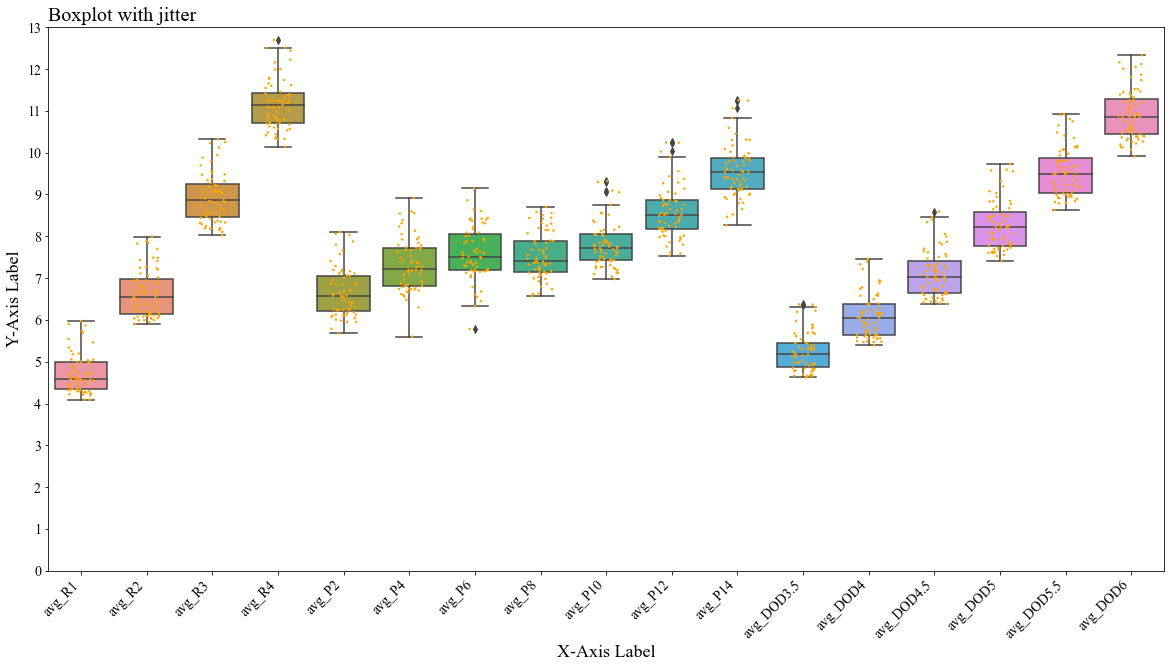

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set font properties
font_path = fm.findfont(fm.FontProperties(family='Times New Roman'))
font_properties = fm.FontProperties(fname=font_path, size=16)

plt.figure(figsize=(20, 10))

# Create a boxplot
sns.boxplot(data=df1_just_avg.iloc[:, 3:20])

# Add stripplot
ax = sns.stripplot(data=df1_just_avg.iloc[:, 3:20], color="orange", jitter=0.2, size=2.5)

# Set y-axis limits
ax.set_ylim(0, 13)

# Set y-axis ticks and labels
ax.set_yticks(range(14))
ax.set_yticklabels(range(14), fontproperties=font_properties, size=14)

# Set title with Times New Roman font and larger size
plt.title("Boxplot with jitter", loc="left", fontproperties=font_properties, size=20)

# Set x and y-axis labels with Times New Roman font and larger size
plt.xlabel("X-Axis Label", fontproperties=font_properties, size=18)
plt.ylabel("Y-Axis Label", fontproperties=font_properties, size=18)

# Set tick labels on x-axis with 45-degree rotation
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_properties, size=14, rotation=45, ha='right')

# Show the plot
plt.show()


Text(0.0, 1.0, 'Boxplot with jitter')

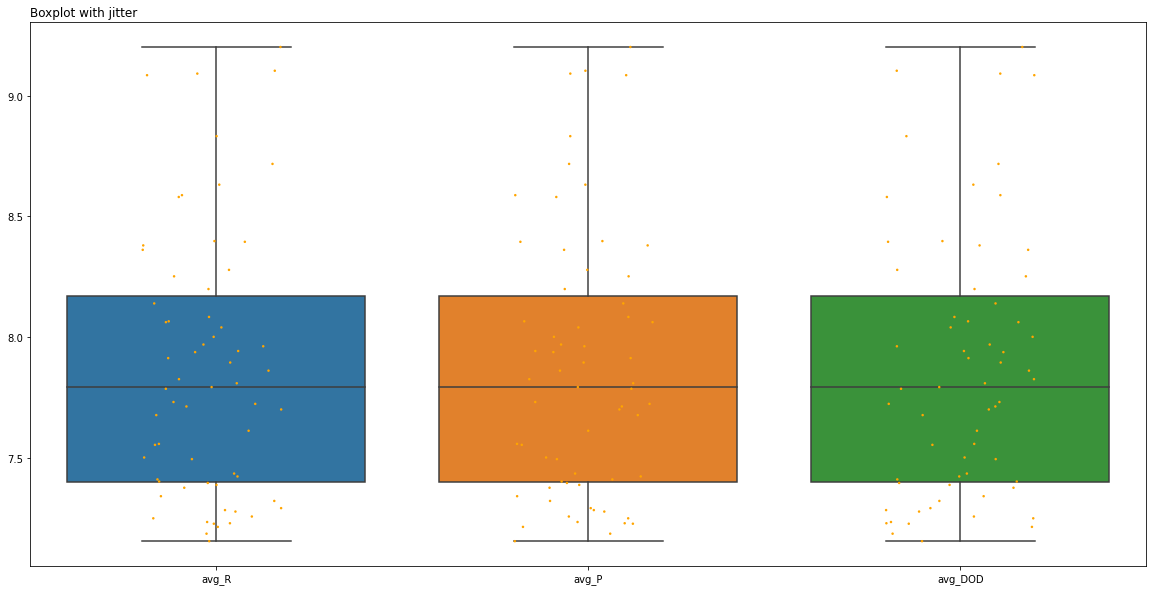

In [66]:
plt.figure(figsize=(20, 10))
sns.boxplot( data=df1_just_avg.iloc[:, 20:])
# add stripplot
ax = sns.stripplot(data=df1_just_avg.iloc[:, 20:], color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")

#### Cluster 1:

In [67]:
import pandas as pd
df3_1 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/ID/3 clusters/annotationed_data_arranged_All_ID_3clusters_1.xlsx")
print(df3_1)

    Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...  6.19  \
0    14.81  5.35  4.10  1.00  1.76  2.08  2.40  2.66  3.18  3.44  ...  9.57   
1    16.88  6.30  5.02  0.82  1.33  1.75  1.97  2.35  2.50  3.16  ...  7.27   
2    17.60  5.54  4.84  0.95  1.26  1.56  1.78  2.16  2.39  2.96  ...  7.59   
3    17.09  6.31  5.43  0.76  1.20  1.63  1.87  2.15  2.42  2.97  ...  6.90   
4    15.17  5.31  4.45  0.78  1.67  1.89  2.26  2.46  3.04  3.16  ...  9.84   
5    15.68  5.89  4.90  0.96  1.61  1.86  2.09  2.40  2.88  3.18  ...  7.71   
6    16.79  6.71  5.10  0.79  1.29  1.70  2.03  2.39  2.53  2.70  ...  6.73   
7    20.45  6.14  4.97  0.99  0.67  1.10  1.53  1.74  2.12  2.31  ...  5.10   
8    16.38  5.01  4.51  0.72  1.44  1.68  1.88  2.23  2.78  3.20  ...  8.95   
9    16.60  6.10  5.02  0.86  1.39  1.77  2.02  2.36  2.49  3.15  ...  7.45   
10   12.16  5.93  4.38  1.11  2.14  2.49  2.62  3.73  3.88  4.04  ...  7.34   
11   18.58  5.84  4.77  0.77  1.05  1.48  1.71  1.94

In [68]:
df3_1

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,14.81,5.35,4.10,1.00,1.76,2.08,2.40,2.66,3.18,3.44,...,9.57,9.88,7.97,8.61,9.45,10.31,11.15,12.01,11.94,1
1,16.88,6.30,5.02,0.82,1.33,1.75,1.97,2.35,2.50,3.16,...,7.27,8.13,5.58,6.28,7.05,7.91,8.86,9.86,10.41,1
2,17.60,5.54,4.84,0.95,1.26,1.56,1.78,2.16,2.39,2.96,...,7.59,7.98,6.29,7.05,7.84,8.79,9.74,10.02,10.52,1
3,17.09,6.31,5.43,0.76,1.20,1.63,1.87,2.15,2.42,2.97,...,6.90,7.72,5.32,5.97,6.70,7.54,8.52,9.54,10.04,1
4,15.17,5.31,4.45,0.78,1.67,1.89,2.26,2.46,3.04,3.16,...,9.84,9.83,8.00,8.74,9.65,10.53,11.42,12.08,12.13,1
5,15.68,5.89,4.90,0.96,1.61,1.86,2.09,2.40,2.88,3.18,...,7.71,8.61,5.99,6.55,7.42,8.32,9.22,10.10,11.00,1
6,16.79,6.71,5.10,0.79,1.29,1.70,2.03,2.39,2.53,2.70,...,6.73,7.69,5.19,5.82,6.53,7.34,8.29,9.27,10.26,1
7,20.45,6.14,4.97,0.99,0.67,1.10,1.53,1.74,2.12,2.31,...,5.10,5.97,5.14,5.82,6.60,7.32,8.08,7.76,8.59,1
8,16.38,5.01,4.51,0.72,1.44,1.68,1.88,2.23,2.78,3.20,...,8.95,9.79,8.55,9.30,10.06,10.90,11.33,11.39,12.23,1
9,16.60,6.10,5.02,0.86,1.39,1.77,2.02,2.36,2.49,3.15,...,7.45,8.26,5.69,6.44,7.25,8.17,9.12,10.09,10.57,1


<AxesSubplot:>

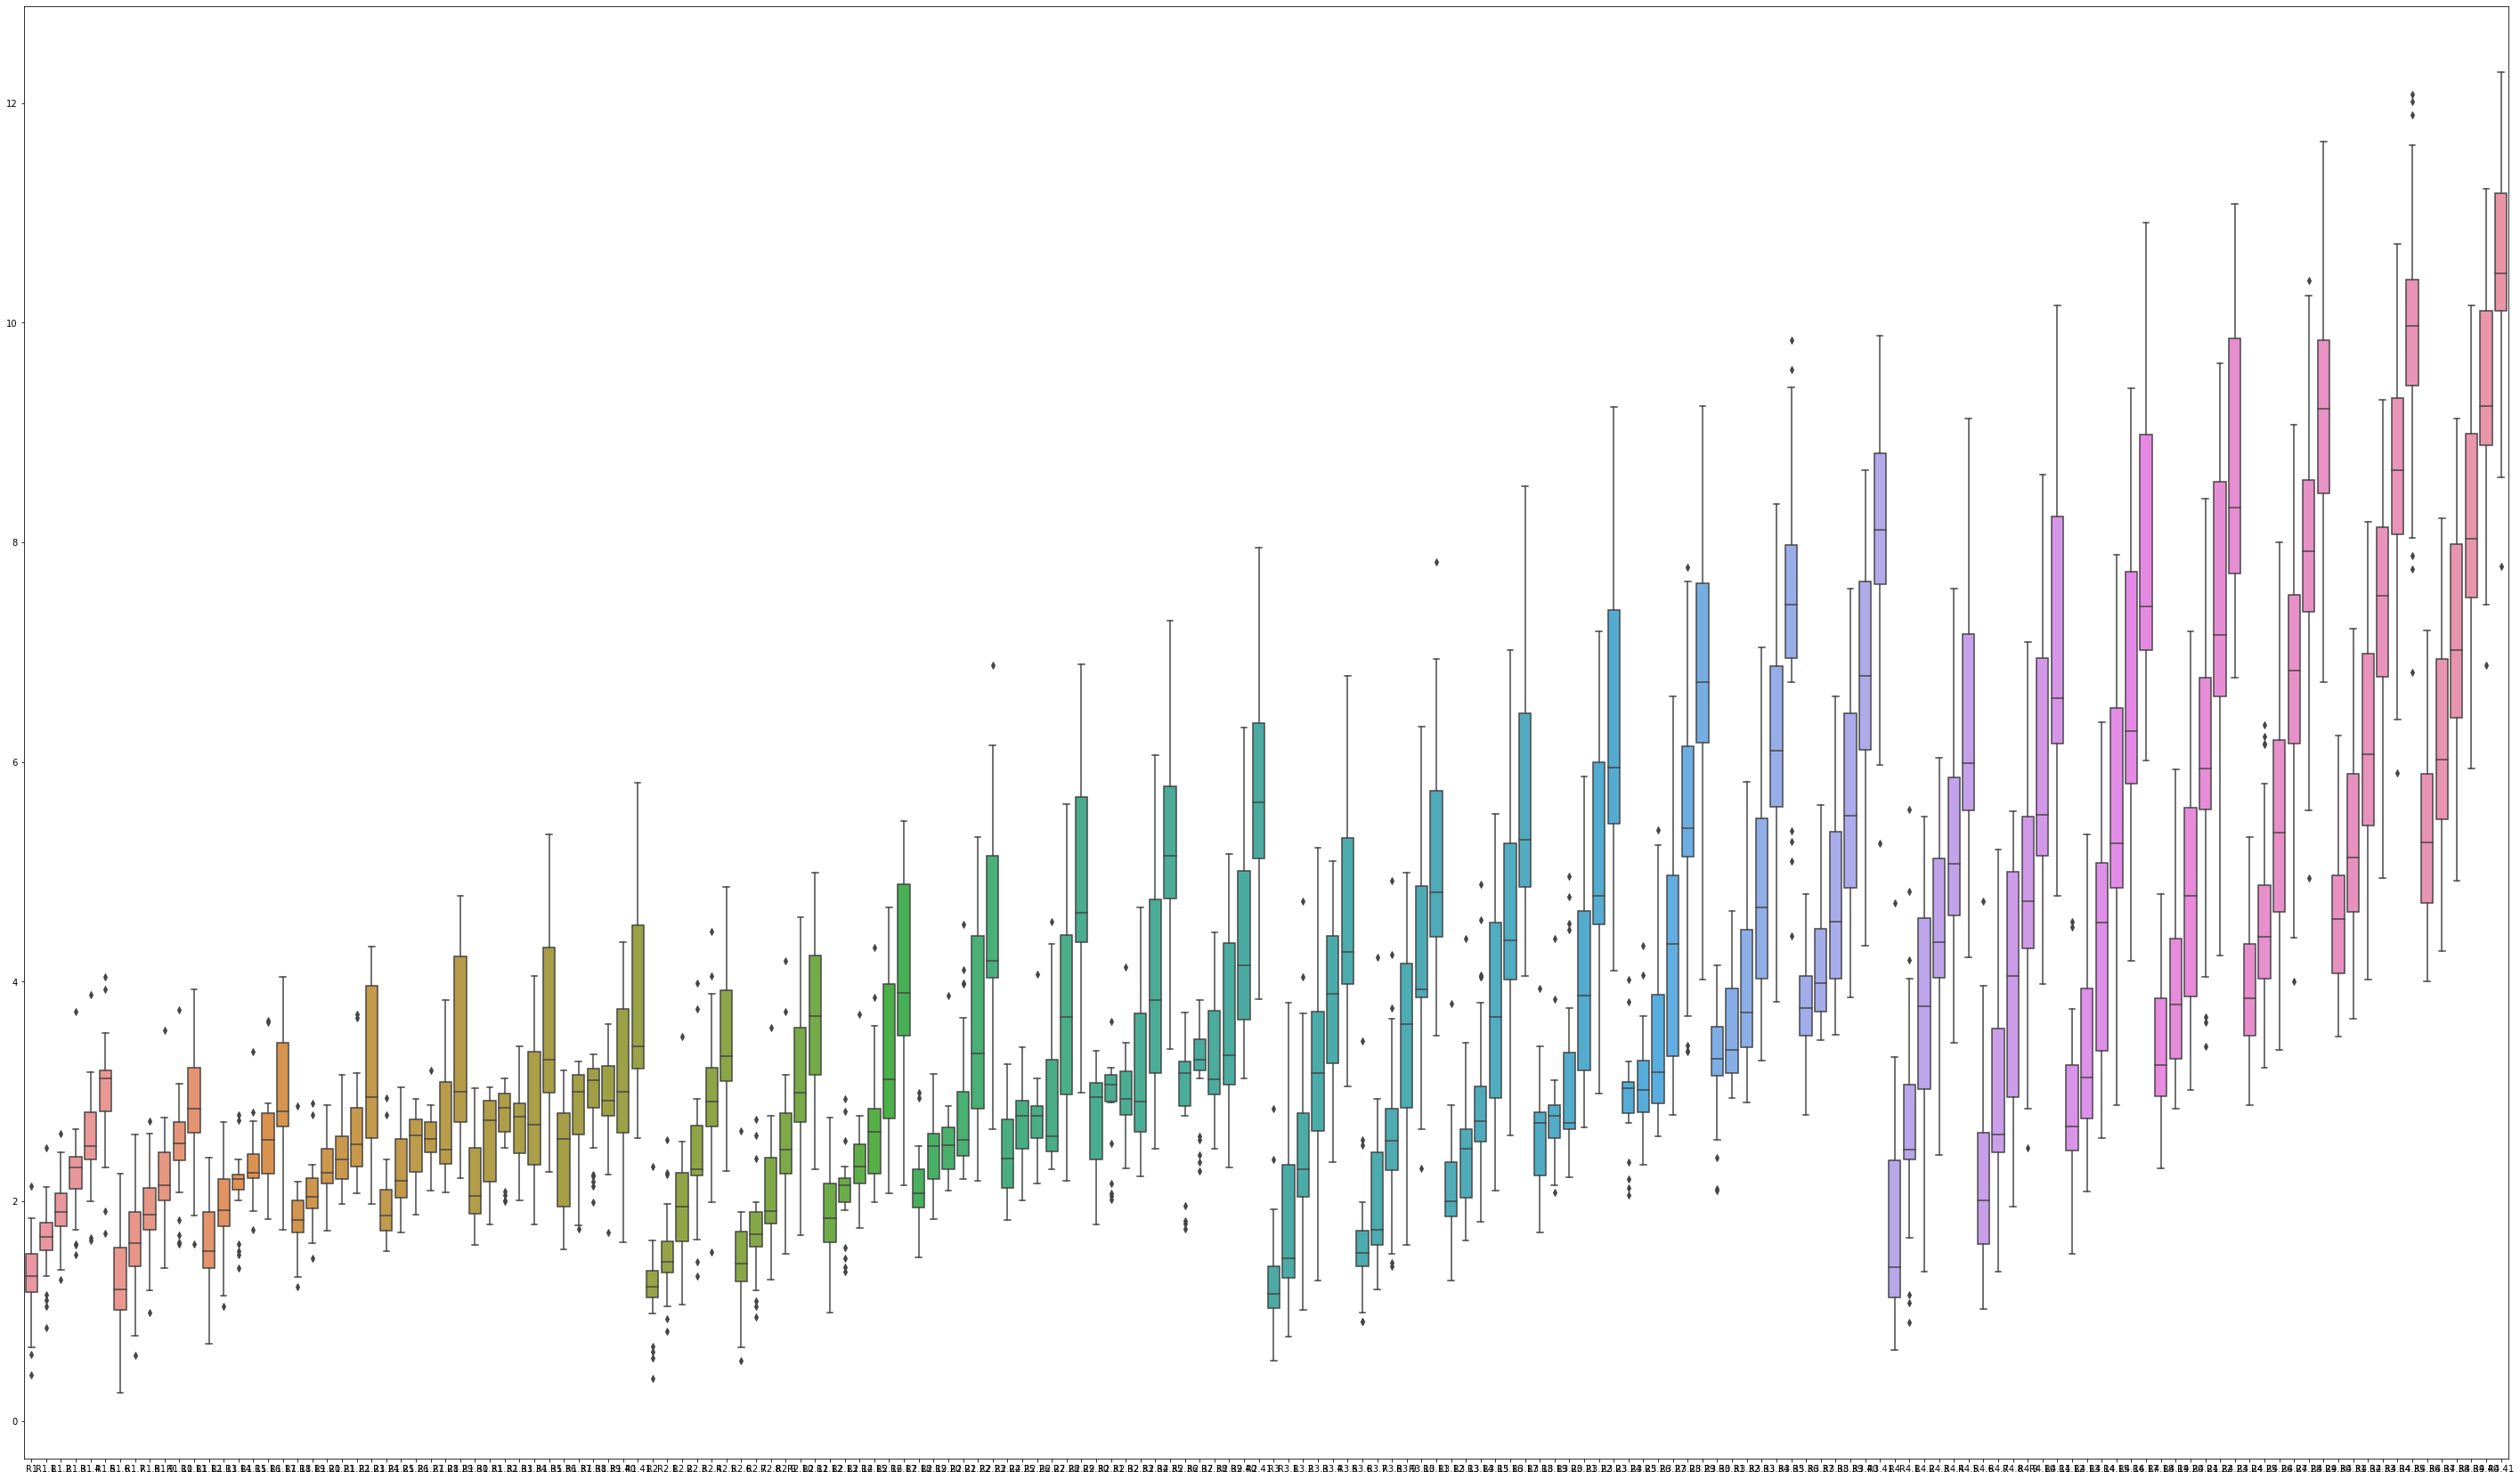

In [69]:
plt.figure(figsize=(50, 30))
sns.boxplot( data=df3_1.iloc[:, 4:172])
# add stripplot
# ax = sns.stripplot(data=df[df, color="orange", jitter=0.2, size=2.5)
# # add title
# plt.title("Boxplot with jitter", loc="left")

##### Annotated features:

In [70]:
# split the data into inputs and outputs
R = df3_1.iloc[:, 4:172].values
P = df3_1.iloc[:, 172:340].values
DOD = df3_1.iloc[:, 340:508].values

In [71]:
R1 = df3_1.iloc[:, 4:46].values
R2 = df3_1.iloc[:, 46:88].values
R3 = df3_1.iloc[:, 88:130].values
R4 = df3_1.iloc[:, 130:172].values

In [72]:
R

array([[ 1.76,  2.08,  2.4 , ...,  9.68, 10.73, 11.94],
       [ 1.33,  1.75,  1.97, ...,  7.58,  8.93, 10.41],
       [ 1.26,  1.56,  1.78, ...,  8.45,  9.5 , 10.52],
       ...,
       [ 1.43,  1.79,  2.04, ...,  8.12,  9.37, 10.77],
       [ 1.32,  1.64,  1.86, ...,  8.32,  9.37, 10.44],
       [ 1.57,  1.8 ,  2.06, ..., 10.16, 11.13, 12.28]])

In [73]:
P

array([[ 1.76,  2.08,  2.4 , ...,  9.68, 10.73, 11.94],
       [ 1.33,  1.75,  1.97, ...,  7.58,  8.93, 10.41],
       [ 1.26,  1.56,  1.78, ...,  8.45,  9.5 , 10.52],
       ...,
       [ 1.43,  1.79,  2.04, ...,  8.12,  9.37, 10.77],
       [ 1.32,  1.64,  1.86, ...,  8.32,  9.37, 10.44],
       [ 1.57,  1.8 ,  2.06, ..., 10.16, 11.13, 12.28]])

In [74]:
DOD

array([[ 1.76,  1.89,  2.12, ..., 11.15, 12.01, 11.94],
       [ 1.33,  1.11,  1.48, ...,  8.86,  9.86, 10.41],
       [ 1.26,  1.2 ,  1.65, ...,  9.74, 10.02, 10.52],
       ...,
       [ 1.43,  1.25,  1.62, ...,  9.38, 10.37, 10.77],
       [ 1.32,  1.24,  1.66, ...,  9.52, 10.4 , 10.44],
       [ 1.57,  1.75,  2.11, ..., 11.65, 11.89, 12.28]])

In [75]:
df3_1['avg_R1'] = df3_1.iloc[:, 4:46].values.mean(axis=1)
df3_1['avg_R2'] = df3_1.iloc[:, 46:88].values.mean(axis=1)
df3_1['avg_R3'] = df3_1.iloc[:, 88:130].values.mean(axis=1)
df3_1['avg_R4'] = df3_1.iloc[:, 130:172].values.mean(axis=1)

In [76]:
df3_1['avg_P2'] = df3_1.iloc[:, 172:196].values.mean(axis=1)
df3_1['avg_P4'] = df3_1.iloc[:, 196:220].values.mean(axis=1)
df3_1['avg_P6'] = df3_1.iloc[:, 220:244].values.mean(axis=1)
df3_1['avg_P8'] = df3_1.iloc[:, 244:268].values.mean(axis=1)
df3_1['avg_P10'] = df3_1.iloc[:, 268:292].values.mean(axis=1)
df3_1['avg_P12'] = df3_1.iloc[:, 292:316].values.mean(axis=1)
df3_1['avg_P14'] = df3_1.iloc[:, 316:340].values.mean(axis=1)

In [77]:
df3_1['avg_DOD3.5'] = df3_1.iloc[:, 340:368].values.mean(axis=1)
df3_1['avg_DOD4'] = df3_1.iloc[:, 368:396].values.mean(axis=1)
df3_1['avg_DOD4.5'] = df3_1.iloc[:, 396:424].values.mean(axis=1)
df3_1['avg_DOD5'] = df3_1.iloc[:, 424:452].values.mean(axis=1)
df3_1['avg_DOD5.5'] = df3_1.iloc[:, 452:480].values.mean(axis=1)
df3_1['avg_DOD6'] = df3_1.iloc[:, 480:508].values.mean(axis=1)


In [78]:
df3_1.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,14.81,5.35,4.10,1.00,1.76,2.08,2.40,2.66,3.18,3.44,...,4.815000,5.282083,5.795000,6.284167,3.311429,3.777857,4.306071,5.051786,6.046786,7.100714
1,16.88,6.30,5.02,0.82,1.33,1.75,1.97,2.35,2.50,3.16,...,3.450000,3.841250,4.313750,4.776667,2.328214,2.714643,3.096429,3.619643,4.305000,5.267857
2,17.60,5.54,4.84,0.95,1.26,1.56,1.78,2.16,2.39,2.96,...,3.646667,4.106667,4.515833,5.064583,2.395000,2.779286,3.305000,3.874286,4.563929,5.501071
3,17.09,6.31,5.43,0.76,1.20,1.63,1.87,2.15,2.42,2.97,...,3.341250,3.735417,4.213750,4.650417,2.256429,2.599286,2.980714,3.517143,4.159643,5.030714
4,15.17,5.31,4.45,0.78,1.67,1.89,2.26,2.46,3.04,3.16,...,4.734583,5.296250,5.804583,6.287500,3.099643,3.623929,4.233571,4.947500,5.947143,7.013214


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


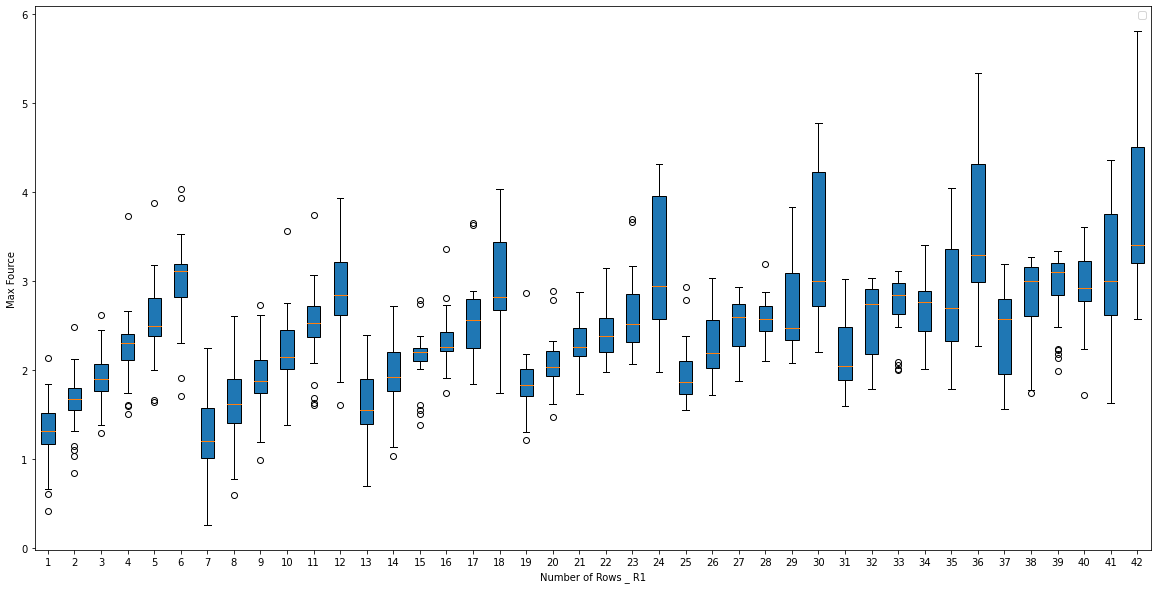

In [79]:
plt.figure(figsize=(20, 10))

plt.boxplot(R1,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows _ R1')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


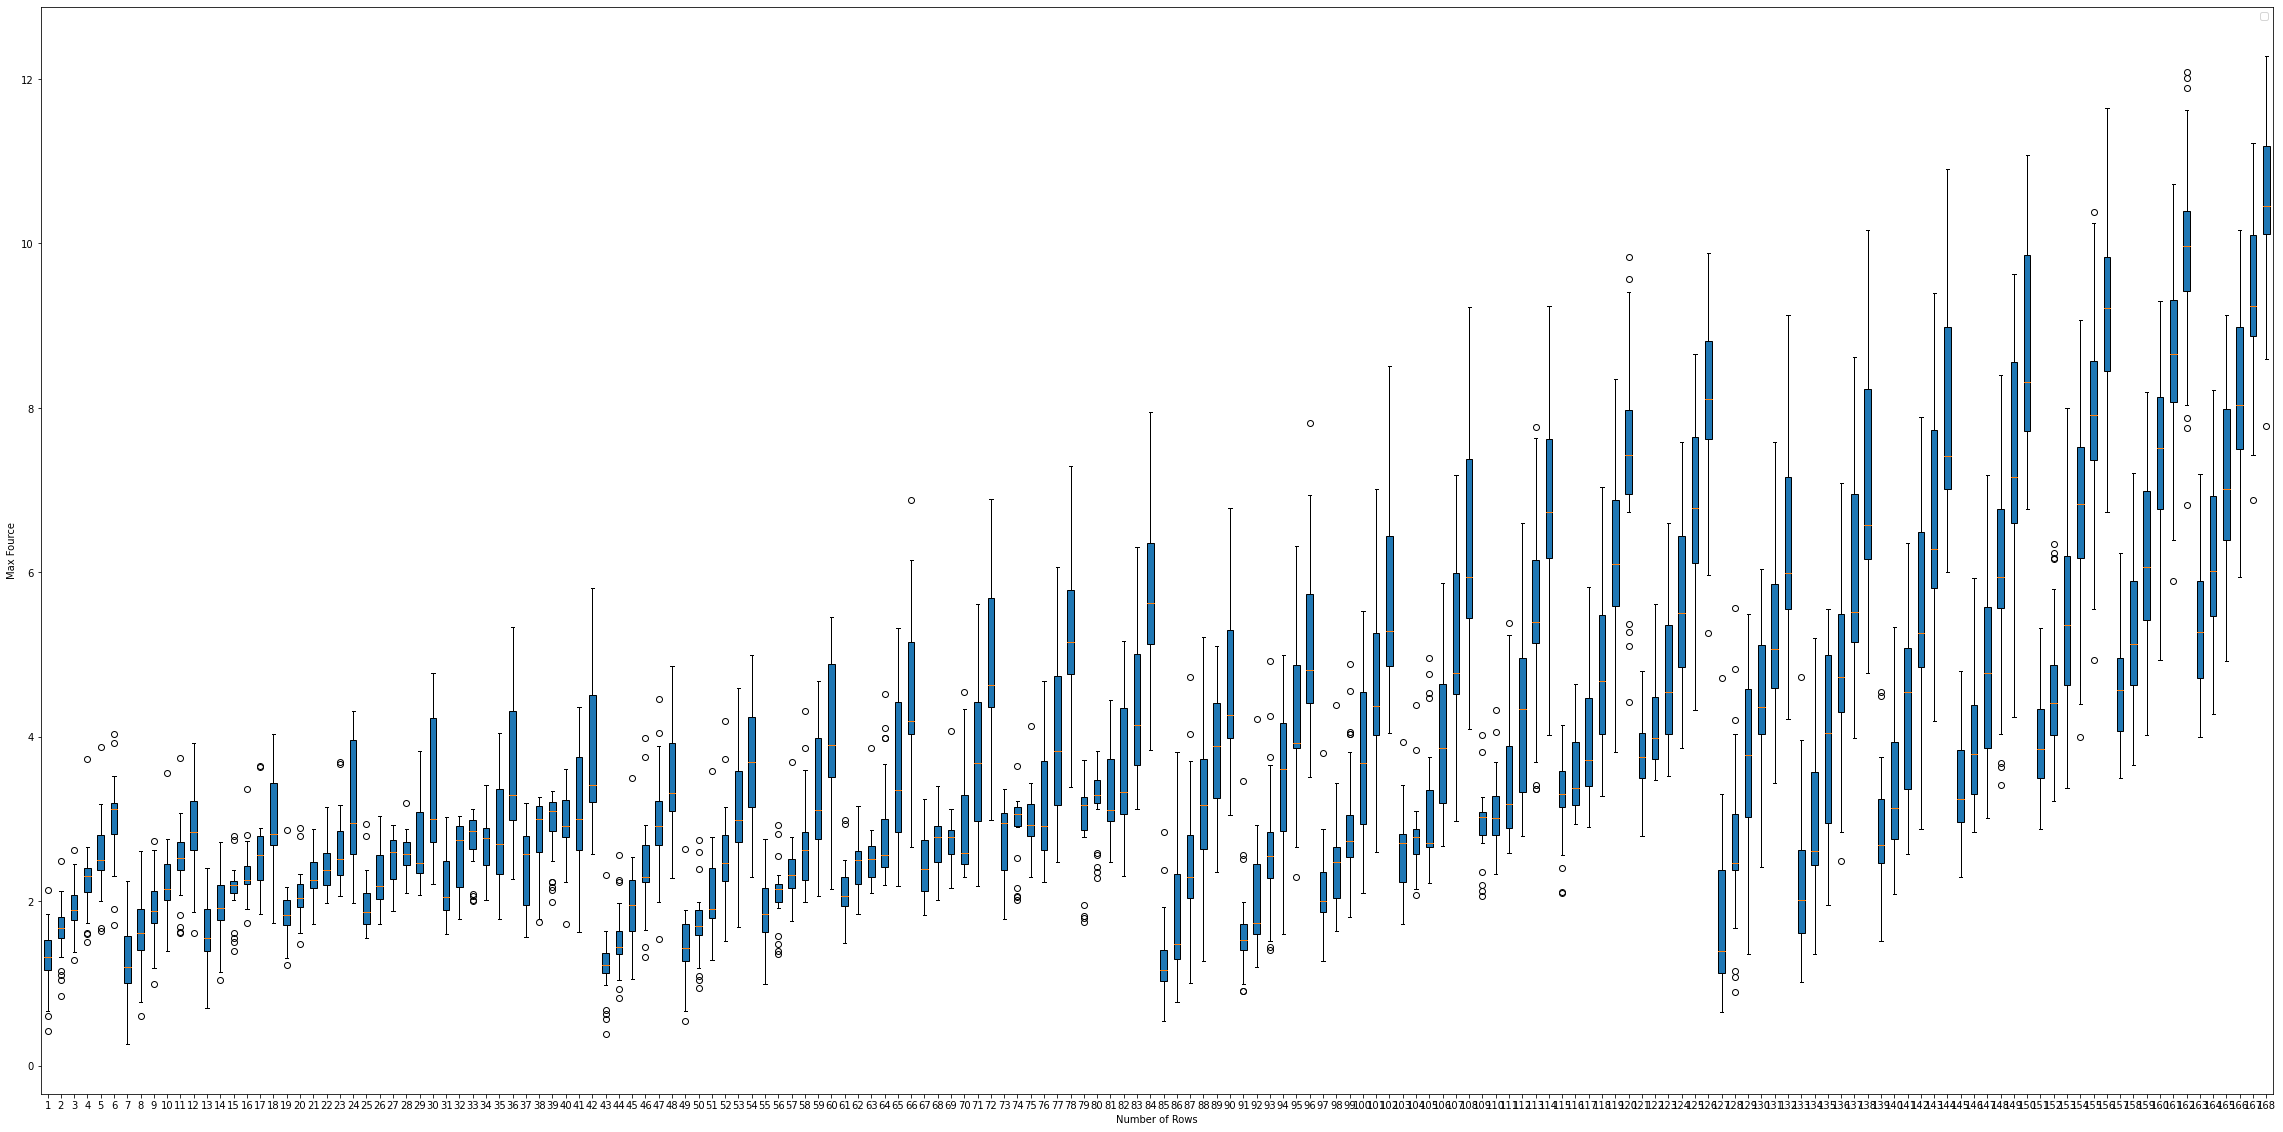

In [80]:
plt.figure(figsize=(40, 20))

plt.boxplot(R,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


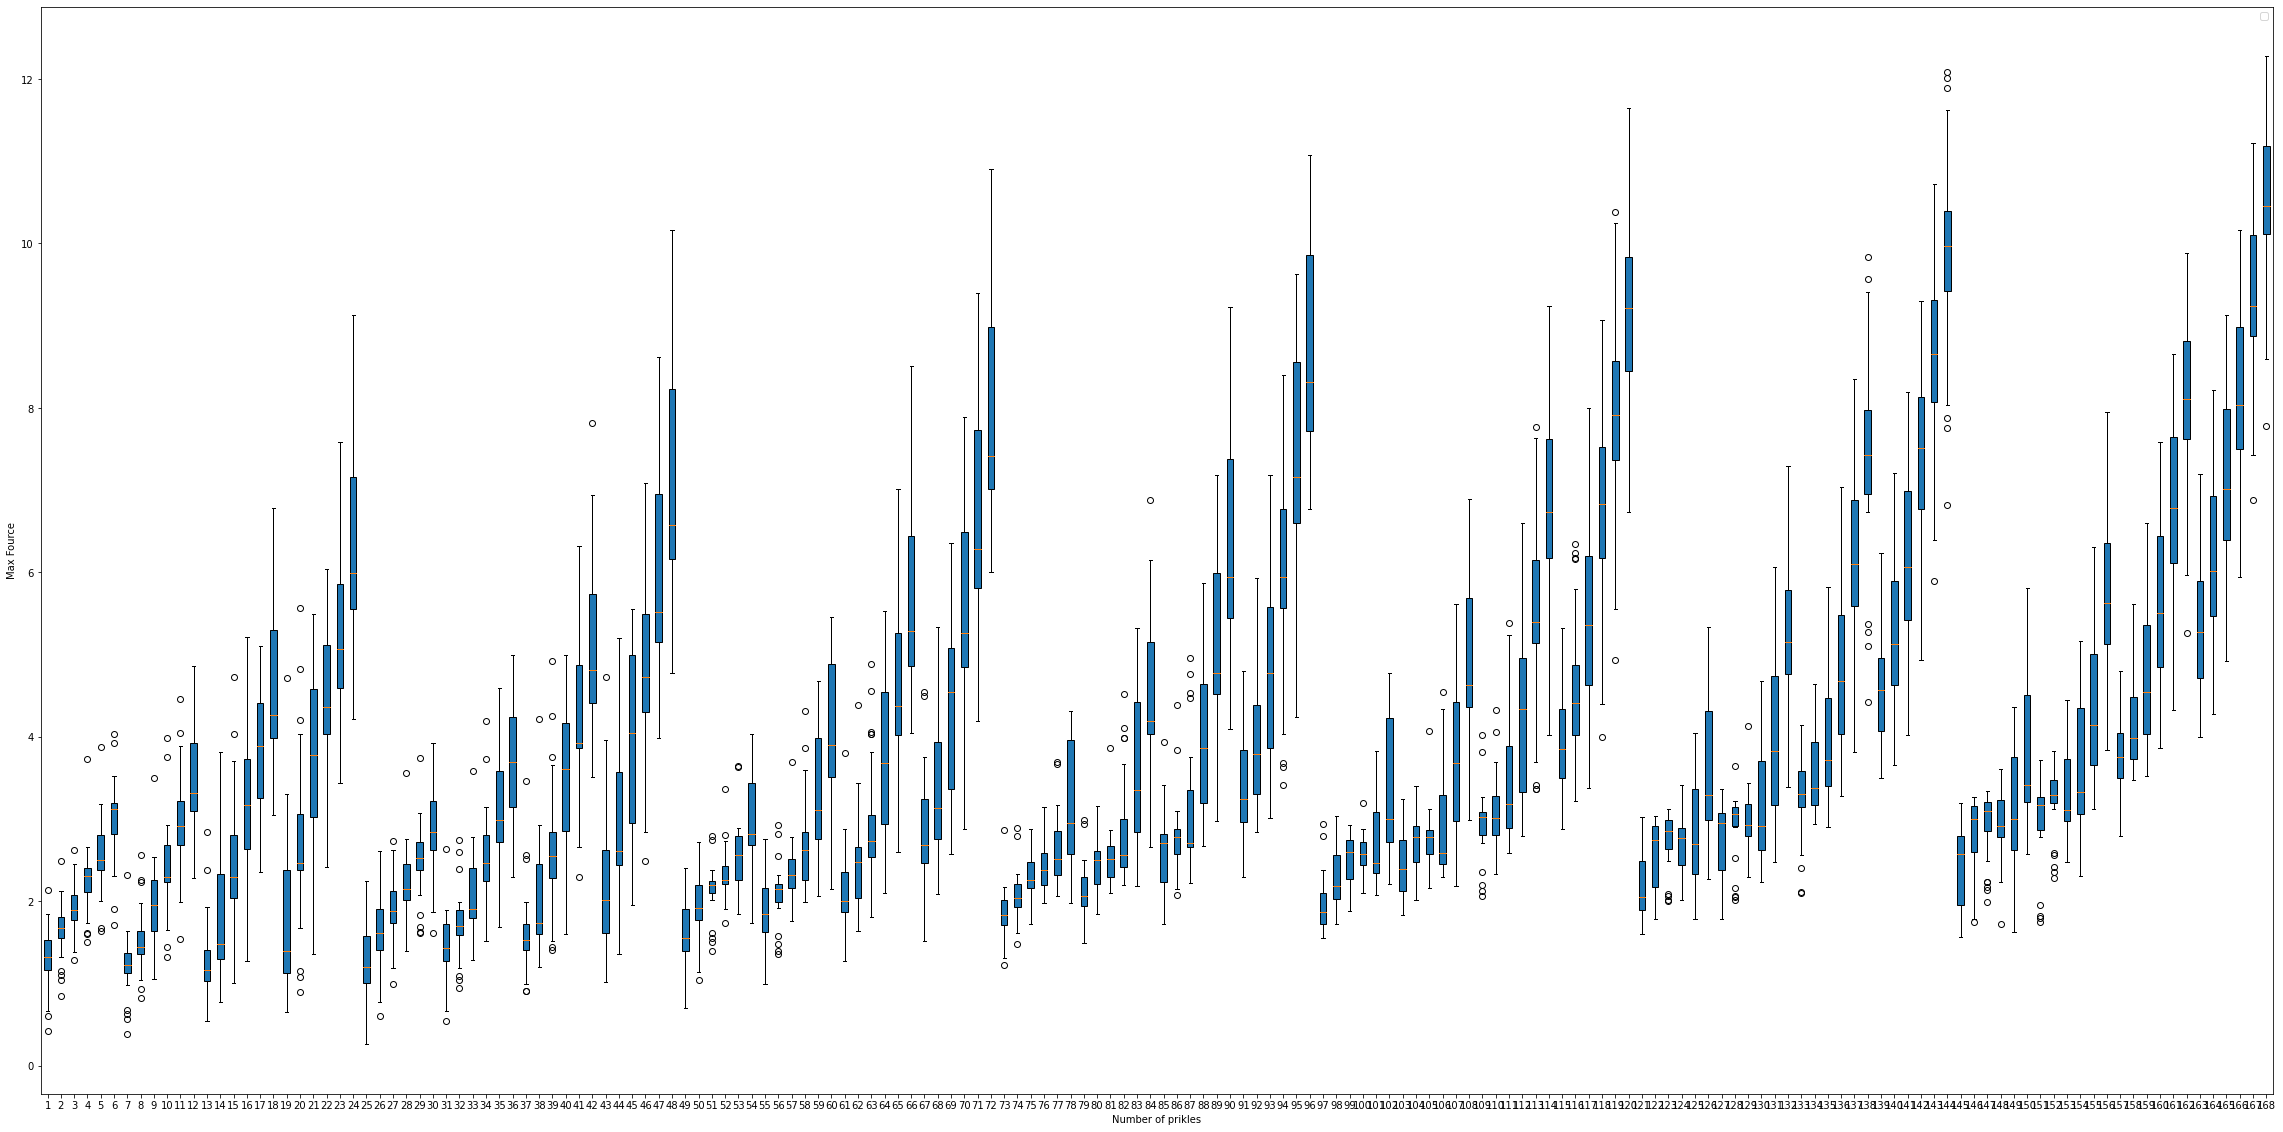

In [81]:
plt.figure(figsize=(40, 20))

plt.boxplot(P,vert=True,patch_artist=True);   
plt.xlabel('Number of prikles')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


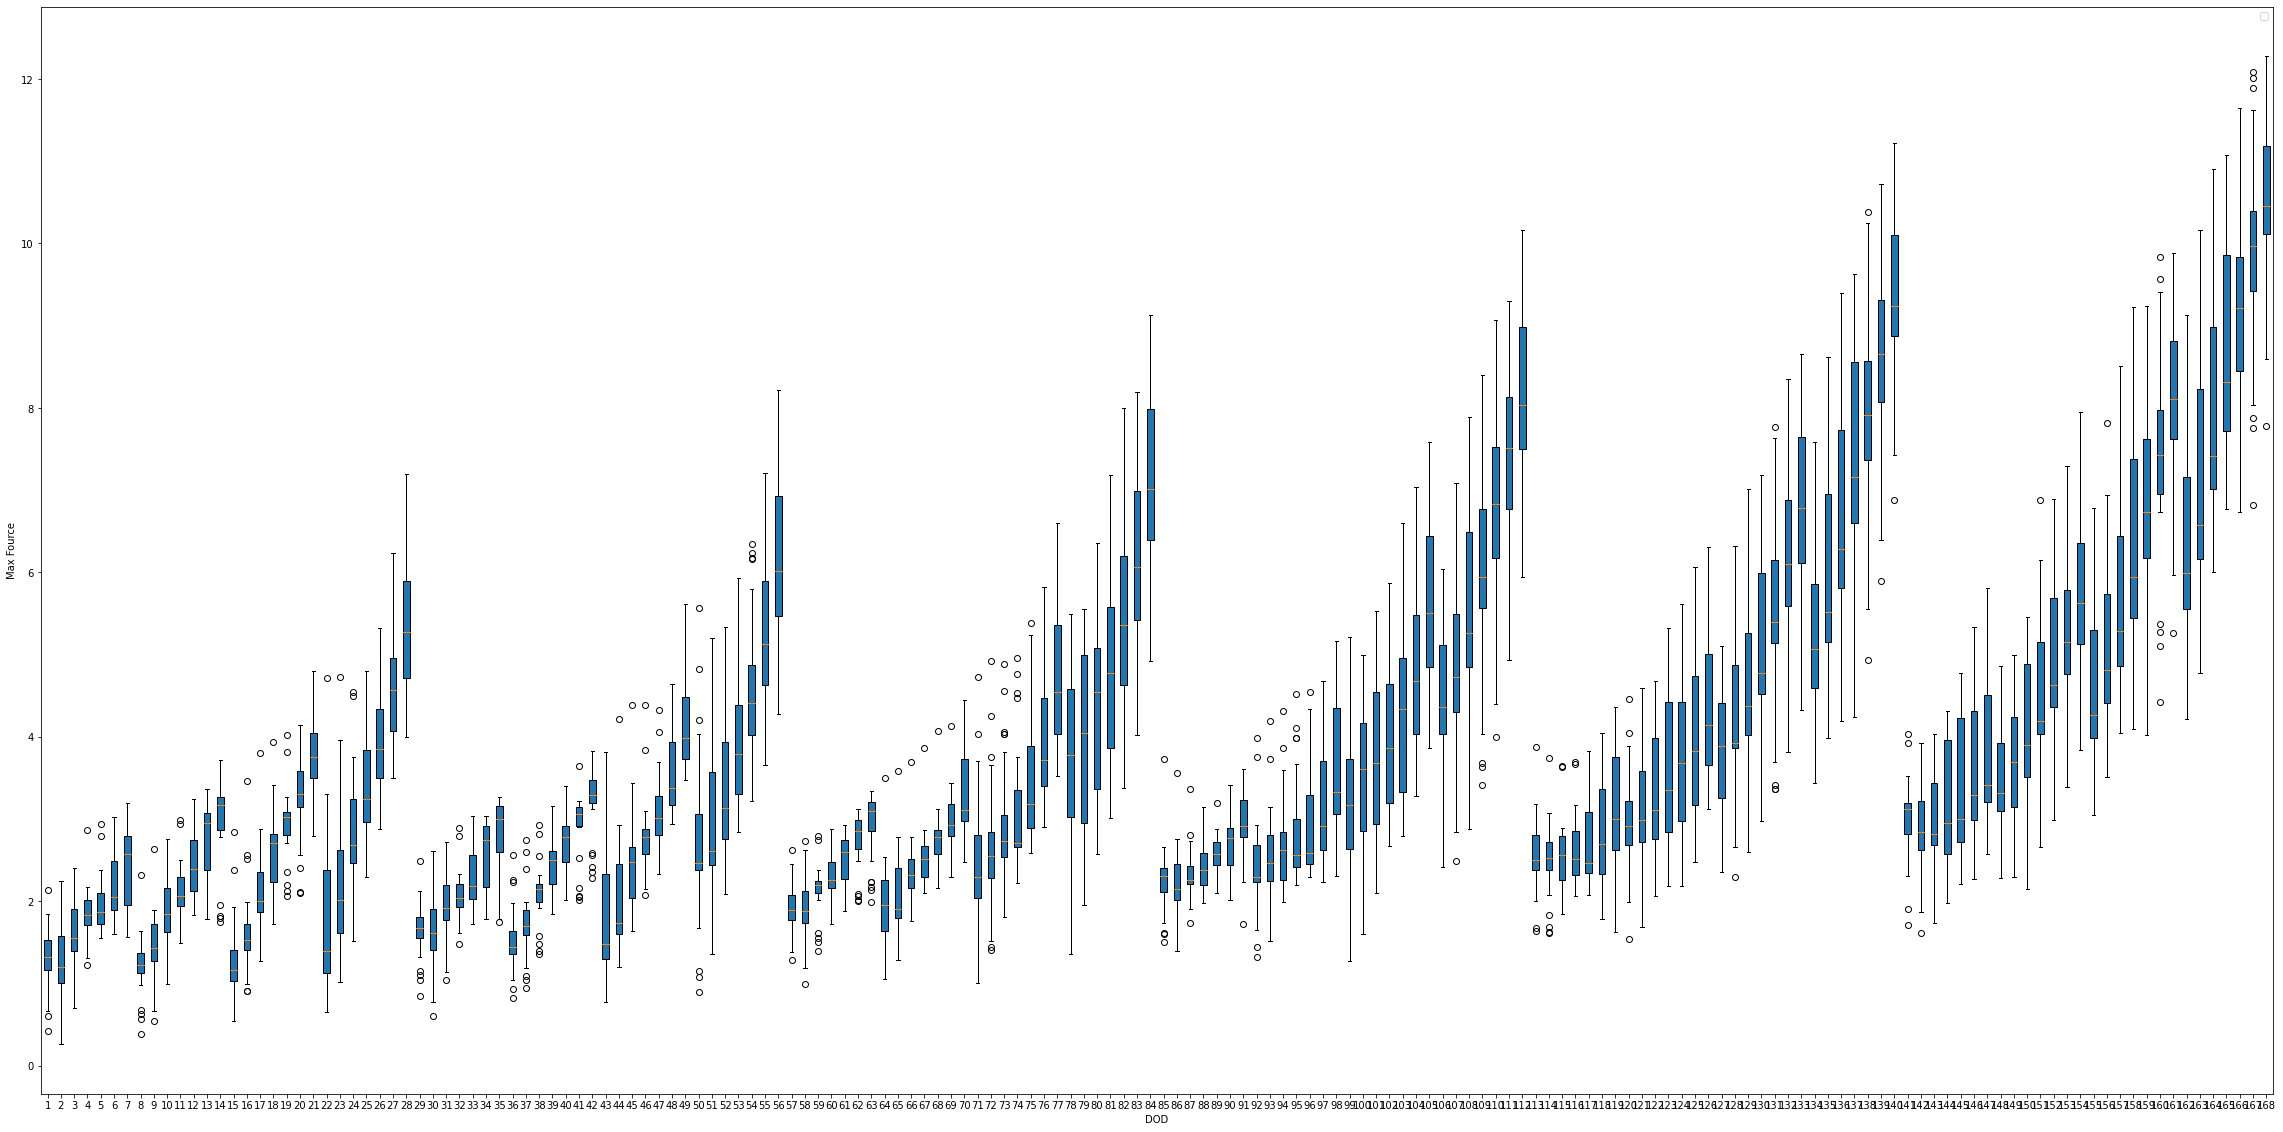

In [82]:
plt.figure(figsize=(40, 20))

plt.boxplot(DOD,vert=True,patch_artist=True);   
plt.xlabel('DOD')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

In [83]:
df3_1_avg = df3_1.drop(df3_1.iloc[:, 4:508], axis=1)
df3_1_avg.head()

,Length,OD,ID,WT,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,14.81,5.35,4.10,1.00,1,2.983810,3.920714,5.462381,7.362857,3.846667,...,4.815000,5.282083,5.795000,6.284167,3.311429,3.777857,4.306071,5.051786,6.046786,7.100714
1,16.88,6.30,5.02,0.82,1,2.392143,2.830952,3.710952,5.287143,2.625000,...,3.450000,3.841250,4.313750,4.776667,2.328214,2.714643,3.096429,3.619643,4.305000,5.267857
2,17.60,5.54,4.84,0.95,1,2.324286,2.825952,3.918333,5.877143,2.630000,...,3.646667,4.106667,4.515833,5.064583,2.395000,2.779286,3.305000,3.874286,4.563929,5.501071
3,17.09,6.31,5.43,0.76,1,2.327619,2.755238,3.561429,5.051667,2.433750,...,3.341250,3.735417,4.213750,4.650417,2.256429,2.599286,2.980714,3.517143,4.159643,5.030714
4,15.17,5.31,4.45,0.78,1,2.848333,3.665476,5.252143,7.477381,3.483333,...,4.734583,5.296250,5.804583,6.287500,3.099643,3.623929,4.233571,4.947500,5.947143,7.013214


In [84]:
df3_1_just_avg = df3_1.drop(df3_1.iloc[:, 3:508], axis=1)
df3_1_just_avg = df3_1_just_avg.drop(df3_1.iloc[:, 0:1], axis=1)

df3_1_just_avg.head()

,OD,ID,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,avg_P4,avg_P6,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,5.35,4.10,1,2.983810,3.920714,5.462381,7.362857,3.846667,4.072917,4.431250,4.815000,5.282083,5.795000,6.284167,3.311429,3.777857,4.306071,5.051786,6.046786,7.100714
1,6.30,5.02,1,2.392143,2.830952,3.710952,5.287143,2.625000,2.755833,3.124583,3.450000,3.841250,4.313750,4.776667,2.328214,2.714643,3.096429,3.619643,4.305000,5.267857
2,5.54,4.84,1,2.324286,2.825952,3.918333,5.877143,2.630000,2.903750,3.287500,3.646667,4.106667,4.515833,5.064583,2.395000,2.779286,3.305000,3.874286,4.563929,5.501071
3,6.31,5.43,1,2.327619,2.755238,3.561429,5.051667,2.433750,2.599583,2.993750,3.341250,3.735417,4.213750,4.650417,2.256429,2.599286,2.980714,3.517143,4.159643,5.030714
4,5.31,4.45,1,2.848333,3.665476,5.252143,7.477381,3.483333,3.820000,4.249583,4.734583,5.296250,5.804583,6.287500,3.099643,3.623929,4.233571,4.947500,5.947143,7.013214


In [85]:
df3_1_just_avg.iloc[:, 3:7].values

array([[2.98380952, 3.92071429, 5.46238095, 7.36285714],
       [2.39214286, 2.83095238, 3.71095238, 5.28714286],
       [2.32428571, 2.82595238, 3.91833333, 5.87714286],
       [2.32761905, 2.7552381 , 3.56142857, 5.05166667],
       [2.84833333, 3.66547619, 5.25214286, 7.47738095],
       [2.51952381, 3.05404762, 4.19095238, 6.02      ],
       [2.32547619, 2.71595238, 3.49071429, 4.91833333],
       [1.89142857, 2.18190476, 2.84190476, 4.21404762],
       [2.76880952, 3.58690476, 5.16095238, 7.46285714],
       [2.42047619, 2.88666667, 3.8652381 , 5.58928571],
       [3.19928571, 4.00761905, 4.89357143, 6.03666667],
       [2.27119048, 2.79071429, 3.77380952, 5.48261905],
       [2.60428571, 3.0602381 , 3.99761905, 5.35404762],
       [2.84571429, 3.57071429, 4.96880952, 7.11619048],
       [2.27404762, 2.73380952, 3.74095238, 5.58119048],
       [2.35333333, 3.05928571, 4.19428571, 6.12904762],
       [2.67714286, 3.5197619 , 5.07166667, 7.06904762],
       [1.93642857, 2.22071429,

In [86]:
df3_1_just_avg.iloc[:, 7:14].values

array([[3.84666667, 4.07291667, 4.43125   , 4.815     , 5.28208333,
        5.795     , 6.28416667],
       [2.625     , 2.75583333, 3.12458333, 3.45      , 3.84125   ,
        4.31375   , 4.77666667],
       [2.63      , 2.90375   , 3.2875    , 3.64666667, 4.10666667,
        4.51583333, 5.06458333],
       [2.43375   , 2.59958333, 2.99375   , 3.34125   , 3.73541667,
        4.21375   , 4.65041667],
       [3.48333333, 3.82      , 4.24958333, 4.73458333, 5.29625   ,
        5.80458333, 6.2875    ],
       [3.03583333, 3.25083333, 3.53791667, 3.83333333, 4.18083333,
        4.62875   , 5.15541667],
       [2.52166667, 2.64208333, 2.98583333, 3.2775    , 3.59125   ,
        4.01916667, 4.50083333],
       [1.91375   , 2.0325    , 2.39333333, 2.78583333, 3.07916667,
        3.38041667, 3.89125   ],
       [3.3775    , 3.76833333, 4.24833333, 4.75416667, 5.16666667,
        5.57333333, 6.32583333],
       [2.7225    , 2.8925    , 3.26125   , 3.59125   , 3.97875   ,
        4.45208333, 4.9

In [87]:
df3_1_just_avg.iloc[:, 14:20].values

array([[3.31142857, 3.77785714, 4.30607143, 5.05178571, 6.04678571,
        7.10071429],
       [2.32821429, 2.71464286, 3.09642857, 3.61964286, 4.305     ,
        5.26785714],
       [2.395     , 2.77928571, 3.305     , 3.87428571, 4.56392857,
        5.50107143],
       [2.25642857, 2.59928571, 2.98071429, 3.51714286, 4.15964286,
        5.03071429],
       [3.09964286, 3.62392857, 4.23357143, 4.9475    , 5.94714286,
        7.01321429],
       [2.72035714, 3.08285714, 3.53285714, 4.04142857, 4.72535714,
        5.57392857],
       [2.27178571, 2.65071429, 2.92214286, 3.37678571, 4.03642857,
        4.91785714],
       [1.64107143, 2.03071429, 2.39392857, 2.8325    , 3.47071429,
        4.325     ],
       [2.96107143, 3.48428571, 4.09785714, 4.89      , 5.93678571,
        7.09928571],
       [2.43071429, 2.8075    , 3.27714286, 3.80428571, 4.44607143,
        5.37678571],
       [3.43964286, 3.76785714, 4.18285714, 4.74      , 5.22      ,
        5.85535714],
       [2.18857143, 2

In [88]:
df3_1_just_avg["avg_R"] = df3_1_just_avg.iloc[:, 3:7].values.mean(axis=1)
df3_1_just_avg["avg_P"] = df3_1_just_avg.iloc[:, 7:14].values.mean(axis=1)
df3_1_just_avg["avg_DOD"] = df3_1_just_avg.iloc[:, 14:20].values.mean(axis=1)

/var/folders/t4/g8gws8z50jg1j9vtfvtjy3b80000gn/T/ipykernel_87824/3383711673.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_properties, size=18)


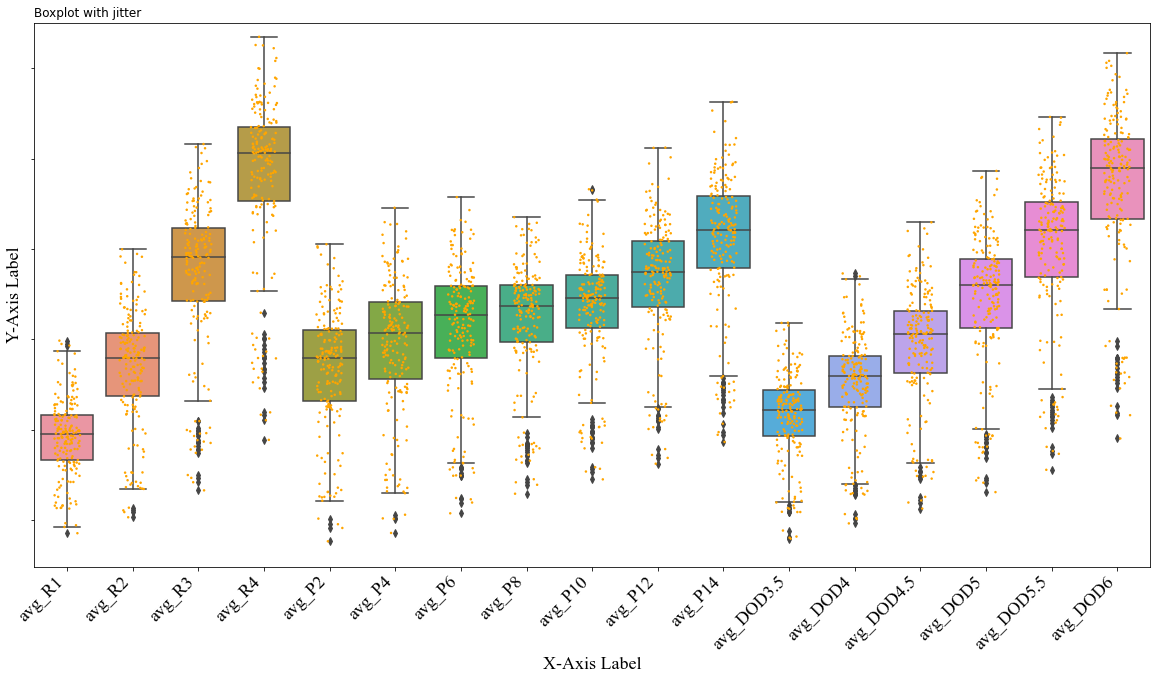

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font properties
font_path = fm.findfont(fm.FontProperties(family='Times New Roman'))
font_properties = fm.FontProperties(fname=font_path, size=16)

plt.figure(figsize=(20, 10))

# Create a boxplot
sns.boxplot(data=df3_2_just_avg.iloc[:, 3:20])

# Add stripplot
ax = sns.stripplot(data=df3_2_just_avg.iloc[:, 3:20], color="orange", jitter=0.2, size=2.5)

# Set y-axis limit to go up to 13
ax.set_ylim(bottom=None, top=13)

# Add title
plt.title("Boxplot with jitter", loc="left")

# Set x and y-axis labels with Times New Roman font and larger size
plt.xlabel("X-Axis Label", fontproperties=font_properties, size=18)
plt.ylabel("Y-Axis Label", fontproperties=font_properties, size=18)

# Set tick labels on x-axis with 45-degree rotation
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_properties, size=18, rotation=45, ha='right')

# Set tick labels on y-axis with Times New Roman font and larger size
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_properties, size=18)

# Show the plot
plt.show()

Text(0.0, 1.0, 'Boxplot with jitter')

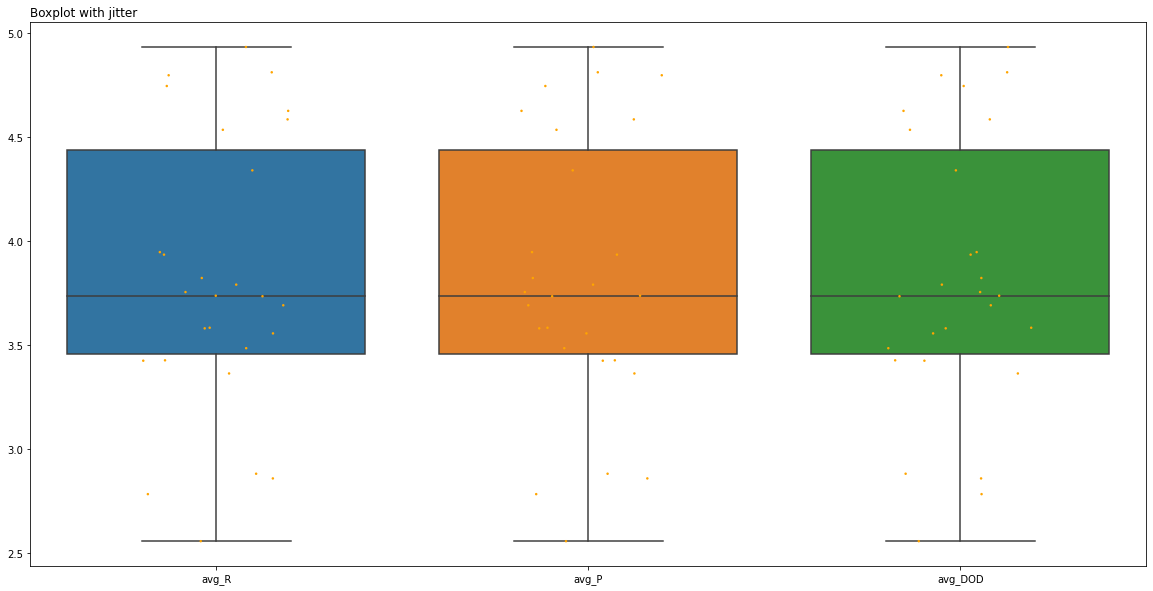

In [90]:
plt.figure(figsize=(20, 10))
sns.boxplot( data=df3_1_just_avg.iloc[:, 20:])
# add stripplot
ax = sns.stripplot(data=df3_1_just_avg.iloc[:, 20:], color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")

#### Cluster 2:

In [91]:
import pandas as pd
df3_2 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/ID/3 clusters/annotationed_data_arranged_All_ID_3clusters_2.xlsx")
print(df3_2)

    Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...   6.19  \
0    16.02  4.00  3.24  0.86  1.61  1.83  2.51  3.07  3.46  4.25  ...  10.30   
1    16.08  4.02  3.38  0.92  1.59  1.79  2.47  2.88  3.31  3.90  ...   9.98   
2    16.03  4.70  3.50  1.00  1.65  1.98  2.39  3.06  3.42  3.95  ...   9.49   
3    15.57  4.26  3.23  0.74  1.68  2.00  2.53  3.24  3.92  4.93  ...  10.62   
4    16.74  4.10  3.09  1.06  1.56  1.92  2.26  3.08  3.51  3.84  ...   9.52   
..     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
92   14.77  4.45  3.21  0.85  1.80  2.32  2.59  3.31  3.81  4.43  ...  10.74   
93   14.51  4.07  3.25  0.75  1.81  2.28  2.91  3.27  3.95  4.94  ...  11.06   
94   16.07  4.85  3.64  0.51  1.59  1.82  2.26  2.85  3.99  4.99  ...  10.42   
95   15.49  3.96  3.06  0.82  1.71  2.15  2.99  3.32  3.84  4.75  ...  10.75   
96   15.89  4.73  3.50  0.85  1.66  1.92  2.39  3.10  3.44  4.00  ...   9.83   

     6.20   6.21   6.22   6.23   6.24  

In [95]:
df3_2

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.30,11.24,11.93,12.94,13.73,12.78,12.05,12.63,13.62,2
1,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.98,10.90,11.45,12.44,13.24,12.80,11.83,12.30,13.32,2
2,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.49,10.09,10.25,10.97,11.68,12.51,12.56,11.81,12.43,2
3,15.57,4.26,3.23,0.74,1.68,2.00,2.53,3.24,3.92,4.93,...,10.62,11.54,12.28,13.04,13.72,13.50,12.56,12.94,13.92,2
4,16.74,4.10,3.09,1.06,1.56,1.92,2.26,3.08,3.51,3.84,...,9.52,10.46,11.05,12.08,13.09,12.66,11.48,11.86,12.84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,14.77,4.45,3.21,0.85,1.80,2.32,2.59,3.31,3.81,4.43,...,10.74,11.33,11.71,12.42,13.12,13.94,13.62,13.08,13.70,2
93,14.51,4.07,3.25,0.75,1.81,2.28,2.91,3.27,3.95,4.94,...,11.06,11.97,12.54,13.22,13.93,14.50,13.27,13.41,14.35,2
94,16.07,4.85,3.64,0.51,1.59,1.82,2.26,2.85,3.99,4.99,...,10.42,11.33,11.29,12.07,12.85,13.15,12.37,12.73,13.65,2
95,15.49,3.96,3.06,0.82,1.71,2.15,2.99,3.32,3.84,4.75,...,10.75,11.70,12.58,13.52,14.29,13.42,12.59,13.10,14.08,2


<AxesSubplot:>

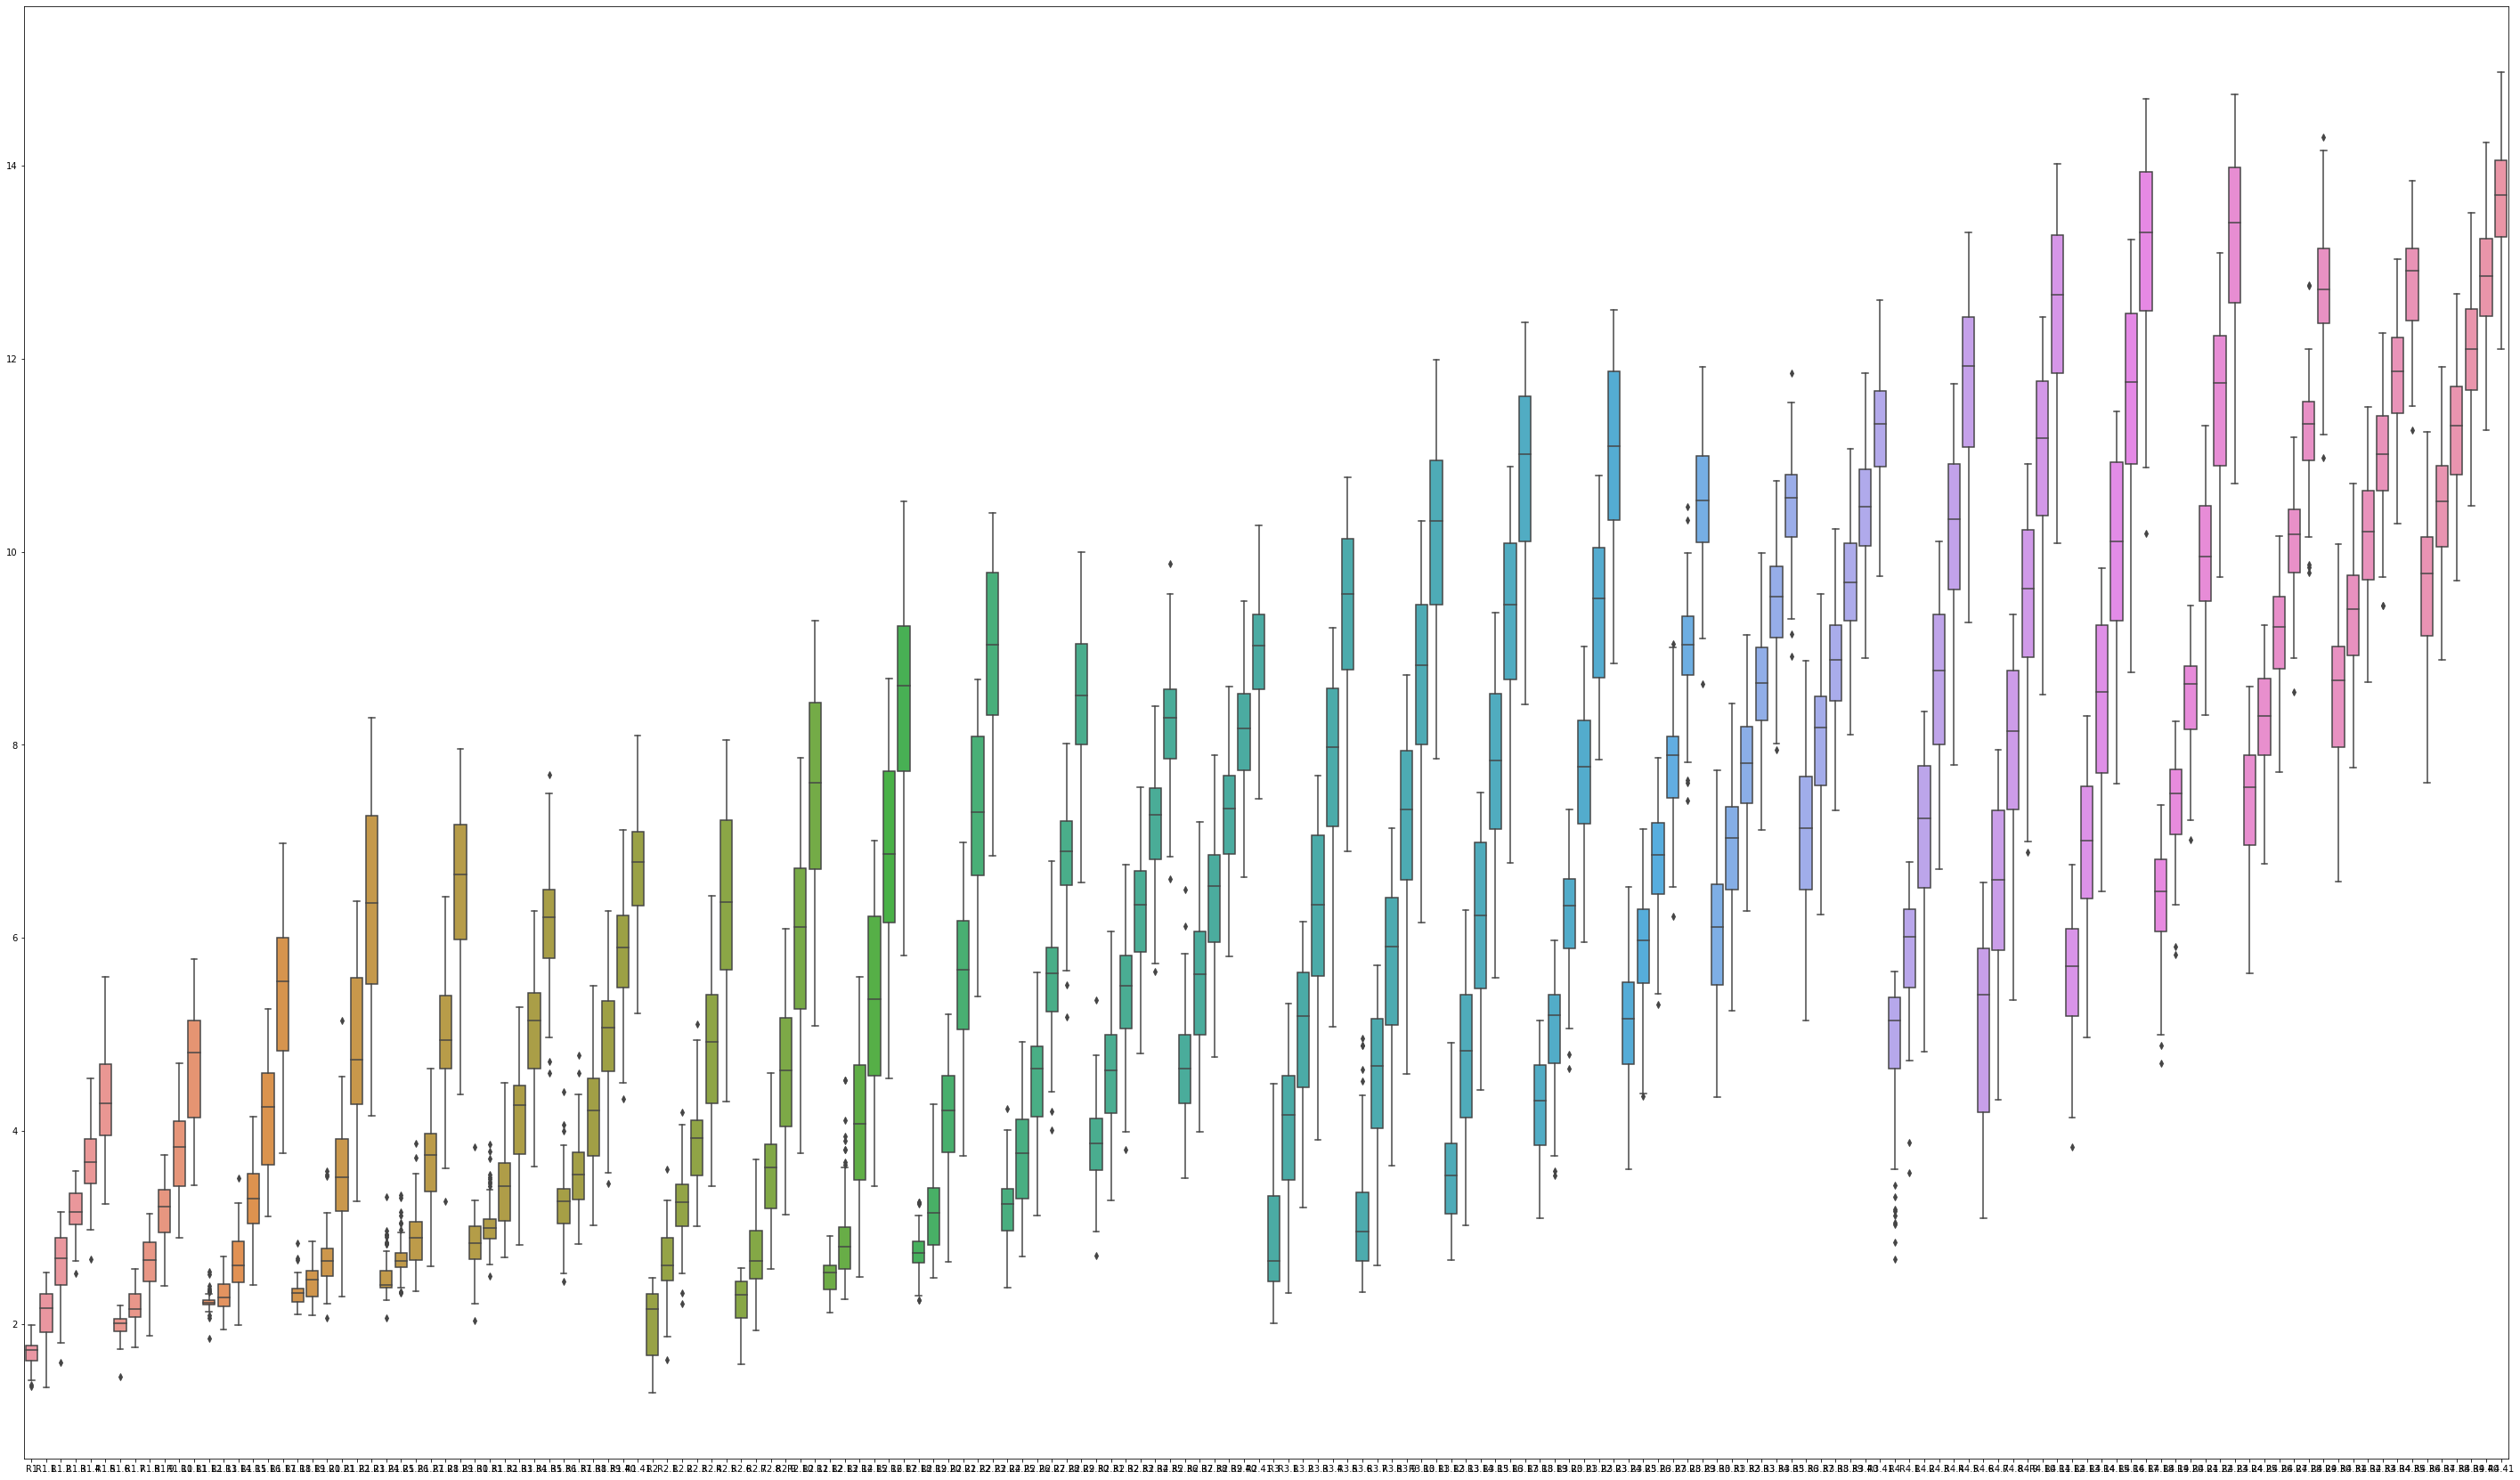

In [96]:
plt.figure(figsize=(50, 30))
sns.boxplot( data=df3_2.iloc[:, 4:172])
# add stripplot
# ax = sns.stripplot(data=df[df, color="orange", jitter=0.2, size=2.5)
# # add title
# plt.title("Boxplot with jitter", loc="left")

##### Annotated features:

In [97]:
# split the data into inputs and outputs
R = df3_2.iloc[:, 4:172].values
P = df3_2.iloc[:, 172:340].values
DOD = df3_2.iloc[:, 340:508].values

In [98]:
R1 = df3_2.iloc[:, 4:46].values
R2 = df3_2.iloc[:, 46:88].values
R3 = df3_2.iloc[:, 88:130].values
R4 = df3_2.iloc[:, 130:172].values

In [99]:
R

array([[ 1.61,  1.83,  2.51, ..., 12.11, 12.84, 13.62],
       [ 1.59,  1.79,  2.47, ..., 11.8 , 12.53, 13.32],
       [ 1.65,  1.98,  2.39, ..., 10.82, 11.6 , 12.43],
       ...,
       [ 1.59,  1.82,  2.26, ..., 11.88, 12.82, 13.65],
       [ 1.71,  2.15,  2.99, ..., 12.53, 13.25, 14.08],
       [ 1.66,  1.92,  2.39, ..., 11.29, 12.06, 12.9 ]])

In [100]:
P

array([[ 1.61,  1.83,  2.51, ..., 12.11, 12.84, 13.62],
       [ 1.59,  1.79,  2.47, ..., 11.8 , 12.53, 13.32],
       [ 1.65,  1.98,  2.39, ..., 10.82, 11.6 , 12.43],
       ...,
       [ 1.59,  1.82,  2.26, ..., 11.88, 12.82, 13.65],
       [ 1.71,  2.15,  2.99, ..., 12.53, 13.25, 14.08],
       [ 1.66,  1.92,  2.39, ..., 11.29, 12.06, 12.9 ]])

In [101]:
DOD

array([[ 1.61,  1.94,  2.31, ..., 12.05, 12.63, 13.62],
       [ 1.59,  1.94,  2.27, ..., 11.83, 12.3 , 13.32],
       [ 1.65,  1.83,  2.17, ..., 12.56, 11.81, 12.43],
       ...,
       [ 1.59,  1.75,  2.15, ..., 12.37, 12.73, 13.65],
       [ 1.71,  2.  ,  2.27, ..., 12.59, 13.1 , 14.08],
       [ 1.66,  1.82,  2.17, ..., 12.47, 12.17, 12.9 ]])

In [102]:
df3_2['avg_R1'] = df3_2.iloc[:, 4:46].values.mean(axis=1)
df3_2['avg_R2'] = df3_2.iloc[:, 46:88].values.mean(axis=1)
df3_2['avg_R3'] = df3_2.iloc[:, 88:130].values.mean(axis=1)
df3_2['avg_R4'] = df3_2.iloc[:, 130:172].values.mean(axis=1)

In [103]:
df3_2['avg_P2'] = df3_2.iloc[:, 172:196].values.mean(axis=1)
df3_2['avg_P4'] = df3_2.iloc[:, 196:220].values.mean(axis=1)
df3_2['avg_P6'] = df3_2.iloc[:, 220:244].values.mean(axis=1)
df3_2['avg_P8'] = df3_2.iloc[:, 244:268].values.mean(axis=1)
df3_2['avg_P10'] = df3_2.iloc[:, 268:292].values.mean(axis=1)
df3_2['avg_P12'] = df3_2.iloc[:, 292:316].values.mean(axis=1)
df3_2['avg_P14'] = df3_2.iloc[:, 316:340].values.mean(axis=1)

In [104]:
df3_2['avg_DOD3.5'] = df3_2.iloc[:, 340:368].values.mean(axis=1)
df3_2['avg_DOD4'] = df3_2.iloc[:, 368:396].values.mean(axis=1)
df3_2['avg_DOD4.5'] = df3_2.iloc[:, 396:424].values.mean(axis=1)
df3_2['avg_DOD5'] = df3_2.iloc[:, 424:452].values.mean(axis=1)
df3_2['avg_DOD5.5'] = df3_2.iloc[:, 452:480].values.mean(axis=1)
df3_2['avg_DOD6'] = df3_2.iloc[:, 480:508].values.mean(axis=1)


In [105]:
df3_2.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
2,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857
3,15.57,4.26,3.23,0.74,1.68,2.00,2.53,3.24,3.92,4.93,...,6.537500,6.648333,7.351250,8.287500,4.092143,4.918571,5.920714,7.063571,8.267500,9.621429
4,16.74,4.10,3.09,1.06,1.56,1.92,2.26,3.08,3.51,3.84,...,5.945000,5.902500,6.505833,7.412917,3.882857,4.496786,5.232143,6.250357,7.365000,8.678214


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


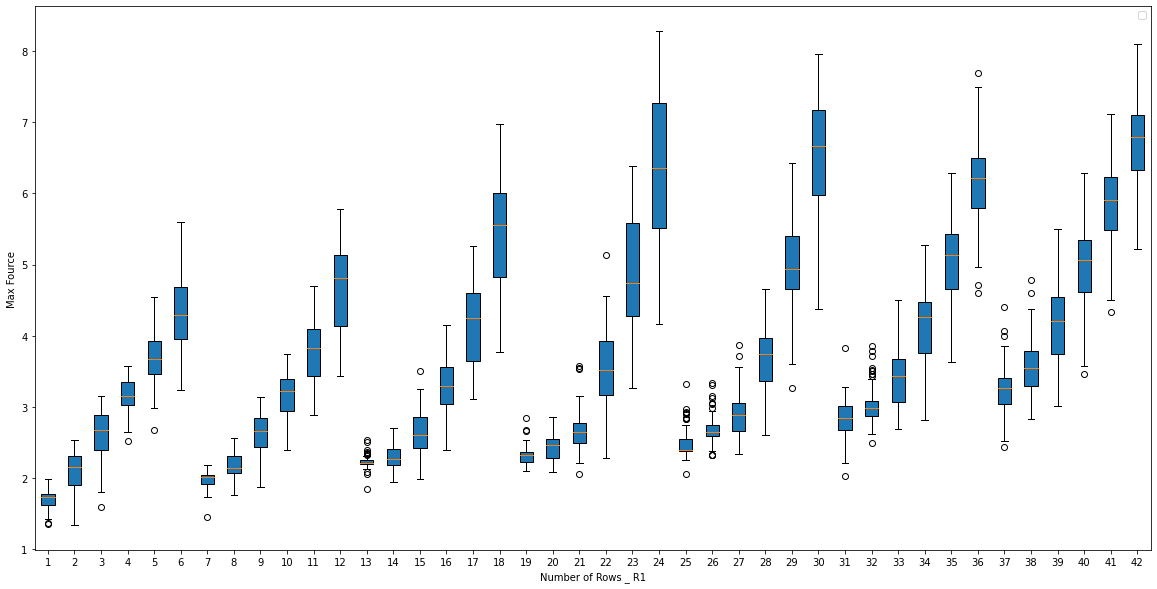

In [106]:
plt.figure(figsize=(20, 10))

plt.boxplot(R1,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows _ R1')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


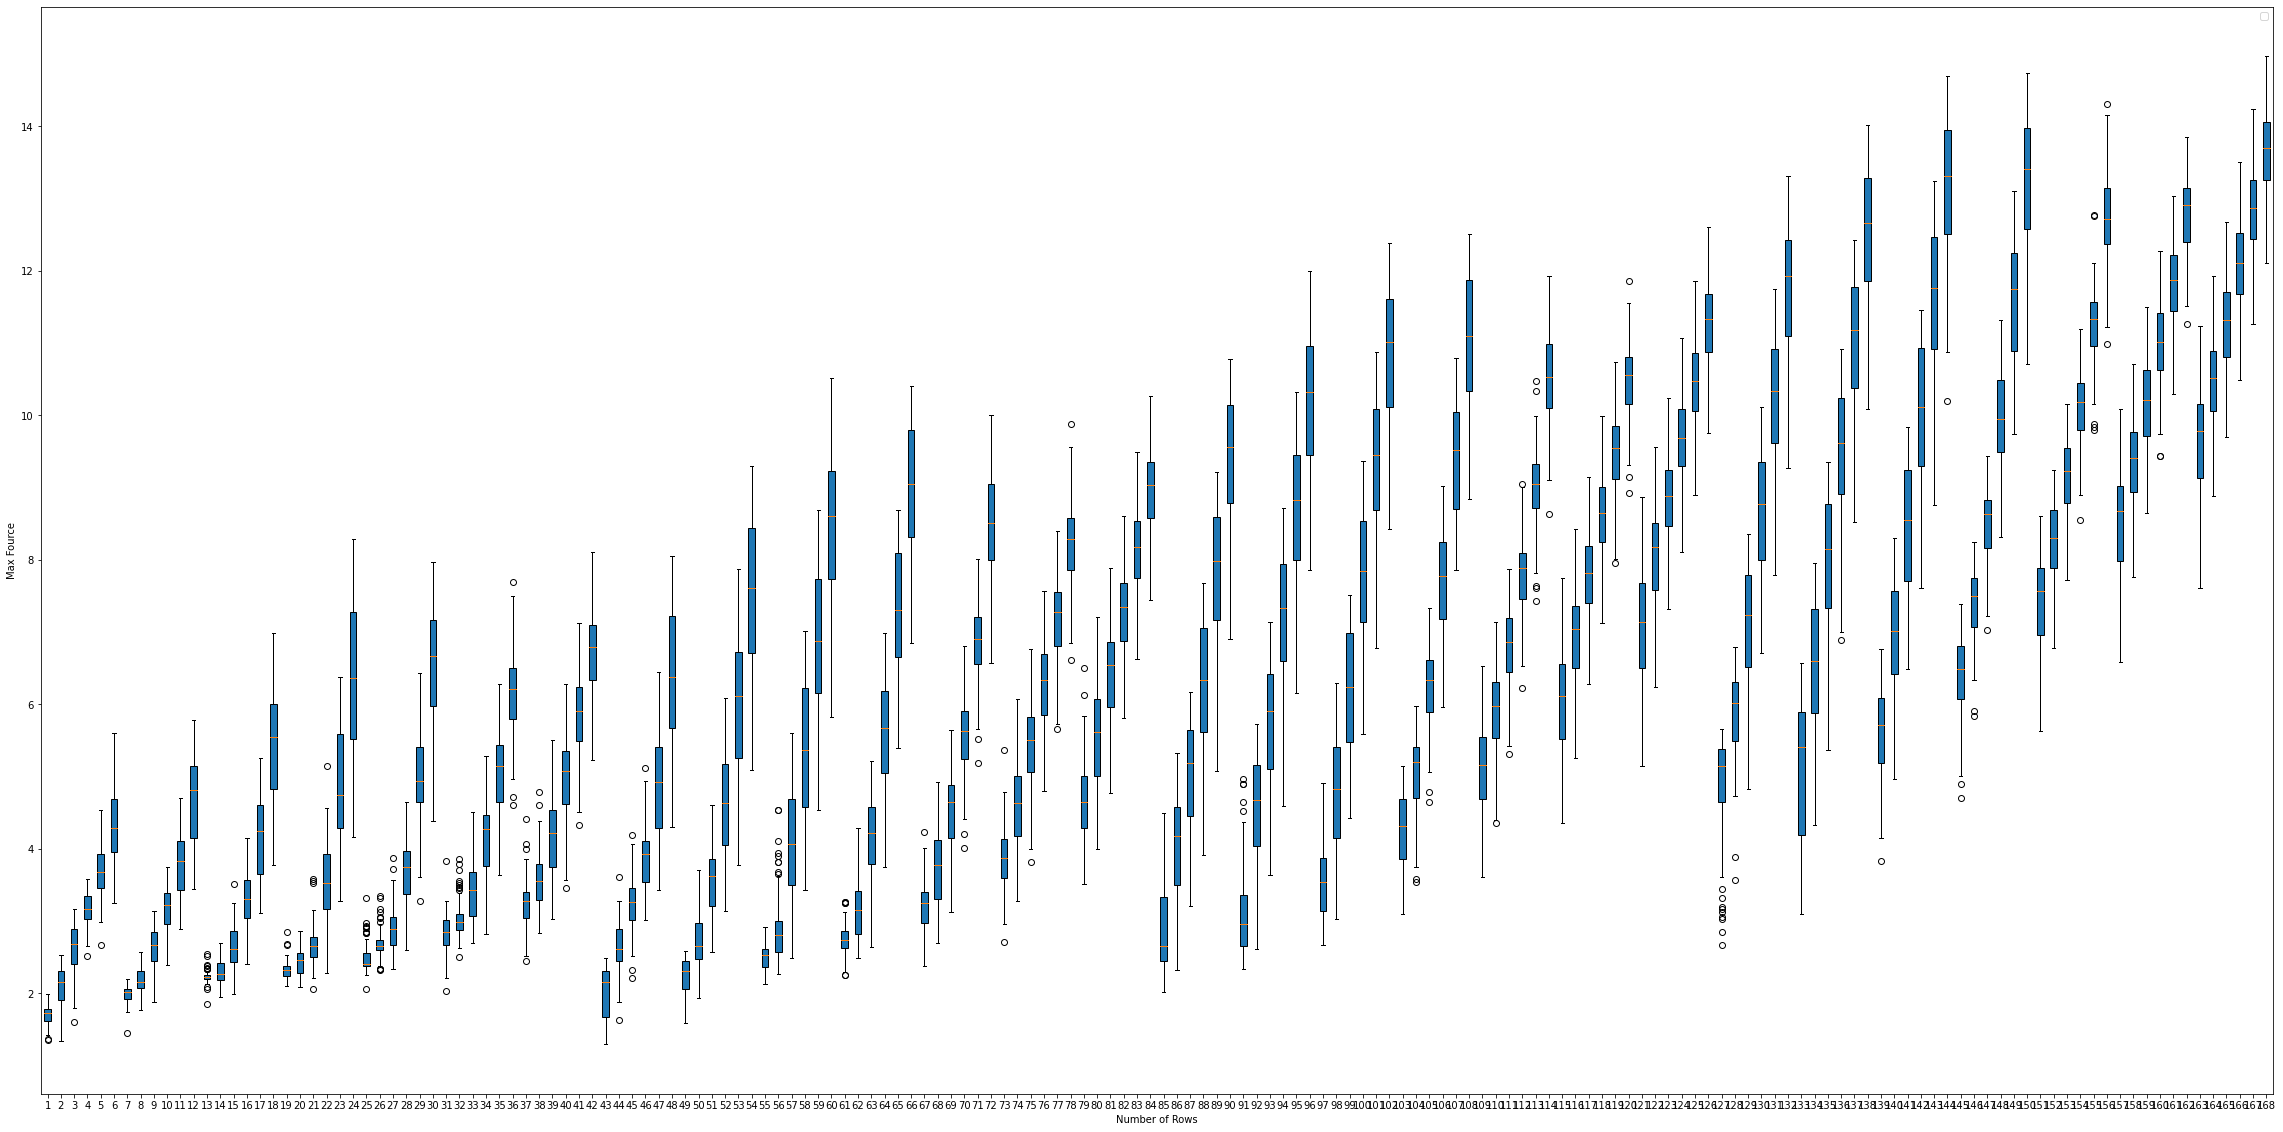

In [107]:
plt.figure(figsize=(40, 20))

plt.boxplot(R,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


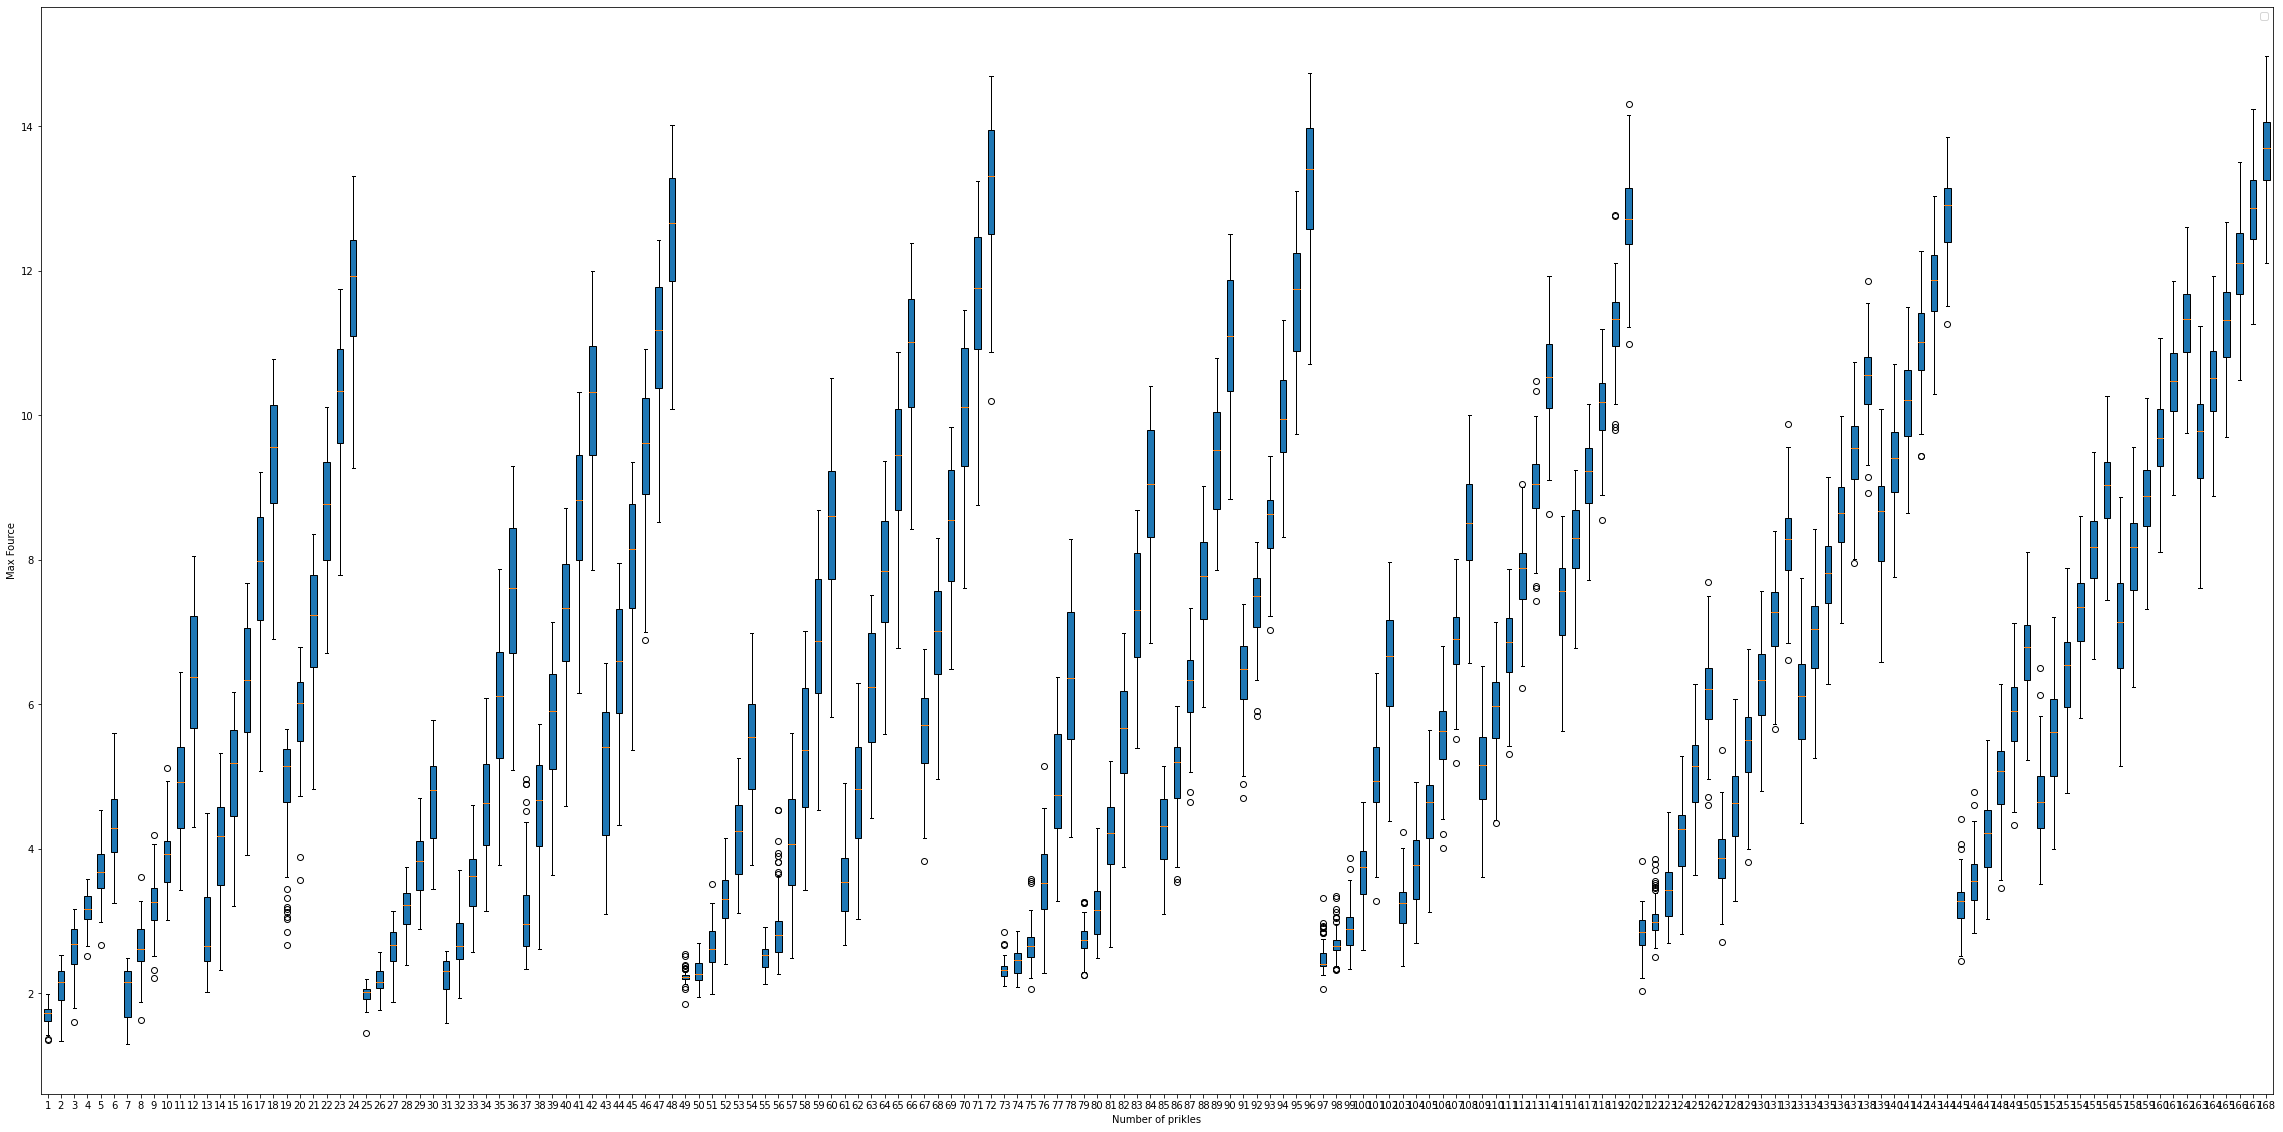

In [108]:
plt.figure(figsize=(40, 20))

plt.boxplot(P,vert=True,patch_artist=True);   
plt.xlabel('Number of prikles')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


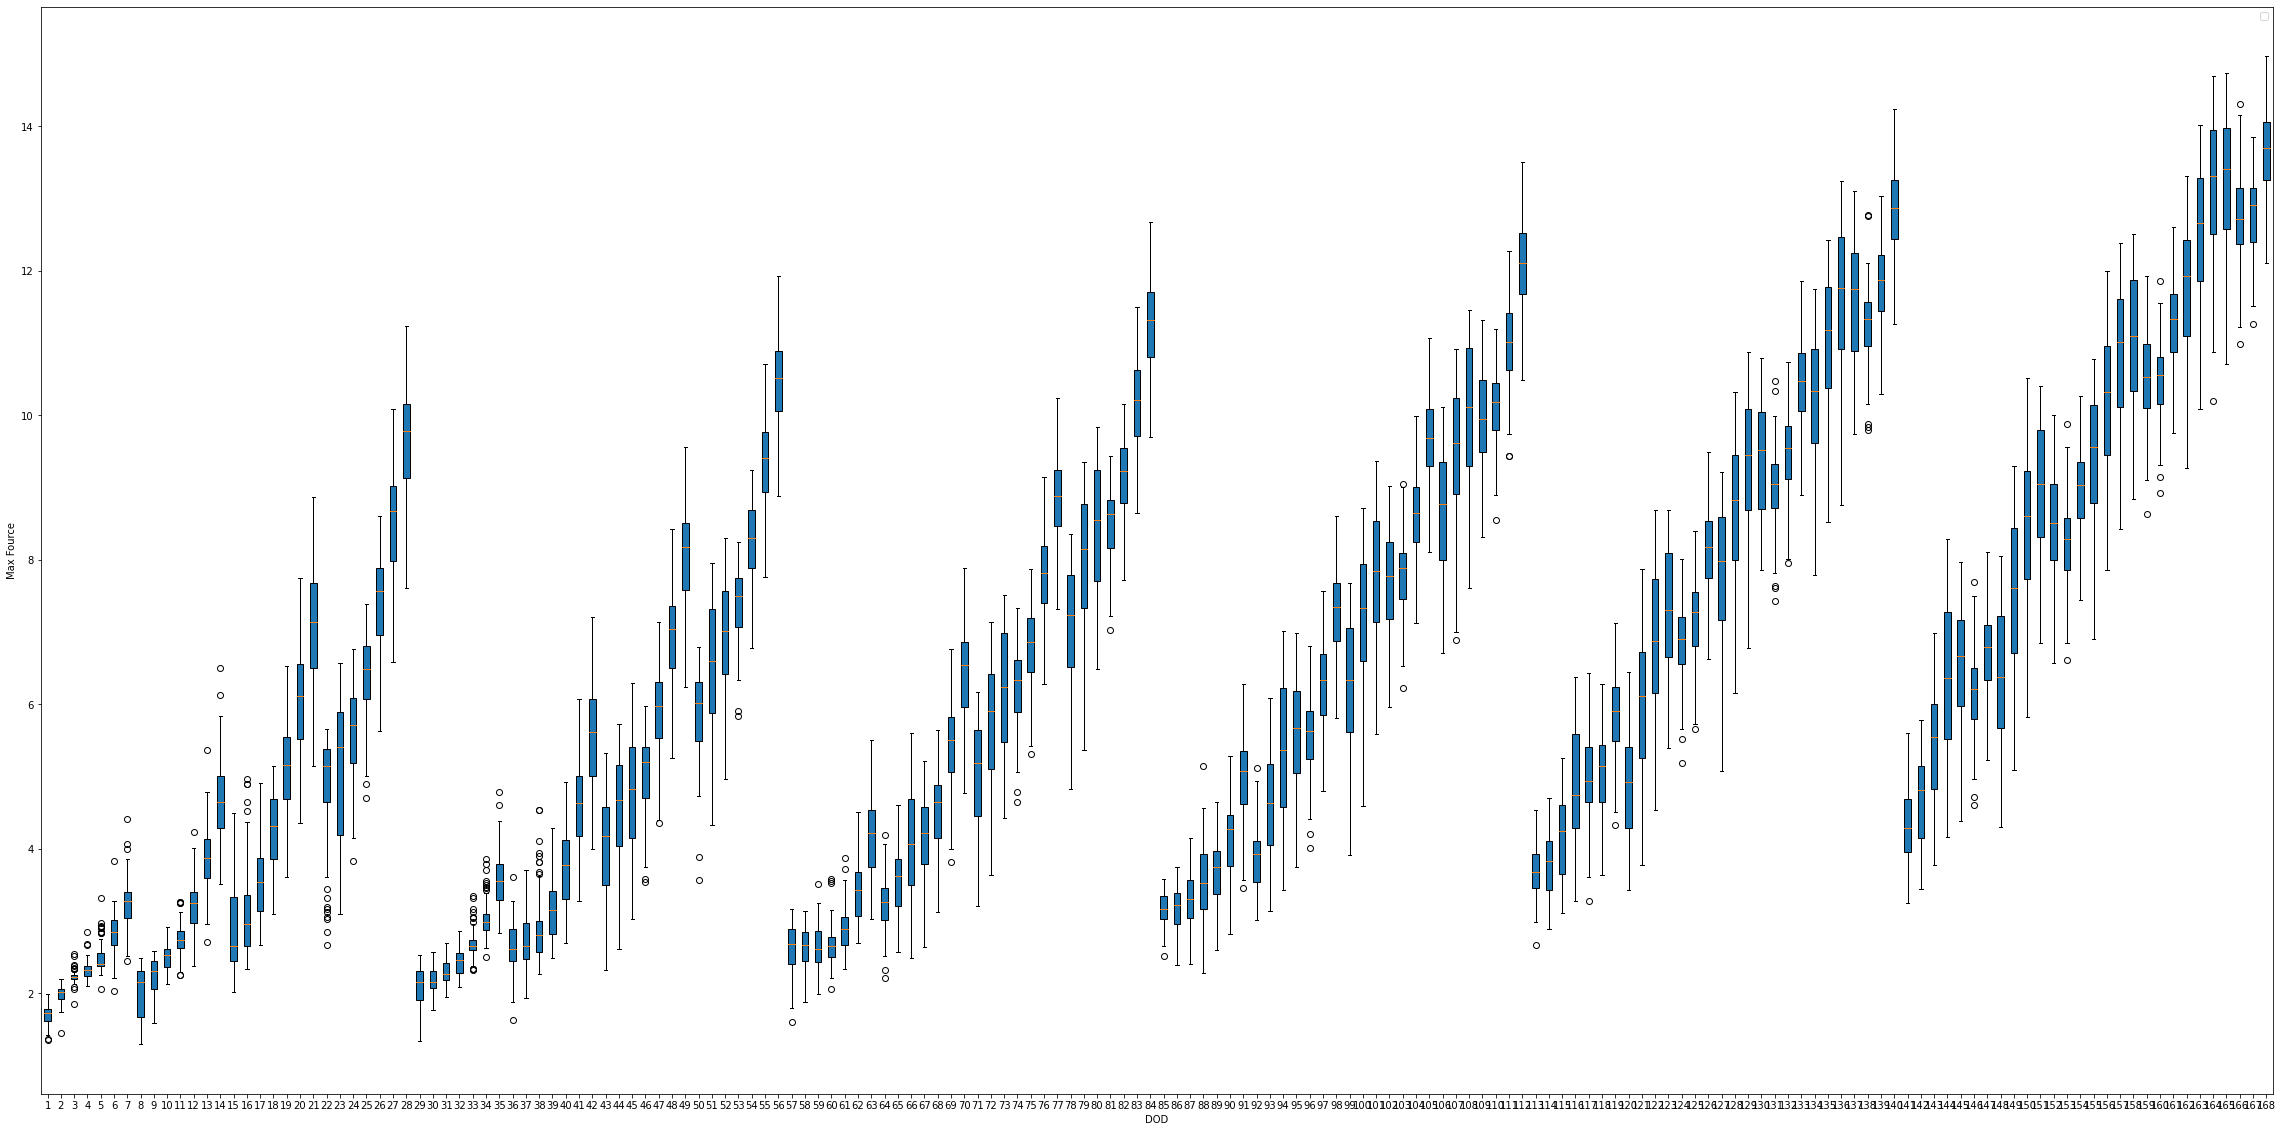

In [109]:
plt.figure(figsize=(40, 20))

plt.boxplot(DOD,vert=True,patch_artist=True);   
plt.xlabel('DOD')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

In [110]:
df3_2_avg = df3_2.drop(df3_2.iloc[:, 4:508], axis=1)
df3_2_avg.head()

,Length,OD,ID,WT,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,16.02,4.00,3.24,0.86,2,3.533810,5.080476,7.355238,9.668095,5.069583,...,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,16.08,4.02,3.38,0.92,2,3.335476,4.830238,7.065000,9.383333,4.794167,...,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
2,16.03,4.70,3.50,1.00,2,3.196667,4.462619,6.352619,8.593333,4.487500,...,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857
3,15.57,4.26,3.23,0.74,2,3.778571,5.340714,7.544762,9.925238,5.384167,...,6.537500,6.648333,7.351250,8.287500,4.092143,4.918571,5.920714,7.063571,8.267500,9.621429
4,16.74,4.10,3.09,1.06,2,3.290476,4.779524,6.872143,8.994762,4.776667,...,5.945000,5.902500,6.505833,7.412917,3.882857,4.496786,5.232143,6.250357,7.365000,8.678214


In [111]:
df3_2_just_avg = df3_2.drop(df3_2.iloc[:, 3:508], axis=1)
df3_2_just_avg = df3_2_just_avg.drop(df3_2.iloc[:, 0:1], axis=1)

df3_2_just_avg.head()

,OD,ID,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,avg_P4,avg_P6,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,4.00,3.24,2,3.533810,5.080476,7.355238,9.668095,5.069583,5.748333,6.247917,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,4.02,3.38,2,3.335476,4.830238,7.065000,9.383333,4.794167,5.431667,5.980000,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
2,4.70,3.50,2,3.196667,4.462619,6.352619,8.593333,4.487500,4.844167,5.272500,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857
3,4.26,3.23,2,3.778571,5.340714,7.544762,9.925238,5.384167,5.906667,6.415833,6.537500,6.648333,7.351250,8.287500,4.092143,4.918571,5.920714,7.063571,8.267500,9.621429
4,4.10,3.09,2,3.290476,4.779524,6.872143,8.994762,4.776667,5.375000,5.971667,5.945000,5.902500,6.505833,7.412917,3.882857,4.496786,5.232143,6.250357,7.365000,8.678214


In [112]:
df3_2_just_avg.iloc[:, 3:7].values

array([[ 3.53380952,  5.08047619,  7.3552381 ,  9.66809524],
       [ 3.33547619,  4.8302381 ,  7.065     ,  9.38333333],
       [ 3.19666667,  4.46261905,  6.35261905,  8.59333333],
       [ 3.77857143,  5.34071429,  7.5447619 ,  9.9252381 ],
       [ 3.29047619,  4.77952381,  6.87214286,  8.9947619 ],
       [ 3.32190476,  4.72142857,  6.7397619 ,  8.985     ],
       [ 3.95261905,  5.6997619 ,  7.83142857, 10.14261905],
       [ 3.73214286,  5.37595238,  7.47285714,  9.68547619],
       [ 3.64119048,  4.87928571,  6.85619048,  9.20357143],
       [ 3.7147619 ,  5.2502381 ,  7.54452381,  9.95738095],
       [ 3.20357143,  4.54595238,  6.64833333,  9.00714286],
       [ 3.9197619 ,  5.54      ,  7.80309524, 10.165     ],
       [ 4.06142857,  5.70833333,  7.8047619 , 10.20928571],
       [ 3.80738095,  5.64452381,  7.98190476, 10.26595238],
       [ 3.90333333,  5.66404762,  7.88238095, 10.11404762],
       [ 3.97666667,  5.73261905,  8.03928571, 10.17428571],
       [ 3.46666667,  5.

In [113]:
df3_2_just_avg.iloc[:, 7:14].values

array([[5.06958333, 5.74833333, 6.24791667, 6.185     , 6.36083333,
        7.14833333, 8.10583333],
       [4.79416667, 5.43166667, 5.98      , 6.04791667, 6.13375   ,
        6.87041667, 7.81666667],
       [4.4875    , 4.84416667, 5.2725    , 5.75291667, 6.01625   ,
        6.205     , 6.98083333],
       [5.38416667, 5.90666667, 6.41583333, 6.5375    , 6.64833333,
        7.35125   , 8.2875    ],
       [4.77666667, 5.375     , 5.97166667, 5.945     , 5.9025    ,
        6.50583333, 7.41291667],
       [4.62791667, 5.01416667, 5.47416667, 6.01833333, 6.43458333,
        6.63708333, 7.38791667],
       [5.73791667, 6.22458333, 6.74666667, 7.06291667, 6.94291667,
        7.3575    , 8.27375   ],
       [5.2425    , 5.64625   , 6.14791667, 6.71583333, 7.00708333,
        7.20125   , 8.00541667],
       [4.74708333, 5.16791667, 5.70541667, 6.23791667, 6.54291667,
        6.90708333, 7.70708333],
       [5.19666667, 5.88666667, 6.30791667, 6.29666667, 6.65916667,
        7.49625   , 8.4

In [114]:
df3_2_just_avg.iloc[:, 14:20].values

array([[ 4.09535714,  4.79964286,  5.68571429,  6.73535714,  7.92107143,
         9.21928571],
       [ 3.97392857,  4.61071429,  5.4375    ,  6.43928571,  7.5925    ,
         8.86714286],
       [ 3.5175    ,  4.20821429,  4.99071429,  5.905     ,  7.00357143,
         8.28285714],
       [ 4.09214286,  4.91857143,  5.92071429,  7.06357143,  8.2675    ,
         9.62142857],
       [ 3.88285714,  4.49678571,  5.23214286,  6.25035714,  7.365     ,
         8.67821429],
       [ 3.87214286,  4.51285714,  5.24821429,  6.21      ,  7.27392857,
         8.535     ],
       [ 4.45571429,  5.21857143,  6.13571429,  7.2375    ,  8.50785714,
         9.88428571],
       [ 4.325     ,  5.02785714,  5.87142857,  6.86071429,  8.005     ,
         9.30964286],
       [ 3.66      ,  4.41392857,  5.37142857,  6.52964286,  7.78535714,
         9.11      ],
       [ 4.19035714,  4.97321429,  5.91964286,  6.9875    ,  8.17428571,
         9.45535714],
       [ 3.75214286,  4.38142857,  5.1575    ,  6.

In [115]:
df3_2_just_avg["avg_R"] = df3_2_just_avg.iloc[:, 3:7].values.mean(axis=1)
df3_2_just_avg["avg_P"] = df3_2_just_avg.iloc[:, 7:14].values.mean(axis=1)
df3_2_just_avg["avg_DOD"] = df3_2_just_avg.iloc[:, 14:20].values.mean(axis=1)

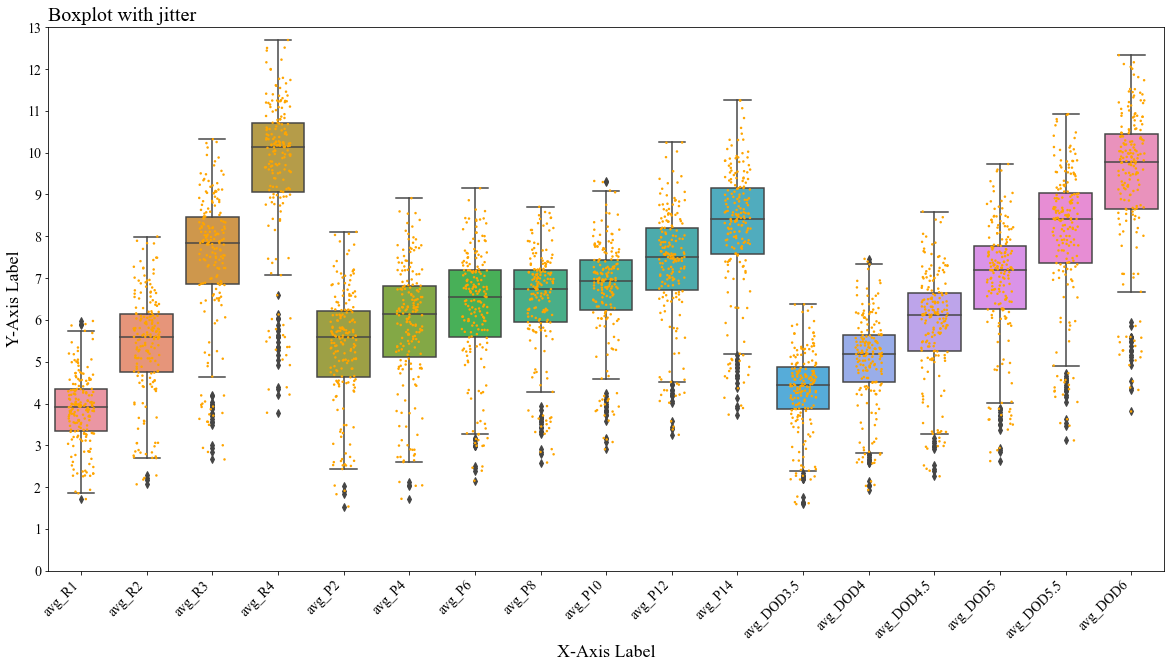

In [164]:
# Set font properties
font_path = fm.findfont(fm.FontProperties(family='Times New Roman'))
font_properties = fm.FontProperties(fname=font_path, size=16)

plt.figure(figsize=(20, 10))
sns.boxplot( data=df3_2_just_avg.iloc[:, 3:20])
# Set y-axis limit to go up to 13
ax.set_ylim(bottom=None, top=13)
# add stripplot
ax = sns.stripplot(data=df3_2_just_avg.iloc[:, 3:20], color="orange", jitter=0.2, size=2.5)
# add title
plt.title("Boxplot with jitter", loc="left")

# Set y-axis limits
ax.set_ylim(0, 13)

# Set y-axis ticks and labels
ax.set_yticks(range(14))
ax.set_yticklabels(range(14), fontproperties=font_properties, size=14)

# Set title with Times New Roman font and larger size
plt.title("Boxplot with jitter", loc="left", fontproperties=font_properties, size=20)

# Set x and y-axis labels with Times New Roman font and larger size
plt.xlabel("X-Axis Label", fontproperties=font_properties, size=18)
plt.ylabel("Y-Axis Label", fontproperties=font_properties, size=18)

# Set tick labels on x-axis with 45-degree rotation
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_properties, size=14, rotation=45, ha='right')

# Show the plot
plt.show()


#### All 3 Clusters:

In [118]:
import pandas as pd
df3_2 = pd.read_excel("/Users/negin/Desktop/UVA/projects with Prof. Baek/Johns Hopkins University/NM_Work/Interpretations of clusters tables/ID/3 clusters/annotationed_data_arranged_All_ID.xlsx")
print(df3_2)

     Length    OD    ID    WT    R1  R1.1  R1.2  R1.3  R1.4  R1.5  ...   6.19  \
0     16.02  4.00  3.24  0.86  1.61  1.83  2.51  3.07  3.46  4.25  ...  10.30   
1     13.44  3.46  2.66  0.82  2.40  2.96  3.42  3.82  4.75  5.98  ...  12.08   
2     14.63  3.86  2.61  0.83  2.13  2.58  3.40  3.89  4.41  5.64  ...  11.41   
3     16.08  4.02  3.38  0.92  1.59  1.79  2.47  2.88  3.31  3.90  ...   9.98   
4     16.03  4.70  3.50  1.00  1.65  1.98  2.39  3.06  3.42  3.95  ...   9.49   
..      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
182   18.08  5.85  4.88  0.95  1.15  1.56  1.78  2.12  2.43  2.99  ...   7.40   
183   21.05  6.12  5.67  0.91  0.42  0.85  1.29  1.51  1.64  1.71  ...   4.42   
184   16.55  6.10  4.85  0.85  1.43  1.79  2.04  2.39  2.53  3.21  ...   7.74   
185   17.13  5.75  4.95  0.90  1.32  1.64  1.86  2.26  2.42  3.04  ...   7.82   
186   15.56  5.24  4.58  0.68  1.57  1.80  2.06  2.36  2.92  3.12  ...   9.41   

      6.20   6.21   6.22   

In [119]:
df3_2

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,6.19,6.20,6.21,6.22,6.23,6.24,6.25,6.26,6.27,cluster
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,10.30,11.24,11.93,12.94,13.73,12.78,12.05,12.63,13.62,2
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,12.08,13.06,14.20,15.05,15.84,15.51,14.25,14.48,15.43,0
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,11.41,12.39,13.61,14.54,15.31,14.71,13.51,13.80,14.77,0
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,9.98,10.90,11.45,12.44,13.24,12.80,11.83,12.30,13.32,2
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,9.49,10.09,10.25,10.97,11.68,12.51,12.56,11.81,12.43,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,18.08,5.85,4.88,0.95,1.15,1.56,1.78,2.12,2.43,2.99,...,7.40,7.39,5.78,6.55,7.27,8.17,9.11,9.59,9.93,1
183,21.05,6.12,5.67,0.91,0.42,0.85,1.29,1.51,1.64,1.71,...,4.42,5.26,4.22,4.78,6.01,6.77,6.73,6.82,7.78,1
184,16.55,6.10,4.85,0.85,1.43,1.79,2.04,2.39,2.53,3.21,...,7.74,8.40,5.95,6.71,7.51,8.43,9.38,10.37,10.77,1
185,17.13,5.75,4.95,0.90,1.32,1.64,1.86,2.26,2.42,3.04,...,7.82,7.92,6.05,6.81,7.61,8.56,9.52,10.40,10.44,1


<AxesSubplot:>

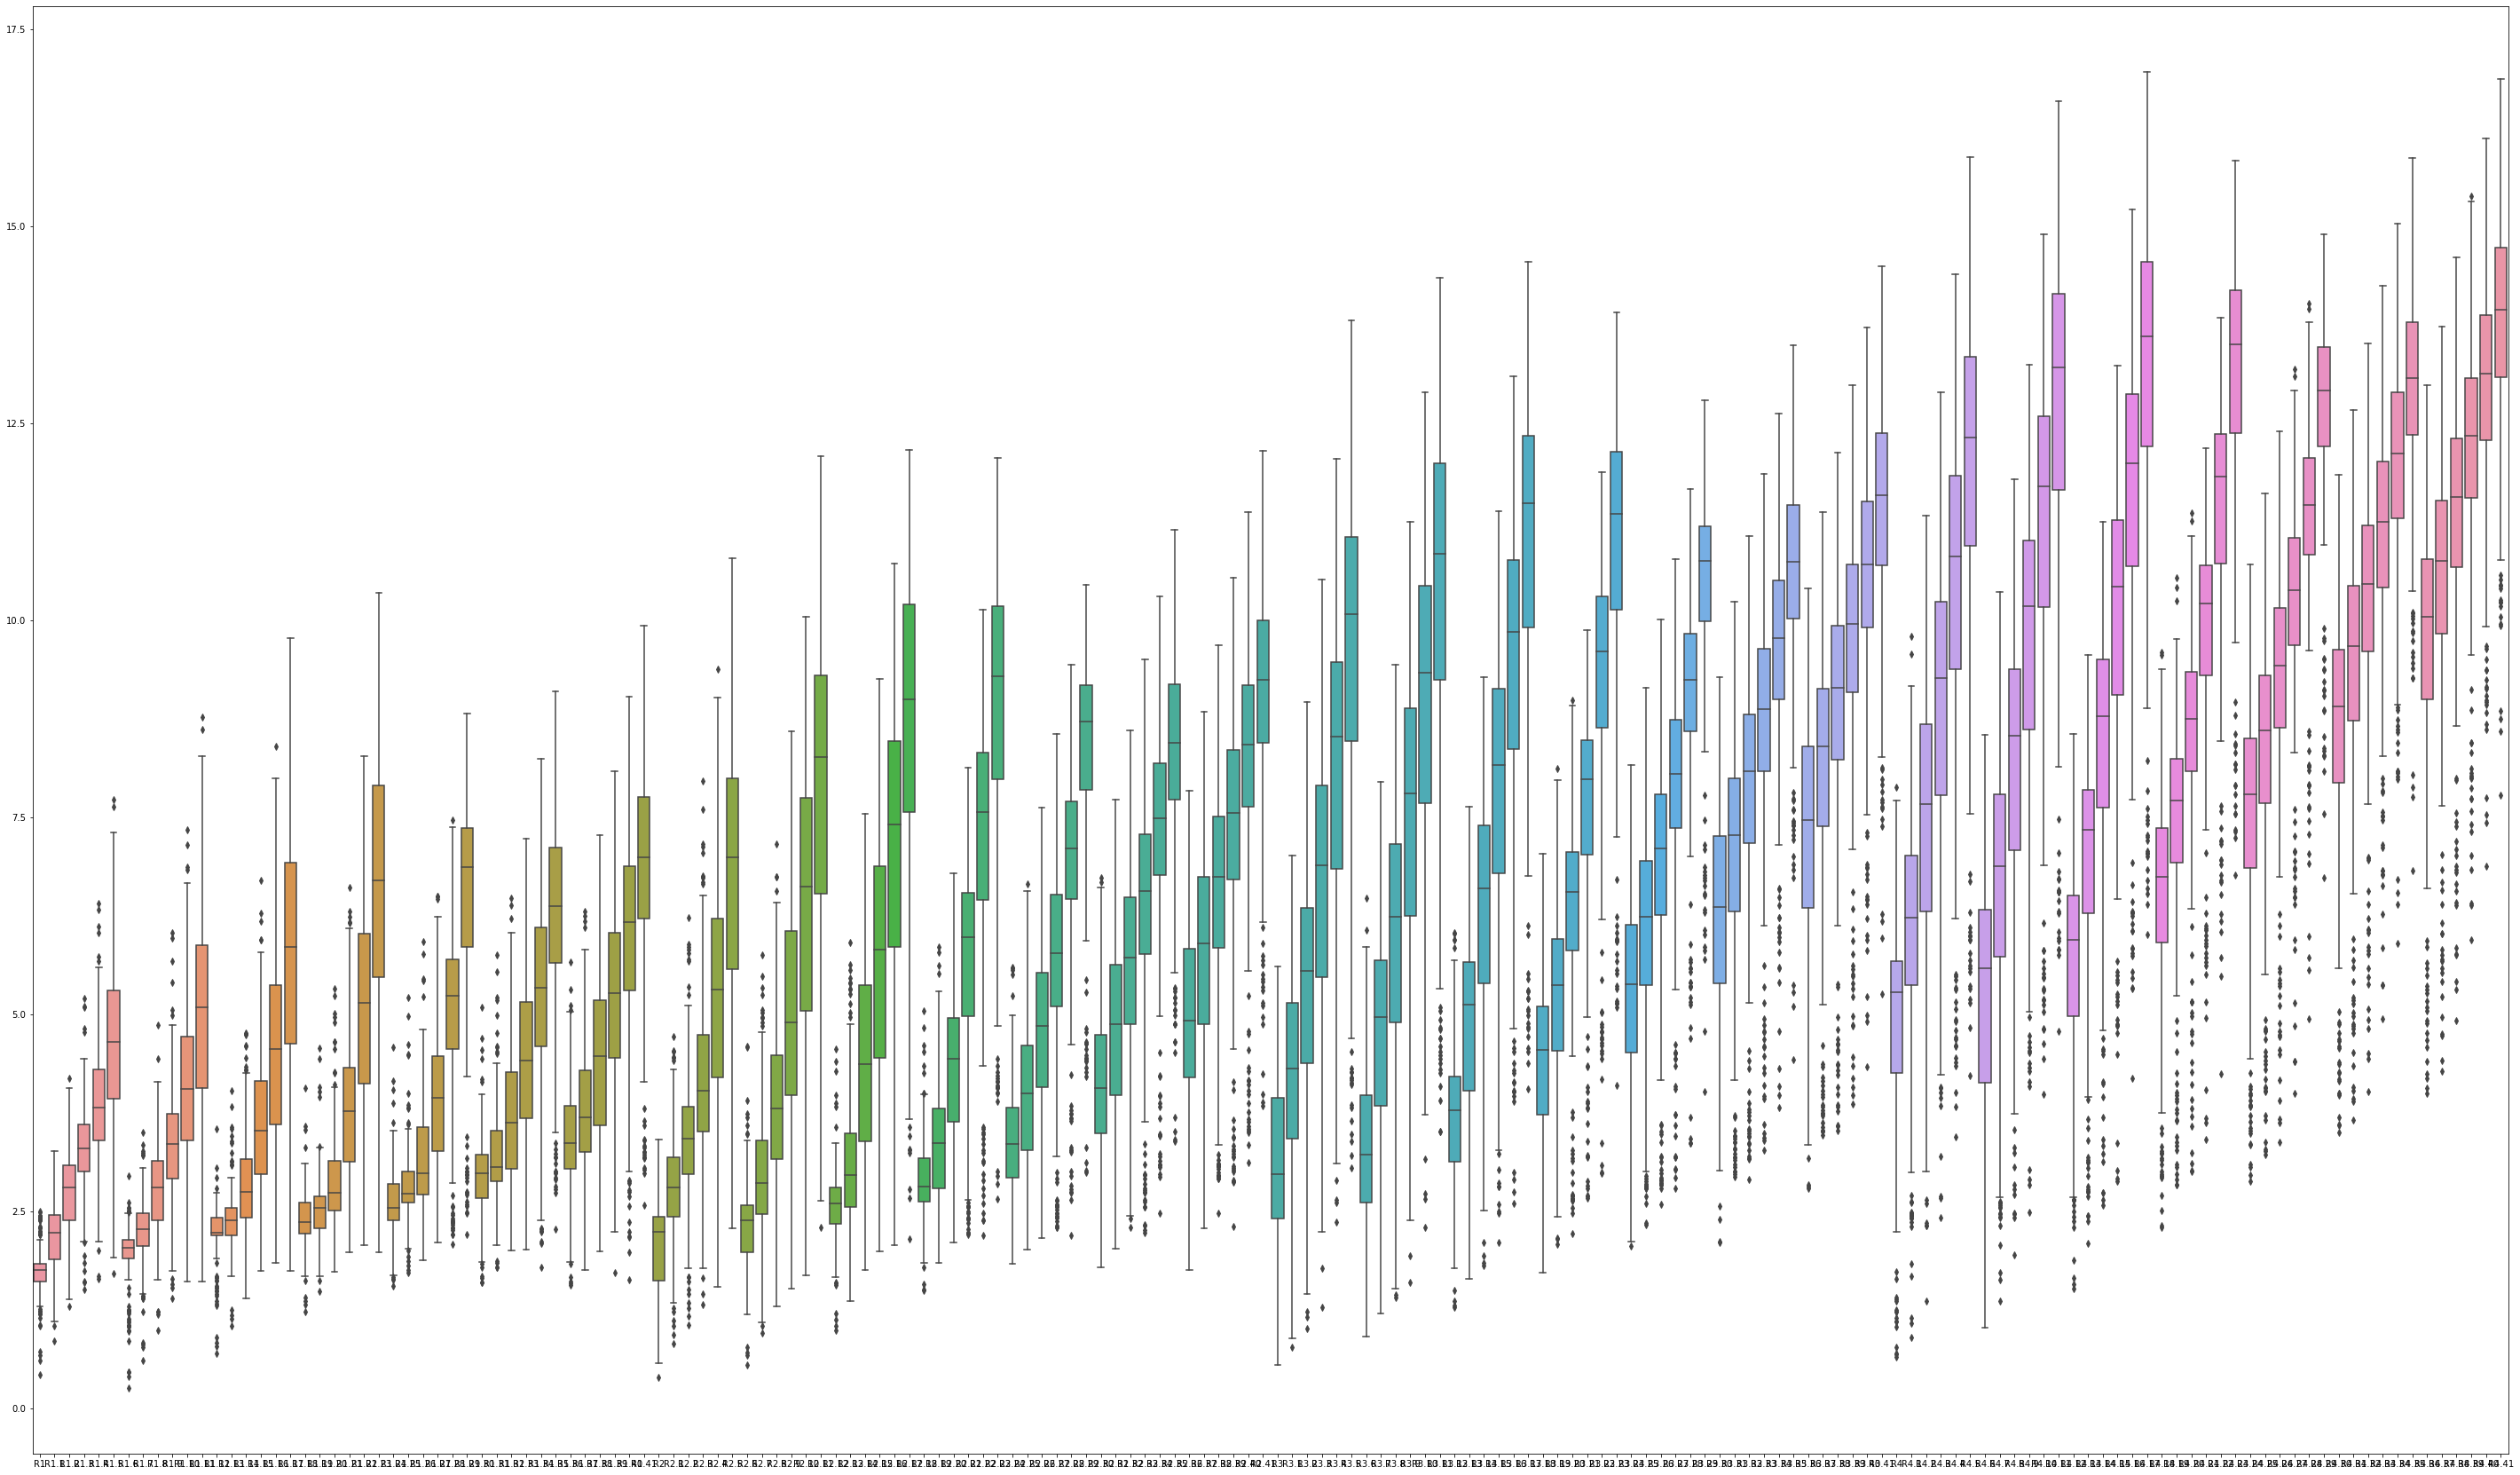

In [120]:
plt.figure(figsize=(50, 30))
sns.boxplot( data=df3_2.iloc[:, 4:172])
# add stripplot
# ax = sns.stripplot(data=df[df, color="orange", jitter=0.2, size=2.5)
# # add title
# plt.title("Boxplot with jitter", loc="left")

##### Annotated features:

In [121]:
# split the data into inputs and outputs
R = df3_2.iloc[:, 4:172].values
P = df3_2.iloc[:, 172:340].values
DOD = df3_2.iloc[:, 340:508].values

In [122]:
R1 = df3_2.iloc[:, 4:46].values
R2 = df3_2.iloc[:, 46:88].values
R3 = df3_2.iloc[:, 88:130].values
R4 = df3_2.iloc[:, 130:172].values

In [123]:
R

array([[ 1.61,  1.83,  2.51, ..., 12.11, 12.84, 13.62],
       [ 2.4 ,  2.96,  3.42, ..., 13.81, 14.59, 15.43],
       [ 2.13,  2.58,  3.4 , ..., 13.11, 13.91, 14.77],
       ...,
       [ 1.43,  1.79,  2.04, ...,  8.12,  9.37, 10.77],
       [ 1.32,  1.64,  1.86, ...,  8.32,  9.37, 10.44],
       [ 1.57,  1.8 ,  2.06, ..., 10.16, 11.13, 12.28]])

In [124]:
P

array([[ 1.61,  1.83,  2.51, ..., 12.11, 12.84, 13.62],
       [ 2.4 ,  2.96,  3.42, ..., 13.81, 14.59, 15.43],
       [ 2.13,  2.58,  3.4 , ..., 13.11, 13.91, 14.77],
       ...,
       [ 1.43,  1.79,  2.04, ...,  8.12,  9.37, 10.77],
       [ 1.32,  1.64,  1.86, ...,  8.32,  9.37, 10.44],
       [ 1.57,  1.8 ,  2.06, ..., 10.16, 11.13, 12.28]])

In [125]:
DOD

array([[ 1.61,  1.94,  2.31, ..., 12.05, 12.63, 13.62],
       [ 2.4 ,  2.3 ,  2.41, ..., 14.25, 14.48, 15.43],
       [ 2.13,  2.35,  2.59, ..., 13.51, 13.8 , 14.77],
       ...,
       [ 1.43,  1.25,  1.62, ...,  9.38, 10.37, 10.77],
       [ 1.32,  1.24,  1.66, ...,  9.52, 10.4 , 10.44],
       [ 1.57,  1.75,  2.11, ..., 11.65, 11.89, 12.28]])

In [126]:
df3_2['avg_R1'] = df3_2.iloc[:, 4:46].values.mean(axis=1)
df3_2['avg_R2'] = df3_2.iloc[:, 46:88].values.mean(axis=1)
df3_2['avg_R3'] = df3_2.iloc[:, 88:130].values.mean(axis=1)
df3_2['avg_R4'] = df3_2.iloc[:, 130:172].values.mean(axis=1)

In [127]:
df3_2['avg_P2'] = df3_2.iloc[:, 172:196].values.mean(axis=1)
df3_2['avg_P4'] = df3_2.iloc[:, 196:220].values.mean(axis=1)
df3_2['avg_P6'] = df3_2.iloc[:, 220:244].values.mean(axis=1)
df3_2['avg_P8'] = df3_2.iloc[:, 244:268].values.mean(axis=1)
df3_2['avg_P10'] = df3_2.iloc[:, 268:292].values.mean(axis=1)
df3_2['avg_P12'] = df3_2.iloc[:, 292:316].values.mean(axis=1)
df3_2['avg_P14'] = df3_2.iloc[:, 316:340].values.mean(axis=1)

In [128]:
df3_2['avg_DOD3.5'] = df3_2.iloc[:, 340:368].values.mean(axis=1)
df3_2['avg_DOD4'] = df3_2.iloc[:, 368:396].values.mean(axis=1)
df3_2['avg_DOD4.5'] = df3_2.iloc[:, 396:424].values.mean(axis=1)
df3_2['avg_DOD5'] = df3_2.iloc[:, 424:452].values.mean(axis=1)
df3_2['avg_DOD5.5'] = df3_2.iloc[:, 452:480].values.mean(axis=1)
df3_2['avg_DOD6'] = df3_2.iloc[:, 480:508].values.mean(axis=1)


In [129]:
df3_2.head()

,Length,OD,ID,WT,R1,R1.1,R1.2,R1.3,R1.4,R1.5,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,16.02,4.00,3.24,0.86,1.61,1.83,2.51,3.07,3.46,4.25,...,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,13.44,3.46,2.66,0.82,2.40,2.96,3.42,3.82,4.75,5.98,...,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
2,14.63,3.86,2.61,0.83,2.13,2.58,3.40,3.89,4.41,5.64,...,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
3,16.08,4.02,3.38,0.92,1.59,1.79,2.47,2.88,3.31,3.90,...,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
4,16.03,4.70,3.50,1.00,1.65,1.98,2.39,3.06,3.42,3.95,...,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


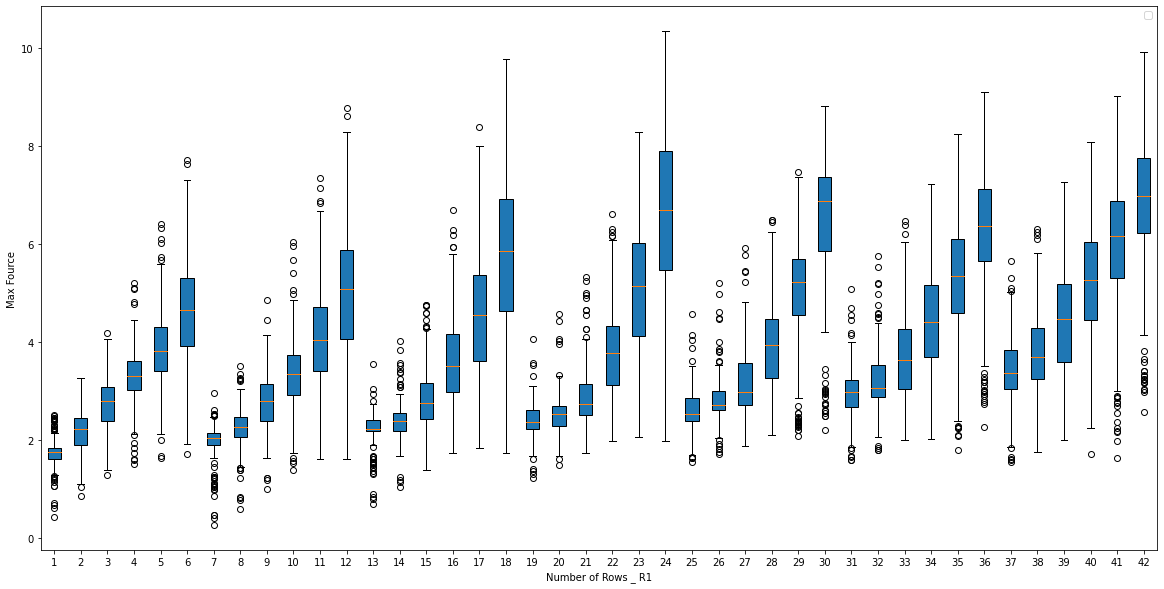

In [130]:
plt.figure(figsize=(20, 10))

plt.boxplot(R1,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows _ R1')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


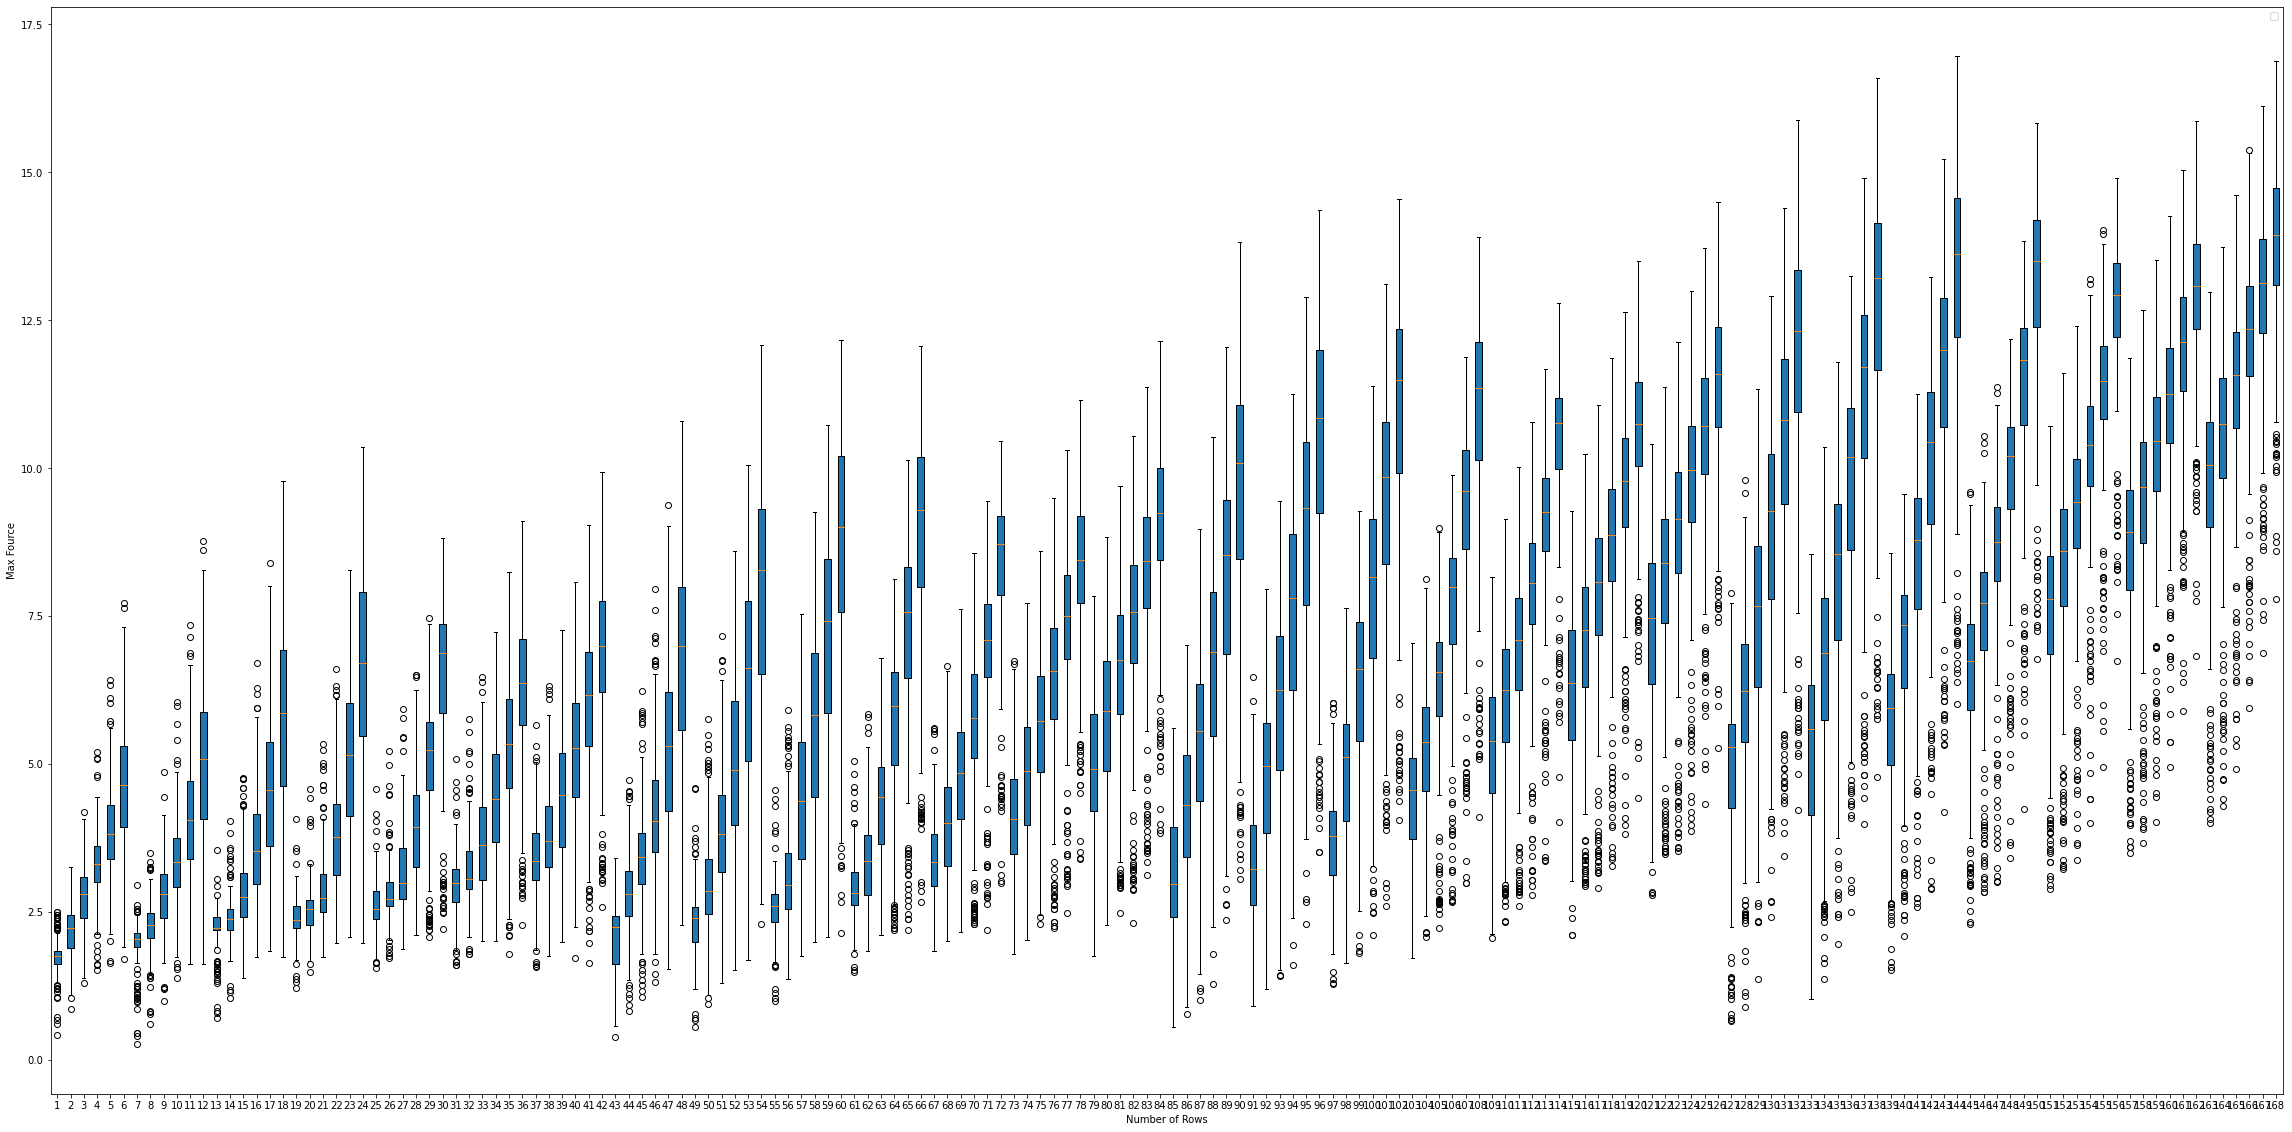

In [131]:
plt.figure(figsize=(40, 20))

plt.boxplot(R,vert=True,patch_artist=True);   
plt.xlabel('Number of Rows')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


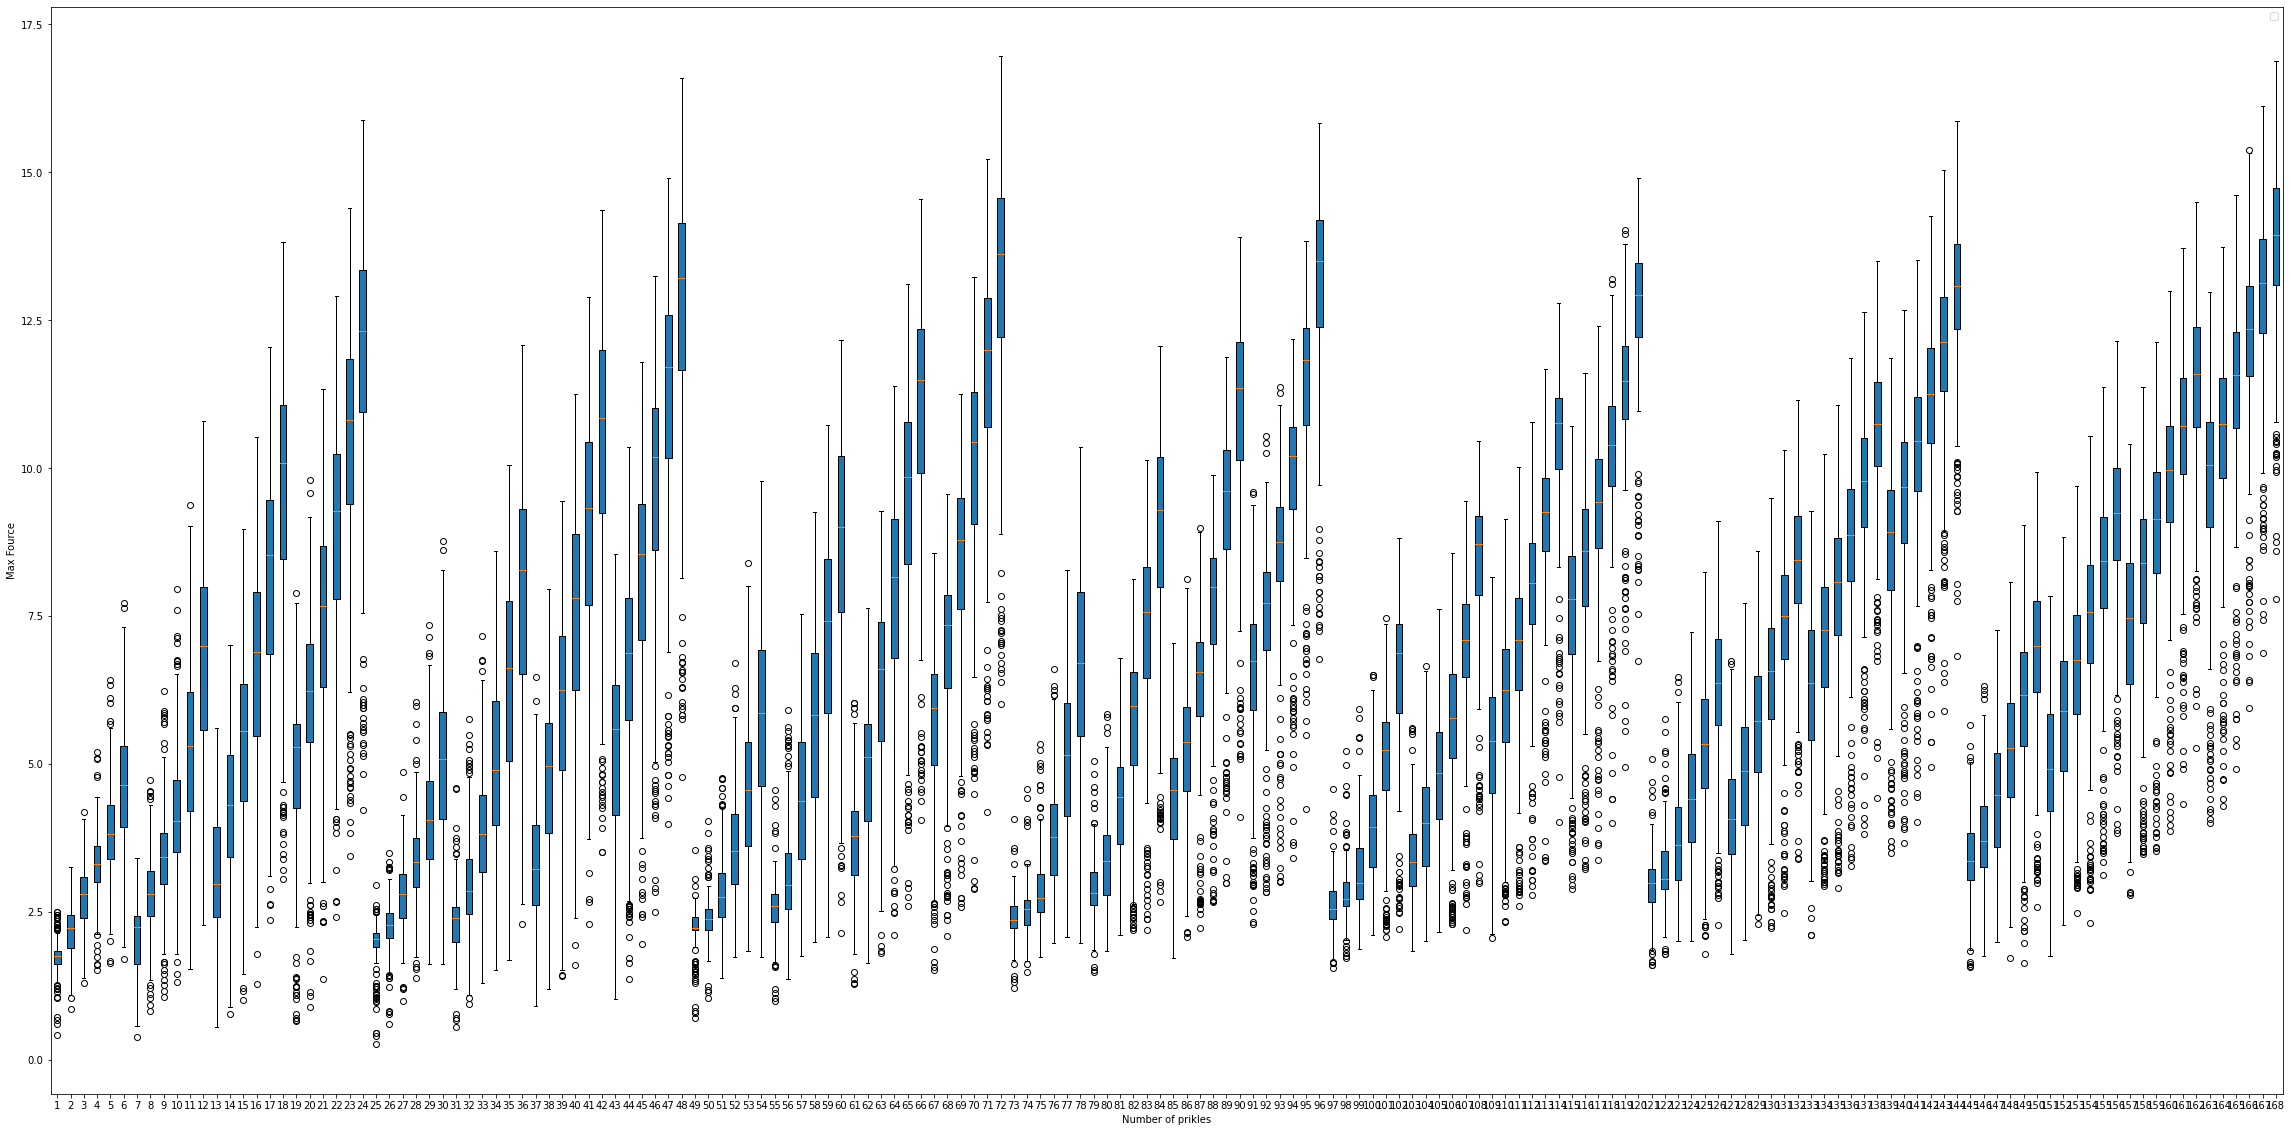

In [132]:
plt.figure(figsize=(40, 20))

plt.boxplot(P,vert=True,patch_artist=True);   
plt.xlabel('Number of prikles')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


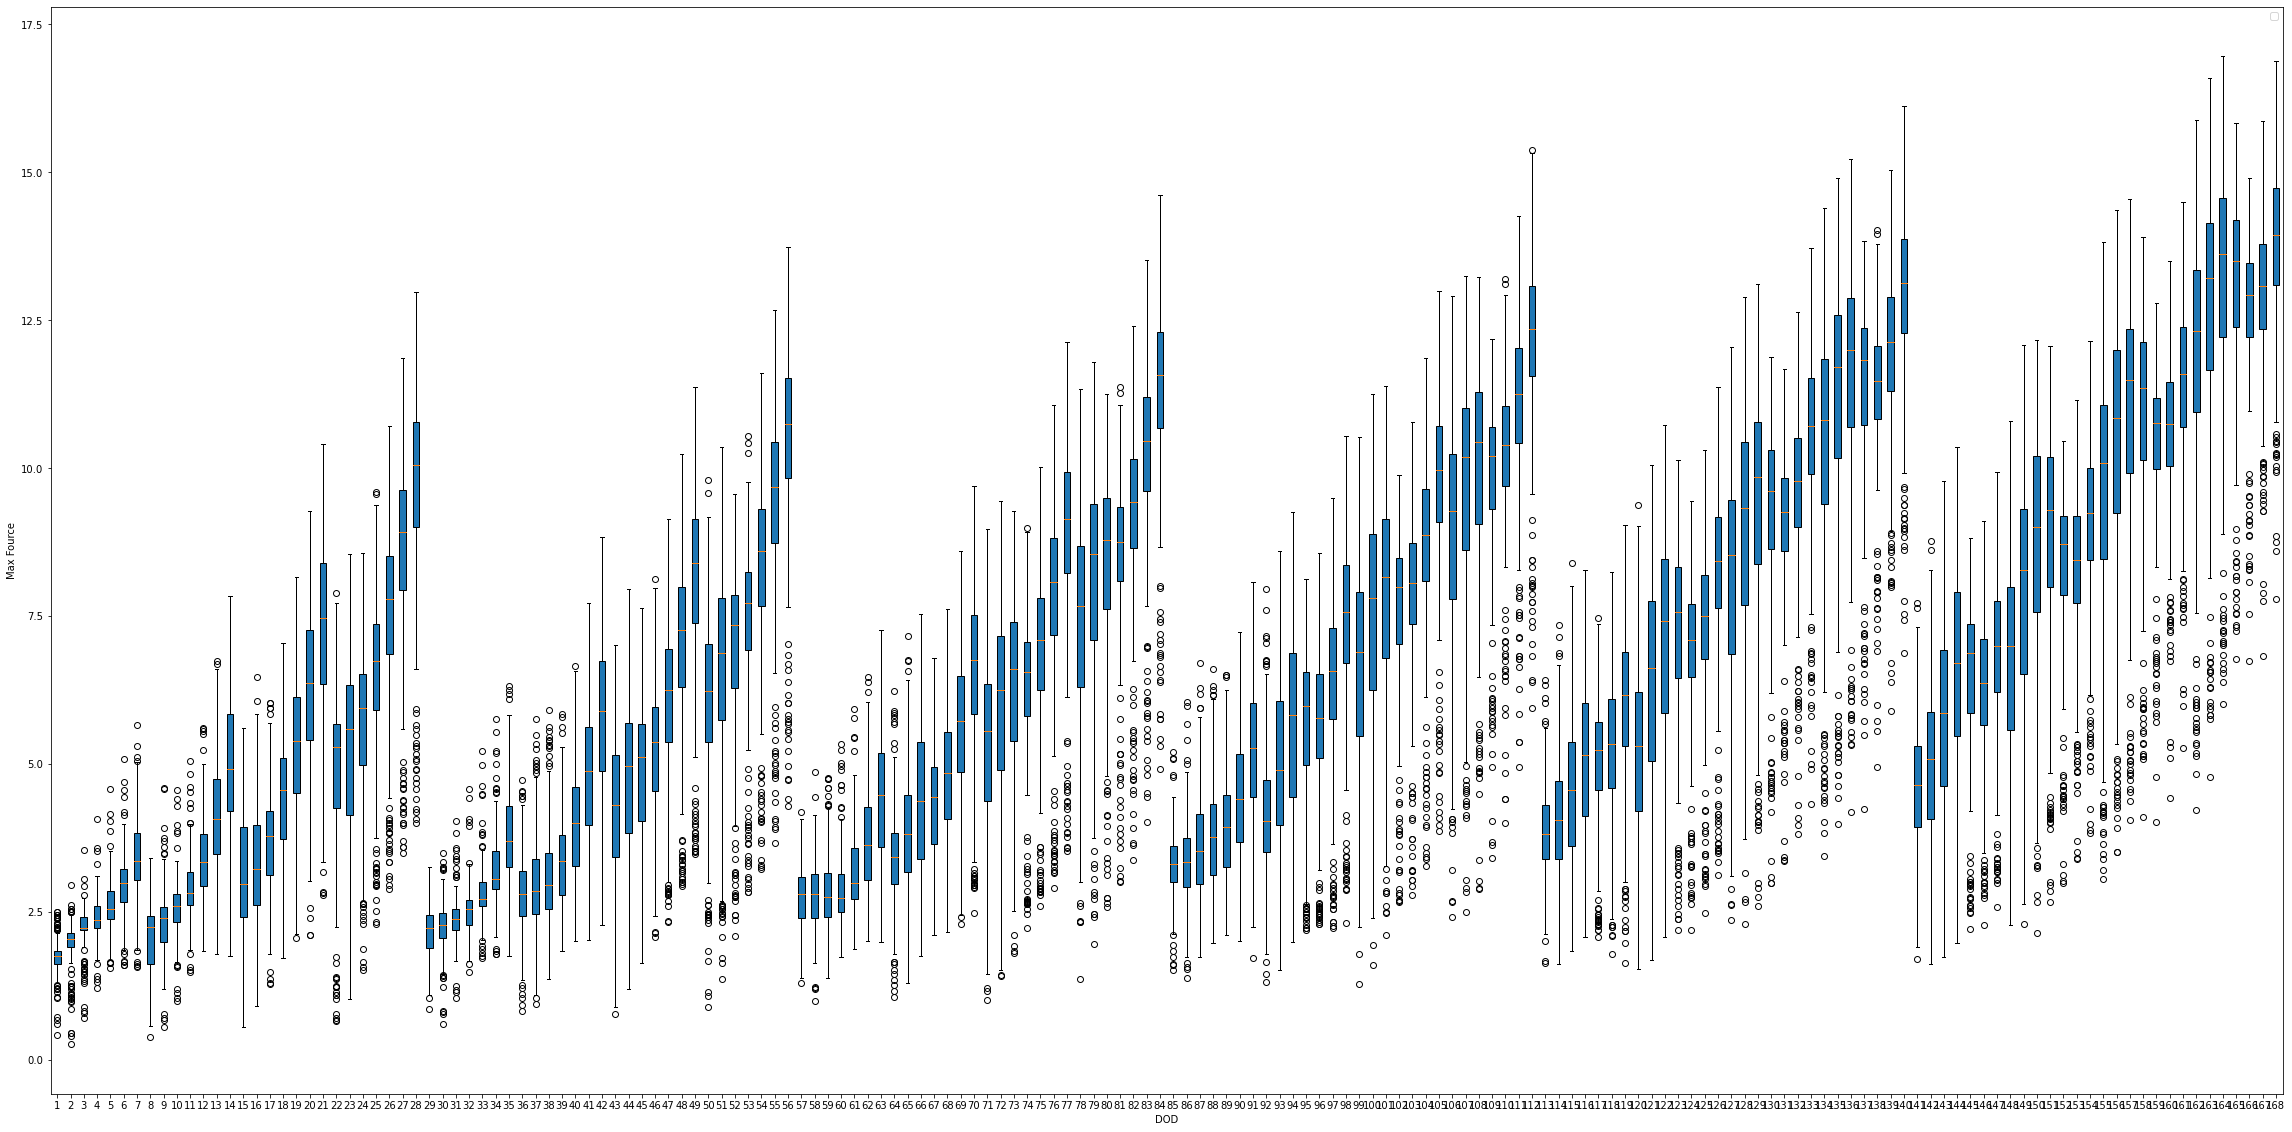

In [133]:
plt.figure(figsize=(40, 20))

plt.boxplot(DOD,vert=True,patch_artist=True);   
plt.xlabel('DOD')
plt.ylabel('Max Fource')
plt.legend()
plt.show()

In [134]:
df3_2_avg = df3_2.drop(df3_2.iloc[:, 4:508], axis=1)
df3_2_avg.head()

,Length,OD,ID,WT,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,...,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,16.02,4.00,3.24,0.86,2,3.533810,5.080476,7.355238,9.668095,5.069583,...,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,13.44,3.46,2.66,0.82,0,5.037619,7.247143,9.504048,11.788810,7.198333,...,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
2,14.63,3.86,2.61,0.83,0,4.629048,6.626667,8.842619,11.071429,6.699583,...,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
3,16.08,4.02,3.38,0.92,2,3.335476,4.830238,7.065000,9.383333,4.794167,...,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
4,16.03,4.70,3.50,1.00,2,3.196667,4.462619,6.352619,8.593333,4.487500,...,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857


In [135]:
df3_2_just_avg = df3_2.drop(df3_2.iloc[:, 3:508], axis=1)
df3_2_just_avg = df3_2_just_avg.drop(df3_2.iloc[:, 0:1], axis=1)

df3_2_just_avg.head()

,OD,ID,cluster,avg_R1,avg_R2,avg_R3,avg_R4,avg_P2,avg_P4,avg_P6,avg_P8,avg_P10,avg_P12,avg_P14,avg_DOD3.5,avg_DOD4,avg_DOD4.5,avg_DOD5,avg_DOD5.5,avg_DOD6
0,4.00,3.24,2,3.533810,5.080476,7.355238,9.668095,5.069583,5.748333,6.247917,6.185000,6.360833,7.148333,8.105833,4.095357,4.799643,5.685714,6.735357,7.921071,9.219286
1,3.46,2.66,0,5.037619,7.247143,9.504048,11.788810,7.198333,7.926250,8.426250,8.302917,8.158333,8.863333,9.885417,5.677857,6.589643,7.617500,8.830000,10.133929,11.517500
2,3.86,2.61,0,4.629048,6.626667,8.842619,11.071429,6.699583,7.412500,7.843750,7.661667,7.540000,8.203333,9.186250,5.115000,5.965357,6.994643,8.206429,9.532500,10.940714
3,4.02,3.38,2,3.335476,4.830238,7.065000,9.383333,4.794167,5.431667,5.980000,6.047917,6.133750,6.870417,7.816667,3.973929,4.610714,5.437500,6.439286,7.592500,8.867143
4,4.70,3.50,2,3.196667,4.462619,6.352619,8.593333,4.487500,4.844167,5.272500,5.752917,6.016250,6.205000,6.980833,3.517500,4.208214,4.990714,5.905000,7.003571,8.282857


In [136]:
df3_2_just_avg.iloc[:, 3:7].values

array([[ 3.53380952,  5.08047619,  7.3552381 ,  9.66809524],
       [ 5.03761905,  7.24714286,  9.50404762, 11.78880952],
       [ 4.62904762,  6.62666667,  8.84261905, 11.07142857],
       [ 3.33547619,  4.8302381 ,  7.065     ,  9.38333333],
       [ 3.19666667,  4.46261905,  6.35261905,  8.59333333],
       [ 4.74571429,  6.87333333,  9.18357143, 11.45714286],
       [ 3.77857143,  5.34071429,  7.5447619 ,  9.9252381 ],
       [ 5.54095238,  7.10809524,  9.32238095, 11.54642857],
       [ 4.3197619 ,  6.20571429,  8.55833333, 10.91928571],
       [ 3.29047619,  4.77952381,  6.87214286,  8.9947619 ],
       [ 4.23404762,  6.05071429,  8.18309524, 10.43761905],
       [ 3.32190476,  4.72142857,  6.7397619 ,  8.985     ],
       [ 3.95261905,  5.6997619 ,  7.83142857, 10.14261905],
       [ 3.73214286,  5.37595238,  7.47285714,  9.68547619],
       [ 2.98380952,  3.92071429,  5.46238095,  7.36285714],
       [ 3.64119048,  4.87928571,  6.85619048,  9.20357143],
       [ 3.7147619 ,  5.

In [137]:
df3_2_just_avg.iloc[:, 7:14].values

array([[5.06958333, 5.74833333, 6.24791667, ..., 6.36083333, 7.14833333,
        8.10583333],
       [7.19833333, 7.92625   , 8.42625   , ..., 8.15833333, 8.86333333,
        9.88541667],
       [6.69958333, 7.4125    , 7.84375   , ..., 7.54      , 8.20333333,
        9.18625   ],
       ...,
       [2.80708333, 2.99416667, 3.33666667, ..., 4.09541667, 4.56916667,
        5.03916667],
       [2.67083333, 2.895     , 3.26916667, ..., 4.06666667, 4.57458333,
        5.02      ],
       [3.43125   , 3.7775    , 4.27291667, ..., 5.31541667, 5.73125   ,
        6.29375   ]])

In [138]:
df3_2_just_avg.iloc[:, 14:20].values

array([[ 4.09535714,  4.79964286,  5.68571429,  6.73535714,  7.92107143,
         9.21928571],
       [ 5.67785714,  6.58964286,  7.6175    ,  8.83      , 10.13392857,
        11.5175    ],
       [ 5.115     ,  5.96535714,  6.99464286,  8.20642857,  9.5325    ,
        10.94071429],
       ...,
       [ 2.48428571,  2.84571429,  3.32892857,  3.875     ,  4.60714286,
         5.5975    ],
       [ 2.41321429,  2.79071429,  3.30607143,  3.86642857,  4.56035714,
         5.46607143],
       [ 3.02107143,  3.54285714,  4.17357143,  4.96964286,  5.97035714,
         7.10178571]])

In [139]:
df3_2_just_avg["avg_R"] = df3_2_just_avg.iloc[:, 3:7].values.mean(axis=1)
df3_2_just_avg["avg_P"] = df3_2_just_avg.iloc[:, 7:14].values.mean(axis=1)
df3_2_just_avg["avg_DOD"] = df3_2_just_avg.iloc[:, 14:20].values.mean(axis=1)

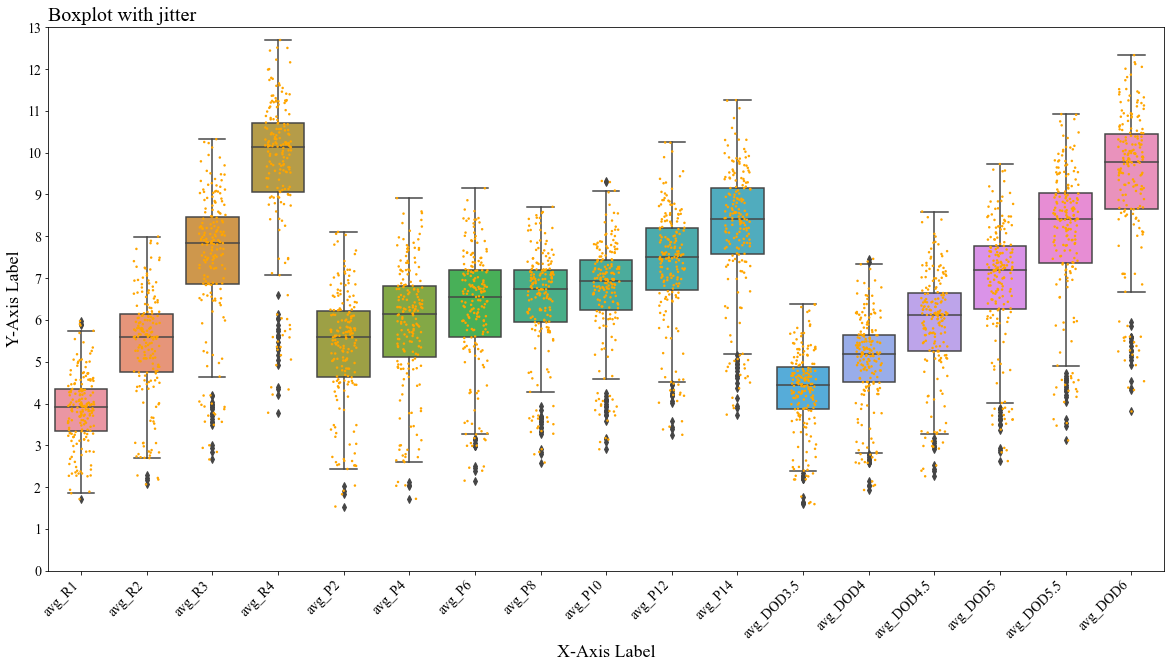

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set font properties
font_path = fm.findfont(fm.FontProperties(family='Times New Roman'))
font_properties = fm.FontProperties(fname=font_path, size=16)

plt.figure(figsize=(20, 10))

# Create a boxplot
sns.boxplot(data=df3_2_just_avg.iloc[:, 3:20])

# Add stripplot
ax = sns.stripplot(data=df3_2_just_avg.iloc[:, 3:20], color="orange", jitter=0.2, size=2.5)

# Set y-axis limits
ax.set_ylim(0, 13)

# Set y-axis ticks and labels
ax.set_yticks(range(14))
ax.set_yticklabels(range(14), fontproperties=font_properties, size=14)

# Set title with Times New Roman font and larger size
plt.title("Boxplot with jitter", loc="left", fontproperties=font_properties, size=20)

# Set x and y-axis labels with Times New Roman font and larger size
plt.xlabel("X-Axis Label", fontproperties=font_properties, size=18)
plt.ylabel("Y-Axis Label", fontproperties=font_properties, size=18)

# Set tick labels on x-axis with 45-degree rotation
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_properties, size=14, rotation=45, ha='right')

# Show the plot
plt.show()
